In [23]:
# Cài đặt thư viện Prophet
!pip install prophet


In [39]:

import pandas as pd
from google.colab import drive
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Kết nối Google Drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Đường dẫn tới file trên Google Drive
train_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_train.csv'
test_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_test.csv'
# Đọc dữ liệu
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [43]:
class StockModelEvaluation:
    def __init__(self):
        self.results = []

    def fit_and_predict(self, model, train_df, test_df, ticker):
        # Huấn luyện mô hình với dữ liệu train
        model.fit(train_df)
        # Dự đoán với tập test
        future = test_df[['ds']]
        forecast = model.predict(future)

        # Điều chỉnh giá trị dự đoán
        last_train_value = train_df['y'].iloc[-1]
        first_forecast_value = forecast['yhat'].iloc[0]
        adjustment = last_train_value - first_forecast_value
        forecast['yhat_adjusted'] = forecast['yhat'] + adjustment
        forecast['yhat_upper_adjusted'] = forecast['yhat_upper'] + adjustment
        forecast['yhat_lower_adjusted'] = forecast['yhat_lower'] + adjustment

        # Tính toán MAE và RMSE
        y_true = test_df['y'].values
        y_pred = forecast['yhat_adjusted'].values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}')

        # Lưu kết quả
        self.results.append({
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': model.seasonality_mode
        })
        # Trả về dự báo đã điều chỉnh và thang đo đánh giá
        return forecast, mae, rmse

    def fit_and_predict_holt_winters(self, train_df, test_df, ticker, seasonal='add', seasonal_periods=12):
        # Huấn luyện mô hình Holt-Winters
        model = ExponentialSmoothing(train_df['y'], seasonal=seasonal, seasonal_periods=seasonal_periods).fit()

        # Dự đoán với tập test
        forecast = model.forecast(len(test_df)).rename('Holt_Winters_Forecast')

        # Tính toán MAE và RMSE
        y_true = test_df['y'].values
        y_pred = forecast.values
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}')

        # Lưu kết quả
        self.results.append({
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': seasonal
        })
        # Trả về dự báo và thang đo đánh giá
        return forecast, mae, rmse
    def plot_forecast(self, train_df, forecast, test_df, ticker):
        # Lấy chế độ mùa vụ từ kết quả lưu trữ
        seasonality_mode = forecast['seasonality_mode'].iloc[0] if 'seasonality_mode' in forecast else 'Unknown'

        # Vẽ biểu đồ
        plt.figure(figsize=(10, 6))
        plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
        plt.plot(forecast['ds'], forecast['yhat_adjusted'], label='Prediction', color='orange')
        plt.fill_between(forecast['ds'], forecast['yhat_lower_adjusted'], forecast['yhat_upper_adjusted'], color='orange', alpha=0.2)
        plt.plot(test_df['ds'], test_df['y'], label='Test', color='green')
        plt.title(f'Ticker: {ticker} - Seasonality: {seasonality_mode}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()


    def plot_forecast_holt_winters(self, train_df, forecast, test_df, ticker, seasonality_mode):
        # Vẽ biểu đồ
        plt.figure(figsize=(10, 6))
        plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
        plt.plot(test_df['ds'], test_df['y'], label='Test', color='green')
        plt.plot(test_df['ds'], forecast, label='Prediction', color='orange')
        plt.title(f'Ticker: {ticker} - Holt-Winters Seasonality: {seasonality_mode}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

    def get_results(self):
        # Tạo DataFrame chứa kết quả
        results_df = pd.DataFrame(self.results)
        return results_df

In [44]:
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])
# Tạo đối tượng StockModelEvaluation
evaluator_additive = StockModelEvaluation()#  Prophet
evaluator_multiplicative = StockModelEvaluation()# Prophet
evaluator_holt_winters = StockModelEvaluation()# Holt-Winters

# Lấy danh sách các mã chứng khoán
tickers = train_df['ticker'].unique()

# FB Prophet

Additive Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/9wmjsd42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/afo3myj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99364', 'data', 'file=/tmp/tmp04_0b7s9/9wmjsd42.json', 'init=/tmp/tmp04_0b7s9/afo3myj3.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelbz97qxoa/prophet_model-20240801132206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSI


13:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 1531.8451256589003, RMSE: 1783.6224035813204


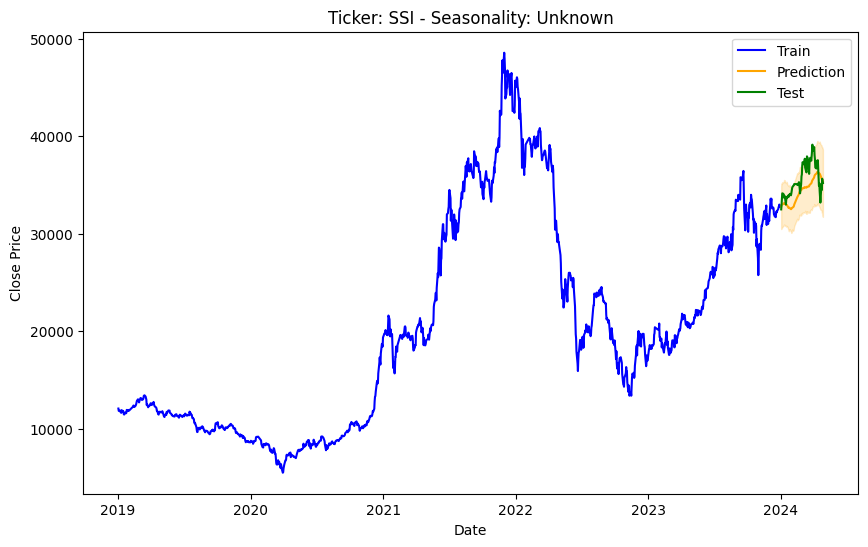

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/5xzf7n0x.json


Processing ticker (Additive): BCM


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/uww8zl3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99843', 'data', 'file=/tmp/tmp04_0b7s9/5xzf7n0x.json', 'init=/tmp/tmp04_0b7s9/uww8zl3b.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelc1t6y0y_/prophet_model-20240801132208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3813.8174863873364, RMSE: 4323.64605177855


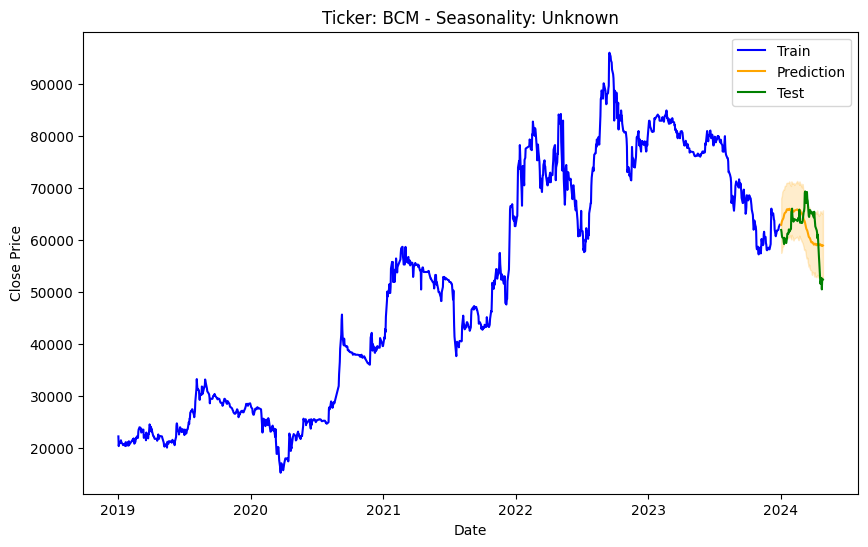

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/1im18_gj.json


Processing ticker (Additive): VHM


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/tqihi7t4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38237', 'data', 'file=/tmp/tmp04_0b7s9/1im18_gj.json', 'init=/tmp/tmp04_0b7s9/tqihi7t4.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelo82n7alg/prophet_model-20240801132209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1301.4909359537123, RMSE: 1651.3651611980774


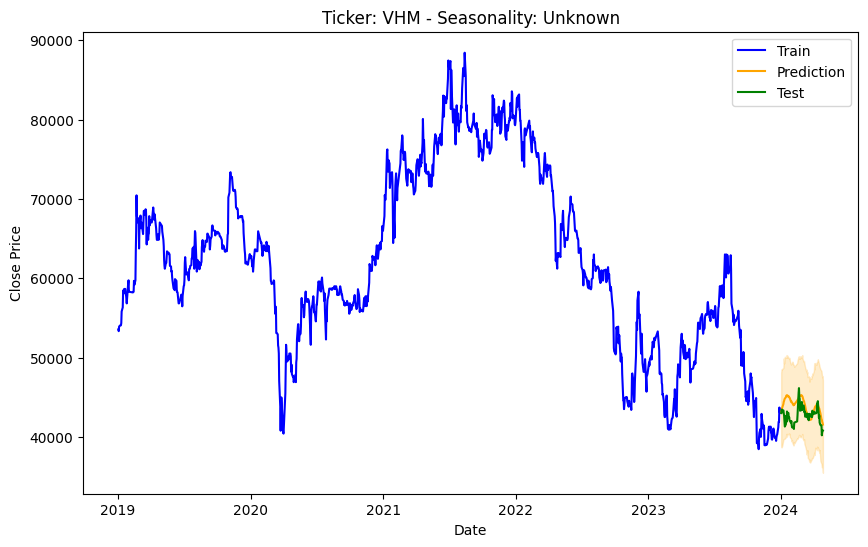

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/4x_gh5__.json


Processing ticker (Additive): VIC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/wxub9x5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80433', 'data', 'file=/tmp/tmp04_0b7s9/4x_gh5__.json', 'init=/tmp/tmp04_0b7s9/wxub9x5f.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model8mwm_8rc/prophet_model-20240801132211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 3834.416731517337, RMSE: 4917.436416740641


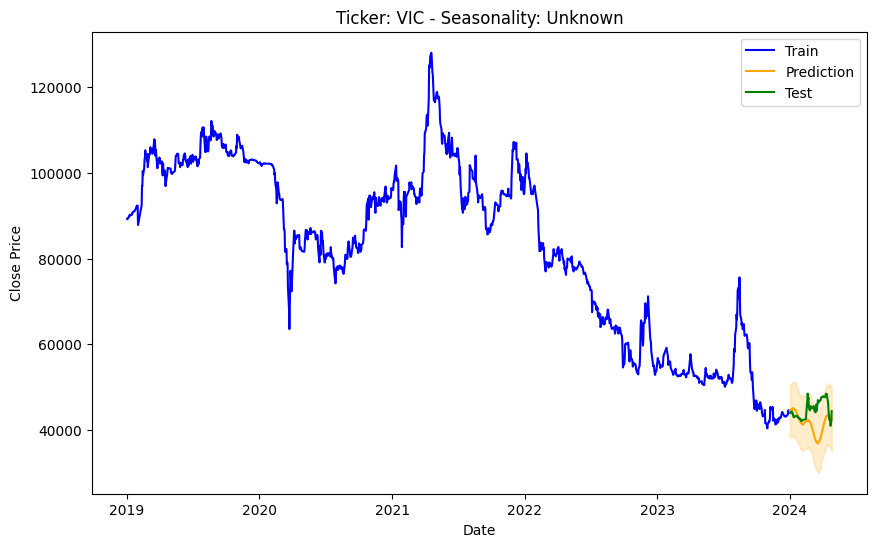

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/tvliew55.json


Processing ticker (Additive): VRE


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/pi3jiwbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52183', 'data', 'file=/tmp/tmp04_0b7s9/tvliew55.json', 'init=/tmp/tmp04_0b7s9/pi3jiwbr.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeljwsf7g93/prophet_model-20240801132213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1686.073083201903, RMSE: 1976.6741541988197


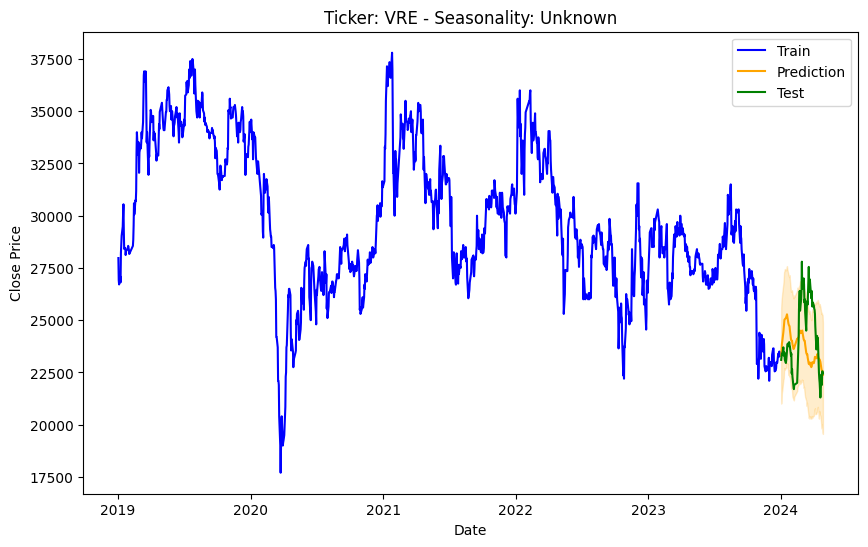

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/n2xkndmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/u1ysfl_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60788', 'data', 'file=/tmp/tmp04_0b7s9/n2xkndmo.json', 'init=/tmp/tmp04_0b7s9/u1ysfl_4.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelqpixswpr/prophet_model-20240801132214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BVH


13:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3427.8112907597506, RMSE: 3956.365840813462


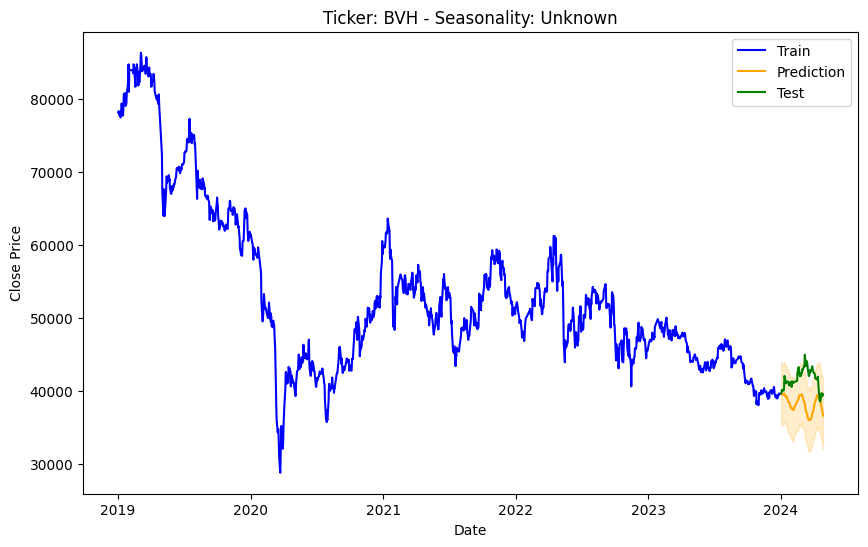

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/905a4n_p.json


Processing ticker (Additive): POW


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ztlno3xr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6457', 'data', 'file=/tmp/tmp04_0b7s9/905a4n_p.json', 'init=/tmp/tmp04_0b7s9/ztlno3xr.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model1j483_af/prophet_model-20240801132216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 189.9787596835998, RMSE: 244.23926833113342


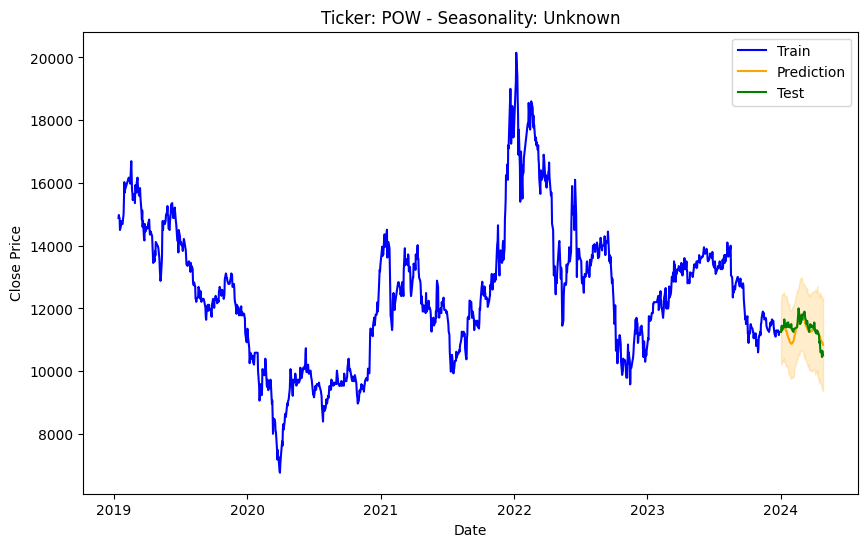

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/m2kjw81z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/kviihdz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25431', 'data', 'file=/tmp/tmp04_0b7s9/m2kjw81z.json', 'init=/tmp/tmp04_0b7s9/kviihdz3.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model8ai1vsi6/prophet_model-20240801132218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): GAS


13:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4600.381569619884, RMSE: 6024.802085883232


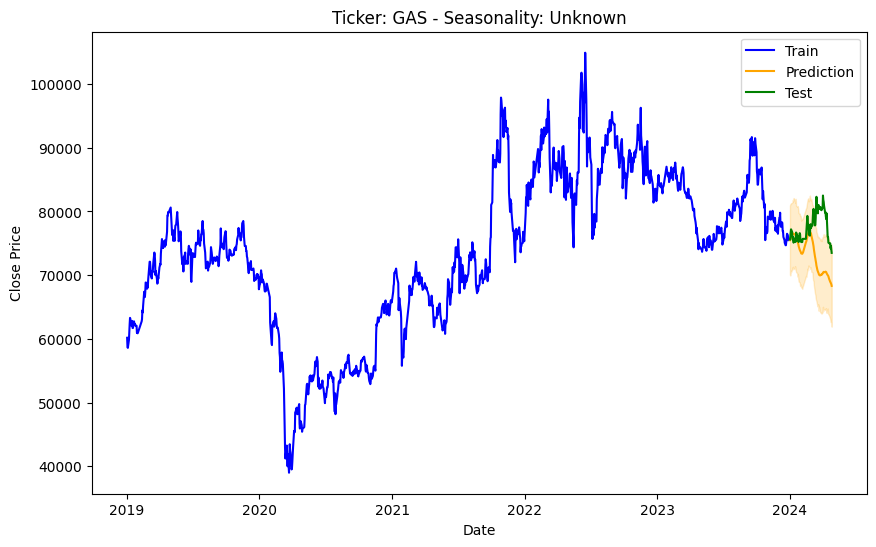

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/qe4t3pes.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/tmzx98kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12668', 'data', 'file=/tmp/tmp04_0b7s9/qe4t3pes.json', 'init=/tmp/tmp04_0b7s9/tmzx98kt.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelll_o0qdg/prophet_model-20240801132219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): ACB


13:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 2142.0701439892464, RMSE: 2259.2600953402257


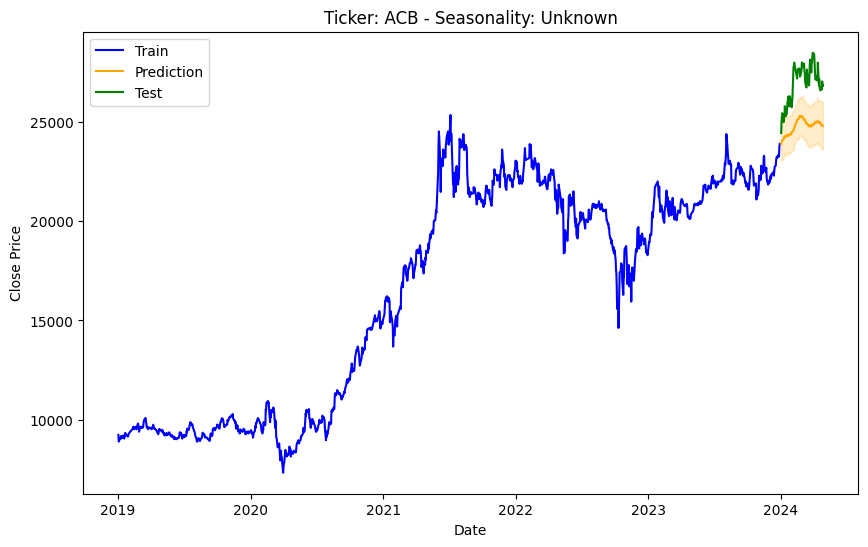

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/epsdfzs0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/kp4jbzho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26801', 'data', 'file=/tmp/tmp04_0b7s9/epsdfzs0.json', 'init=/tmp/tmp04_0b7s9/kp4jbzho.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model668f4pee/prophet_model-20240801132220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BID


13:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 4879.1262468496325, RMSE: 5675.9930394622


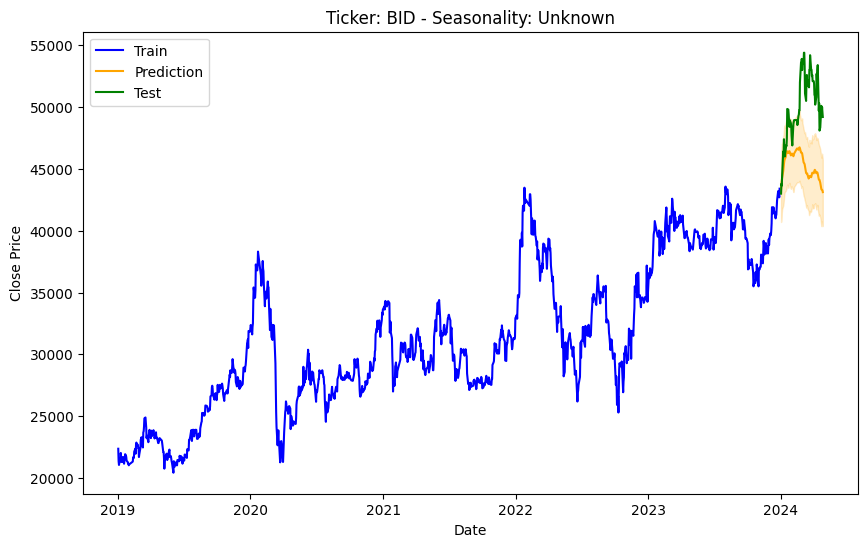

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/sjl_h3zs.json


Processing ticker (Additive): CTG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/rvzrzsc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41496', 'data', 'file=/tmp/tmp04_0b7s9/sjl_h3zs.json', 'init=/tmp/tmp04_0b7s9/rvzrzsc3.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3mbl_ezl/prophet_model-20240801132221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5226.0901202911655, RMSE: 5538.126896295592


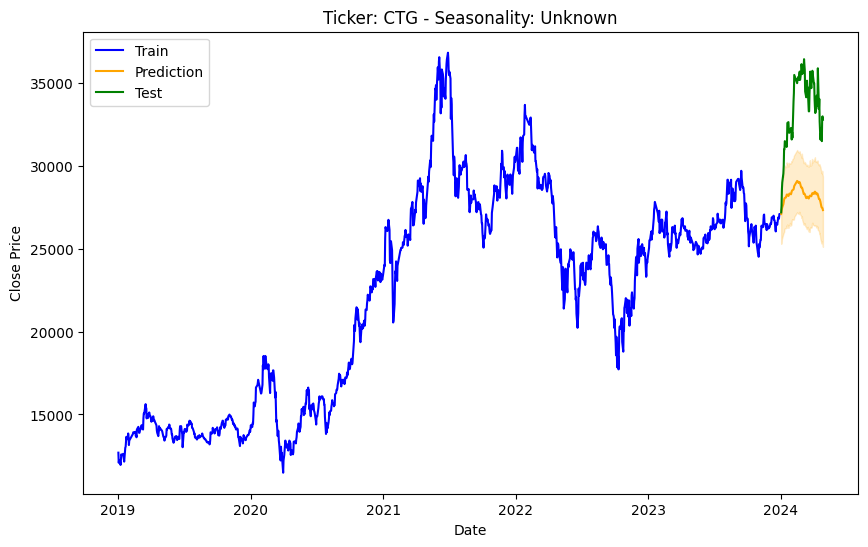

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/rgj9xmwr.json


Processing ticker (Additive): HDB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ckqfx0f5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59949', 'data', 'file=/tmp/tmp04_0b7s9/rgj9xmwr.json', 'init=/tmp/tmp04_0b7s9/ckqfx0f5.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelerkwgeop/prophet_model-20240801132222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1587.3013220330674, RMSE: 1850.210764809213


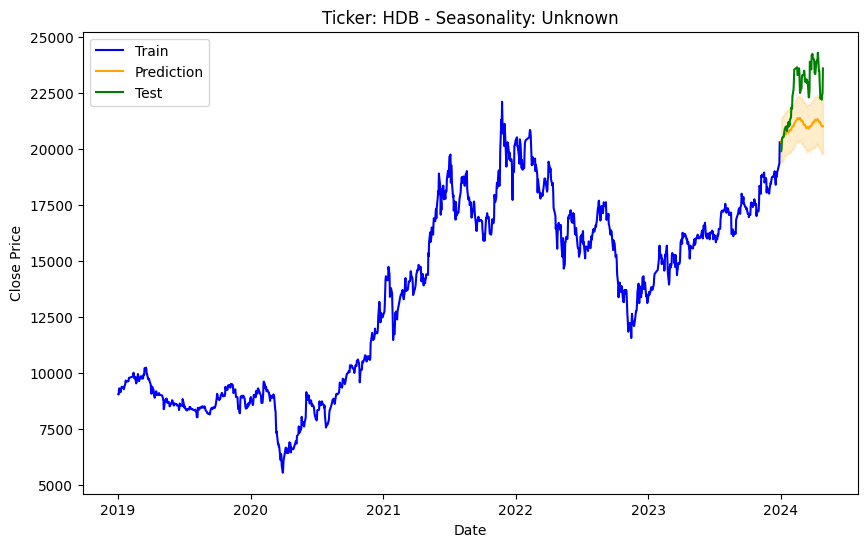

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/w2b8m7je.json


Processing ticker (Additive): MBB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/b9webe2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97487', 'data', 'file=/tmp/tmp04_0b7s9/w2b8m7je.json', 'init=/tmp/tmp04_0b7s9/b9webe2a.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelpqau2w0g/prophet_model-20240801132224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3432.7342301338854, RMSE: 3652.4142749853186


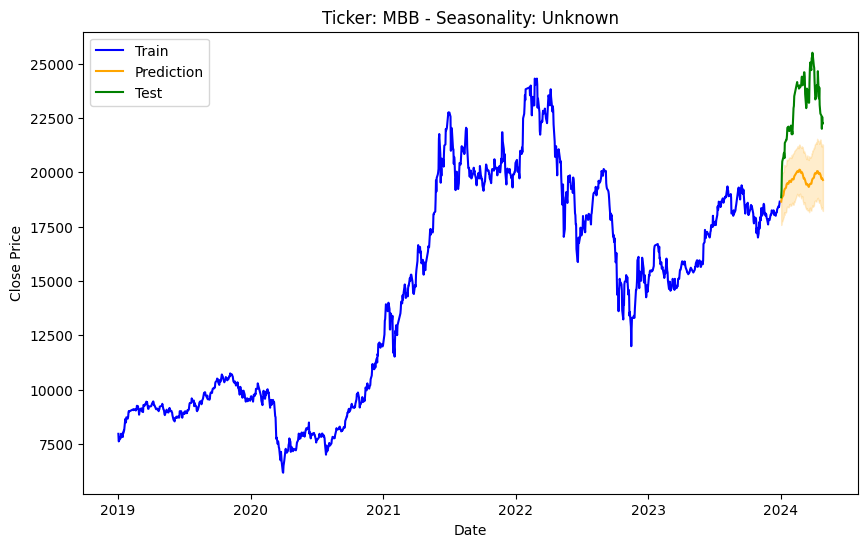

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/hkekj3so.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/od7tl60u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81607', 'data', 'file=/tmp/tmp04_0b7s9/hkekj3so.json', 'init=/tmp/tmp04_0b7s9/od7tl60u.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeld0z8g_7t/prophet_model-20240801132226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSB


13:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1081.3327052387392, RMSE: 1199.9703951839235


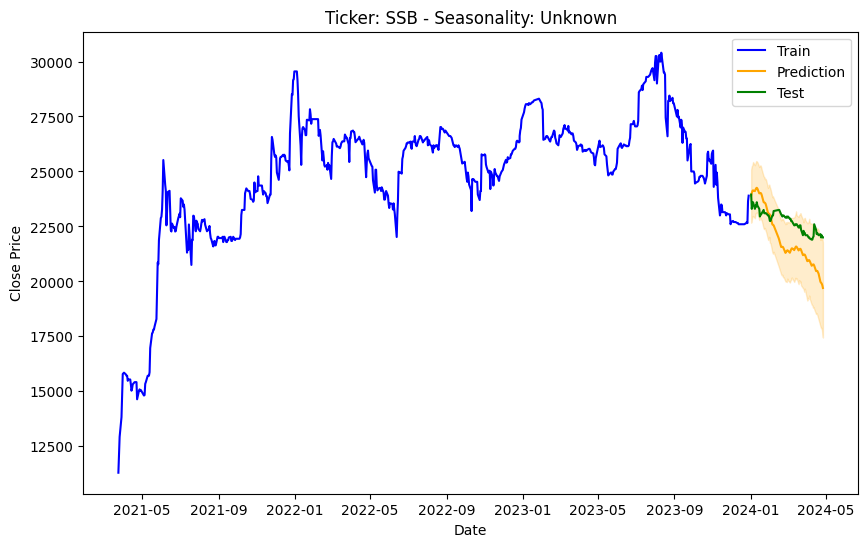

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/0yn5tujk.json


Processing ticker (Additive): SHB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/3zqbzckc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69099', 'data', 'file=/tmp/tmp04_0b7s9/0yn5tujk.json', 'init=/tmp/tmp04_0b7s9/3zqbzckc.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3e7z_il3/prophet_model-20240801132228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1062.7608380789322, RMSE: 1257.8696241916284


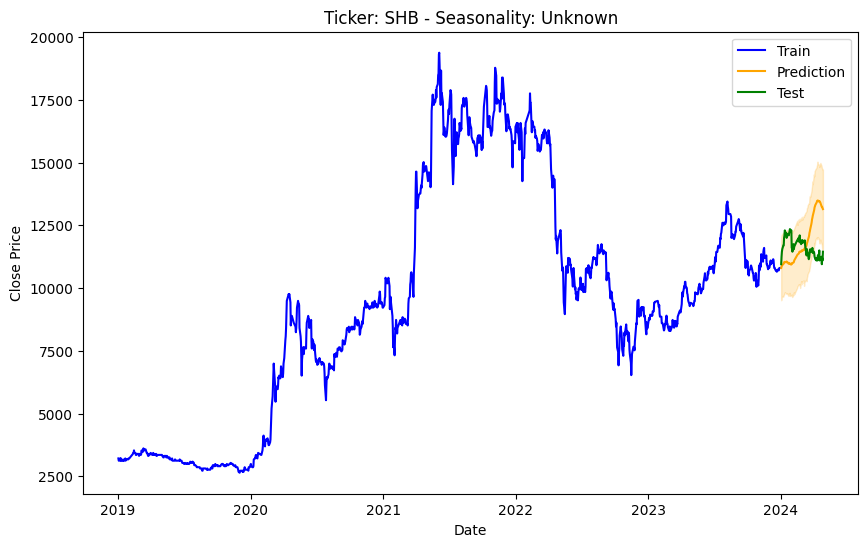

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/iqmh7s68.json


Processing ticker (Additive): STB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/rsmk2sun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6292', 'data', 'file=/tmp/tmp04_0b7s9/iqmh7s68.json', 'init=/tmp/tmp04_0b7s9/rsmk2sun.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeluj0elzhm/prophet_model-20240801132230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 938.6711728279147, RMSE: 1505.4689053839663


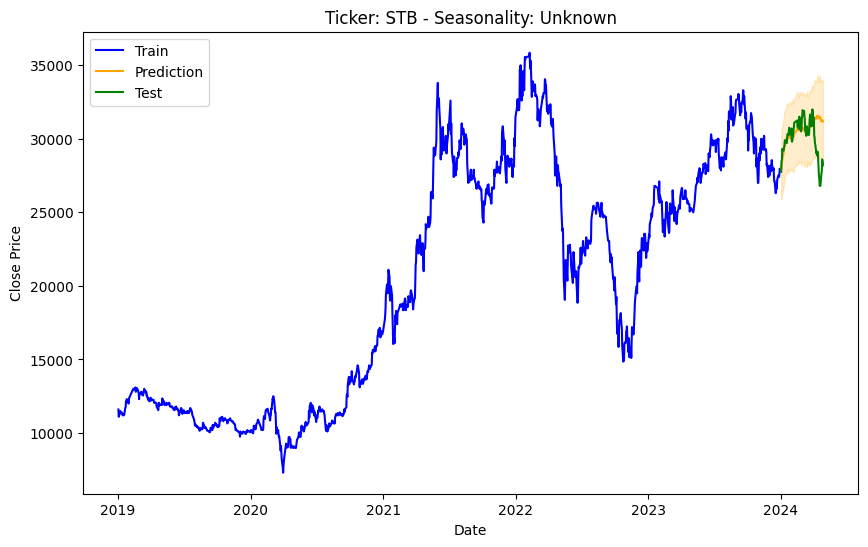

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/xfjv5zen.json


Processing ticker (Additive): TCB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/cgi9psmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53714', 'data', 'file=/tmp/tmp04_0b7s9/xfjv5zen.json', 'init=/tmp/tmp04_0b7s9/cgi9psmp.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelsdtlkvgf/prophet_model-20240801132231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 6794.143081579483, RMSE: 8229.11943660348


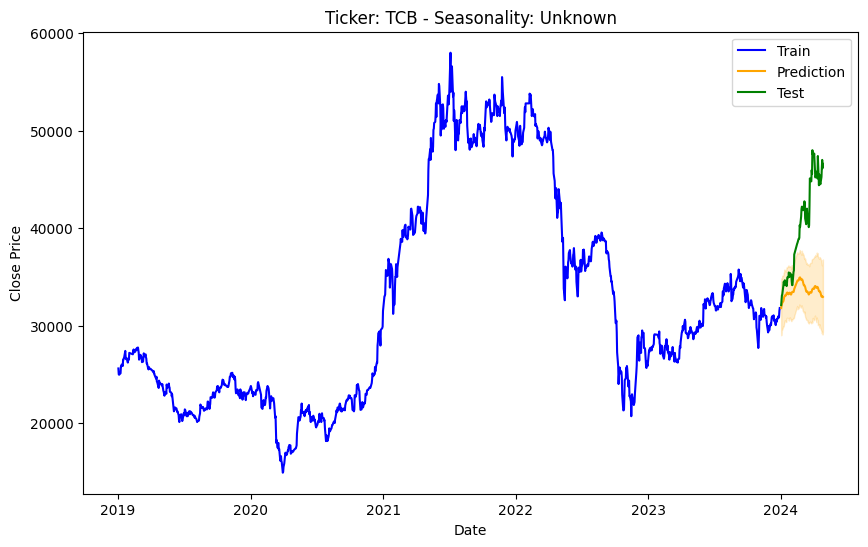

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/79ga90gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/kovp_7gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29903', 'data', 'file=/tmp/tmp04_0b7s9/79ga90gk.json', 'init=/tmp/tmp04_0b7s9/kovp_7gb.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelp5avzqw8/prophet_model-20240801132233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): TPB


13:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 629.3776424785135, RMSE: 754.8493013704747


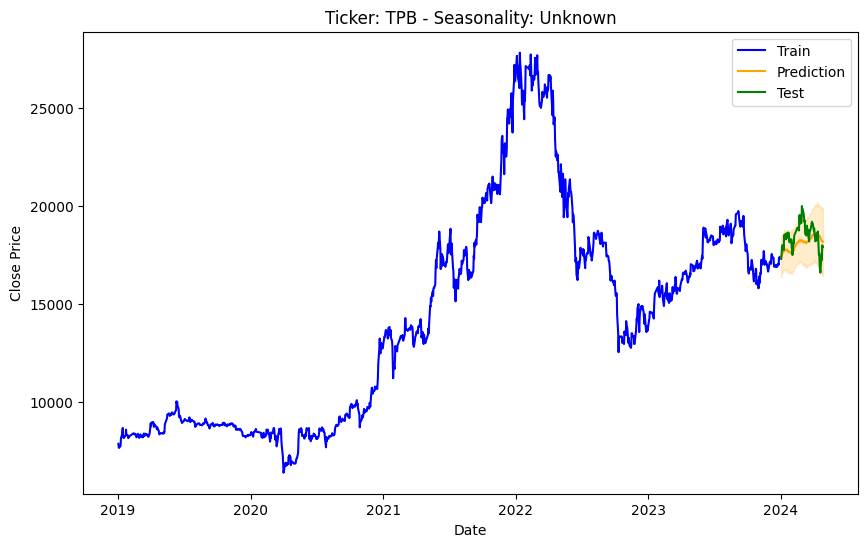

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/sn7uuva1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/y1qhw90c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10725', 'data', 'file=/tmp/tmp04_0b7s9/sn7uuva1.json', 'init=/tmp/tmp04_0b7s9/y1qhw90c.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelrgut_irt/prophet_model-20240801132234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VCB


13:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6204.437190398592, RMSE: 6837.739111960509


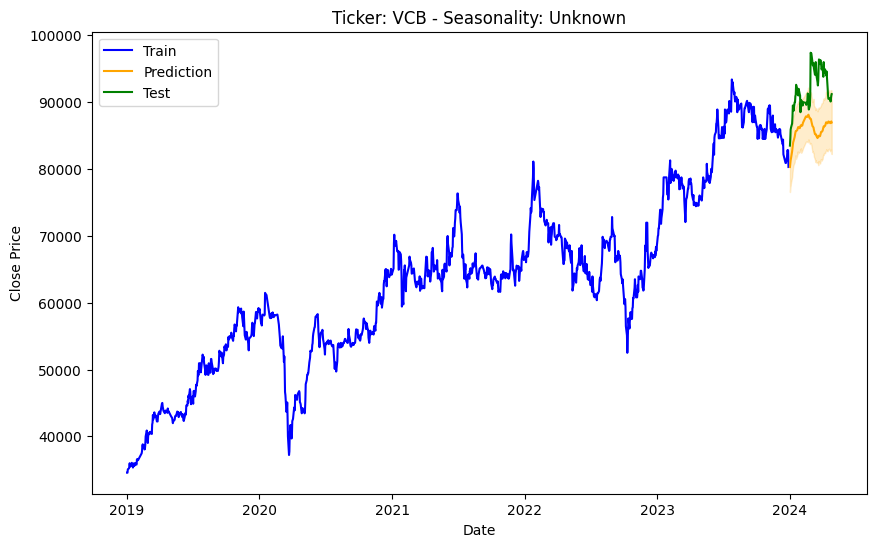

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/1vjghunk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/h9_7n6ib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71376', 'data', 'file=/tmp/tmp04_0b7s9/1vjghunk.json', 'init=/tmp/tmp04_0b7s9/h9_7n6ib.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model8_no6s1l/prophet_model-20240801132235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VIB


13:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1902.7392377423575, RMSE: 2130.187725877982


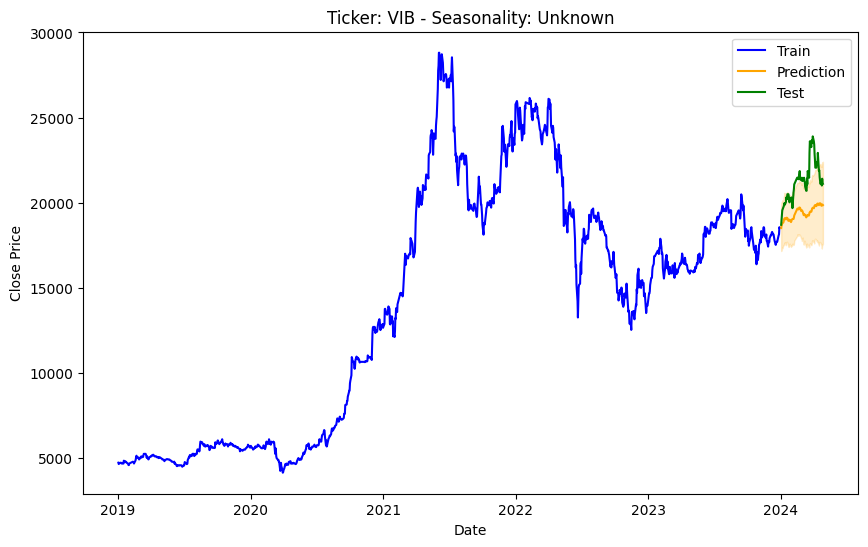

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fw2nugb3.json


Processing ticker (Additive): VPB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/t7tzy4hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84311', 'data', 'file=/tmp/tmp04_0b7s9/fw2nugb3.json', 'init=/tmp/tmp04_0b7s9/t7tzy4hl.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model7ngl3yuk/prophet_model-20240801132237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1110.3988996622174, RMSE: 1362.789644855731


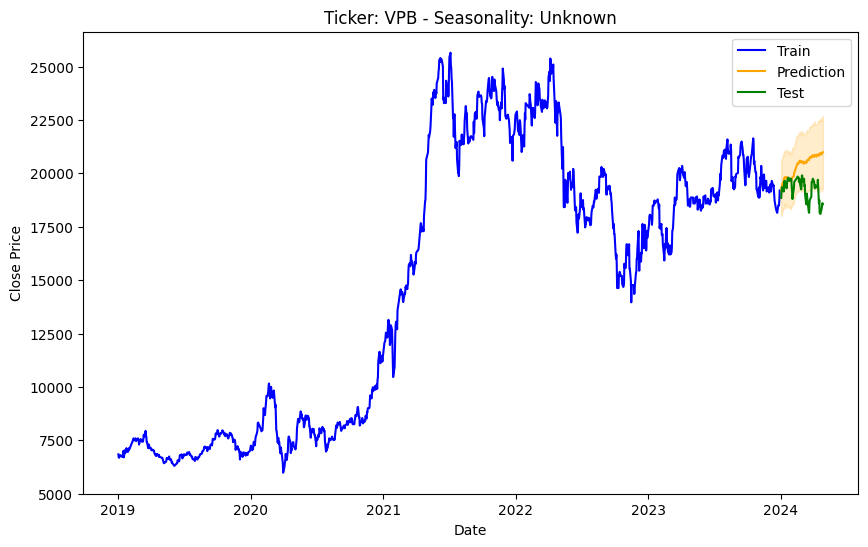

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ybm53ld9.json


Processing ticker (Additive): HPG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/w7i6r2li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67423', 'data', 'file=/tmp/tmp04_0b7s9/ybm53ld9.json', 'init=/tmp/tmp04_0b7s9/w7i6r2li.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelmetxaepz/prophet_model-20240801132239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 868.0736934331351, RMSE: 1250.622121296559


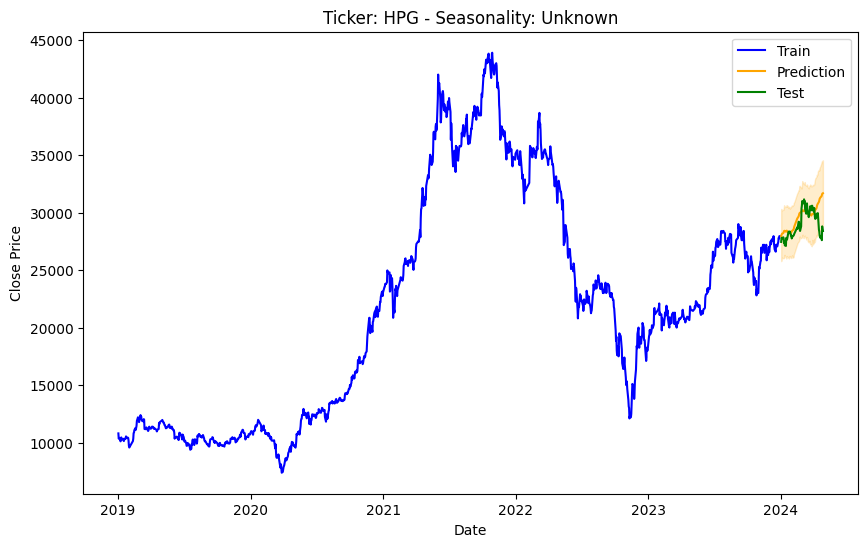

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/n595hk0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/7ug7ji4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57409', 'data', 'file=/tmp/tmp04_0b7s9/n595hk0d.json', 'init=/tmp/tmp04_0b7s9/7ug7ji4_.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model5ihqmfx6/prophet_model-20240801132240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): GVR


13:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 6383.909952612662, RMSE: 7611.927828387484


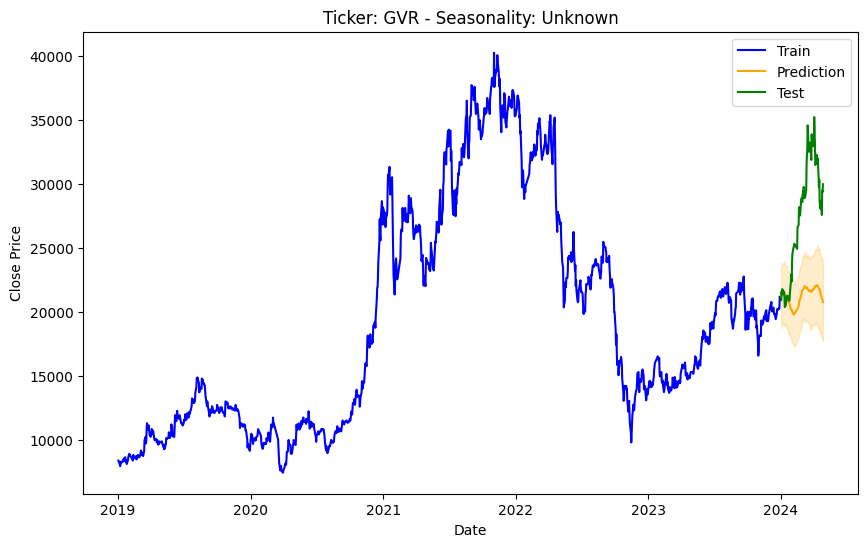

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/1gw1r2wm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/jhw6rjz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16291', 'data', 'file=/tmp/tmp04_0b7s9/1gw1r2wm.json', 'init=/tmp/tmp04_0b7s9/jhw6rjz0.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelr1yx_cl9/prophet_model-20240801132241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MSN


13:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 11264.475828240813, RMSE: 13754.373687273932


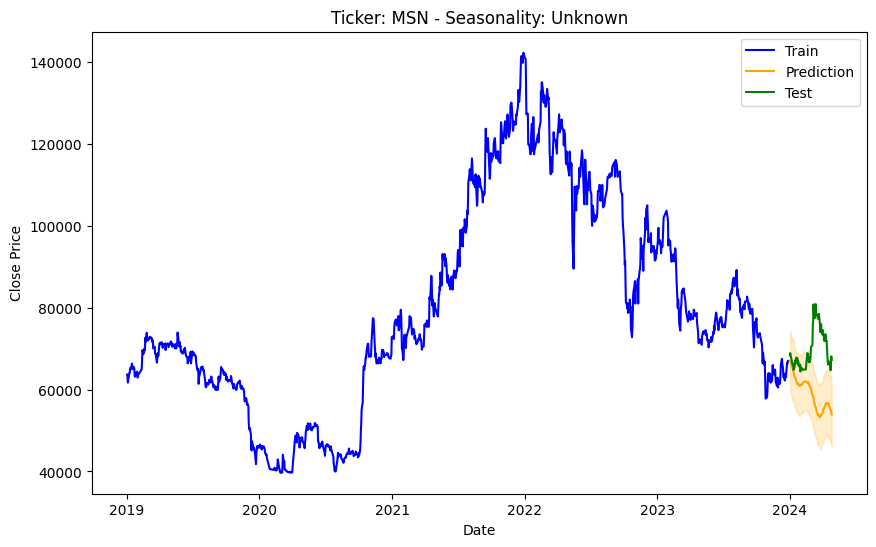

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/8txqp7e9.json


Processing ticker (Additive): VNM


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/tae_msef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14356', 'data', 'file=/tmp/tmp04_0b7s9/8txqp7e9.json', 'init=/tmp/tmp04_0b7s9/tae_msef.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelgibfzceu/prophet_model-20240801132243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 3771.542055842313, RMSE: 4458.607160223282


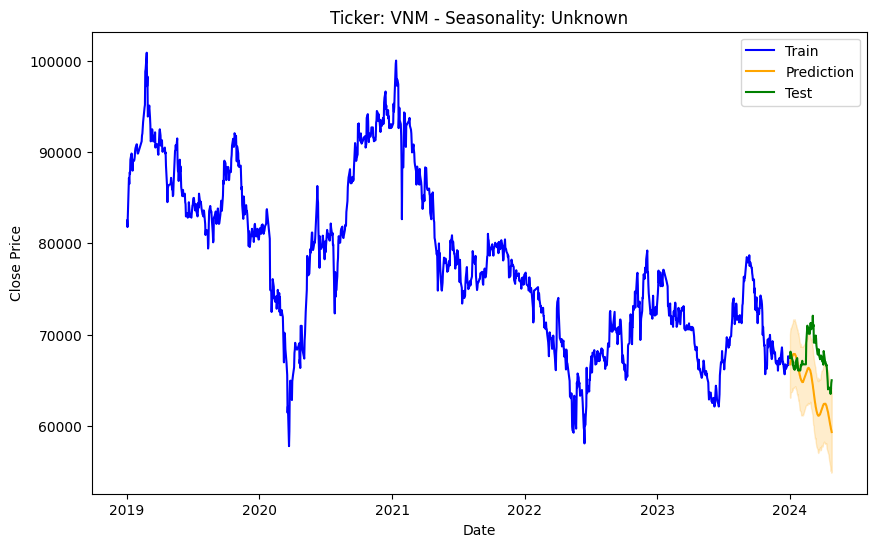

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/jhqy_yml.json


Processing ticker (Additive): SAB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fdlz4f59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88788', 'data', 'file=/tmp/tmp04_0b7s9/jhqy_yml.json', 'init=/tmp/tmp04_0b7s9/fdlz4f59.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelm2d8nwvz/prophet_model-20240801132245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2992.0134992633375, RMSE: 3888.502473617373


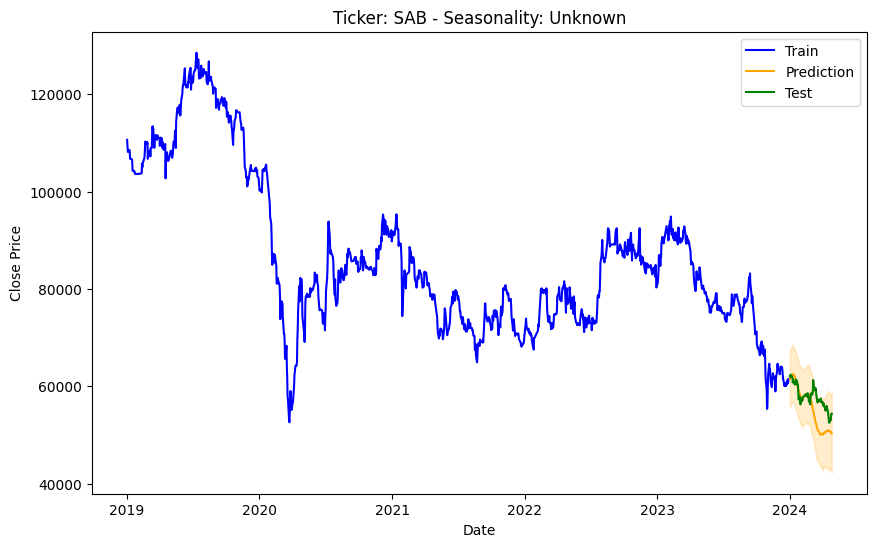

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/s6y634y8.json


Processing ticker (Additive): VJC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/zk_m954y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55215', 'data', 'file=/tmp/tmp04_0b7s9/s6y634y8.json', 'init=/tmp/tmp04_0b7s9/zk_m954y.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelcw1k5h1a/prophet_model-20240801132247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 2144.753874811967, RMSE: 2436.867418328476


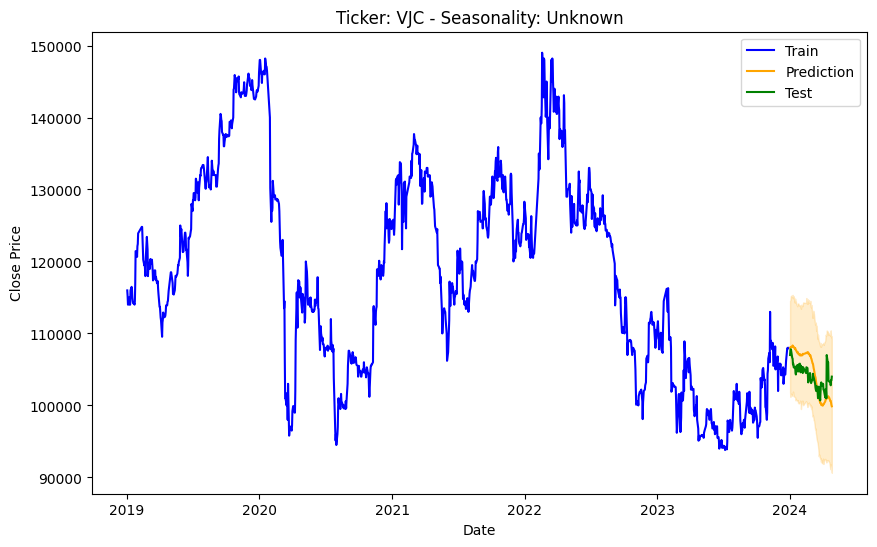

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/jxgyyajo.json


Processing ticker (Additive): MWG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/0g72dc8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67866', 'data', 'file=/tmp/tmp04_0b7s9/jxgyyajo.json', 'init=/tmp/tmp04_0b7s9/0g72dc8n.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelxj66om8y/prophet_model-20240801132249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6351.917730904011, RMSE: 7640.607328460619


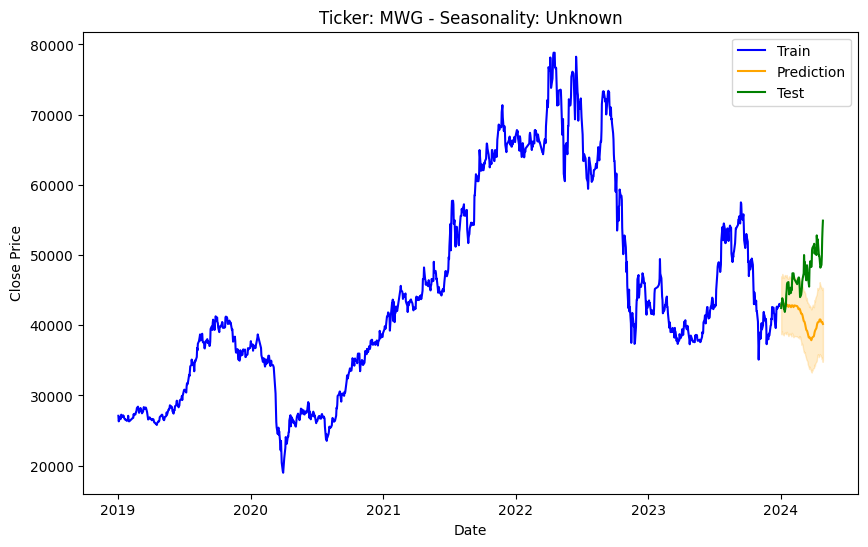

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/lmzjpymi.json


Processing ticker (Additive): PLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/moiacgeo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88173', 'data', 'file=/tmp/tmp04_0b7s9/lmzjpymi.json', 'init=/tmp/tmp04_0b7s9/moiacgeo.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model_s5vjl2h/prophet_model-20240801132253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1247.9666888026334, RMSE: 1627.7958860849105


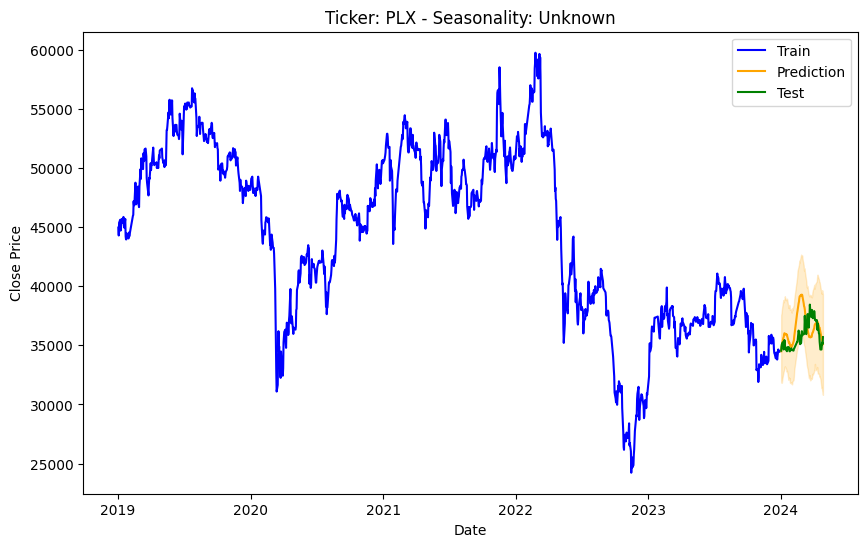

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ahsppllw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/x1fetxa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15898', 'data', 'file=/tmp/tmp04_0b7s9/ahsppllw.json', 'init=/tmp/tmp04_0b7s9/x1fetxa8.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model01csbtyt/prophet_model-20240801132255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): FPT


13:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 8359.474018499226, RMSE: 10288.790516193287


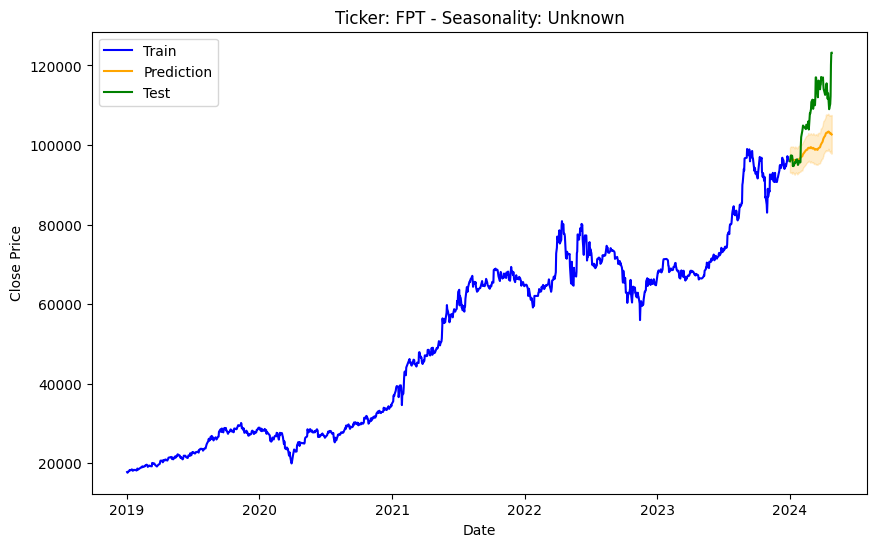

In [35]:
# Vòng lặp qua từng mã chứng khoán với additive seasonality
for ticker in tickers:
    print(f"Processing ticker (Additive): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_additive = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='additive')

    # Huấn luyện mô hình và dự báo
    forecast_additive, mae_additive, rmse_additive = evaluator_additive.fit_and_predict(model_additive, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_additive.plot_forecast(train_df_ticker, forecast_additive, test_df_ticker, ticker)


Prophet Multiplicative

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/xo1mxdwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ao7bkp2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42361', 'data', 'file=/tmp/tmp04_0b7s9/xo1mxdwk.json', 'init=/tmp/tmp04_0b7s9/ao7bkp2q.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3l2eldmb/prophet_model-20240801132315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSI


13:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 4081.9759839240173, RMSE: 4482.816852671875


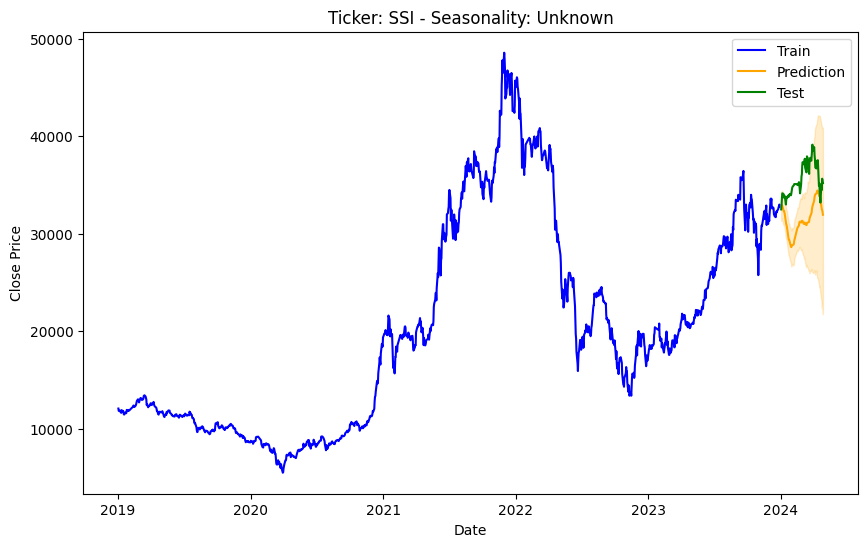

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/s_mh1c0g.json


Processing ticker (Multiplicative): BCM


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/z2pvx3fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51215', 'data', 'file=/tmp/tmp04_0b7s9/s_mh1c0g.json', 'init=/tmp/tmp04_0b7s9/z2pvx3fa.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model85vv8wgd/prophet_model-20240801132320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3715.256406933202, RMSE: 4399.697524924807


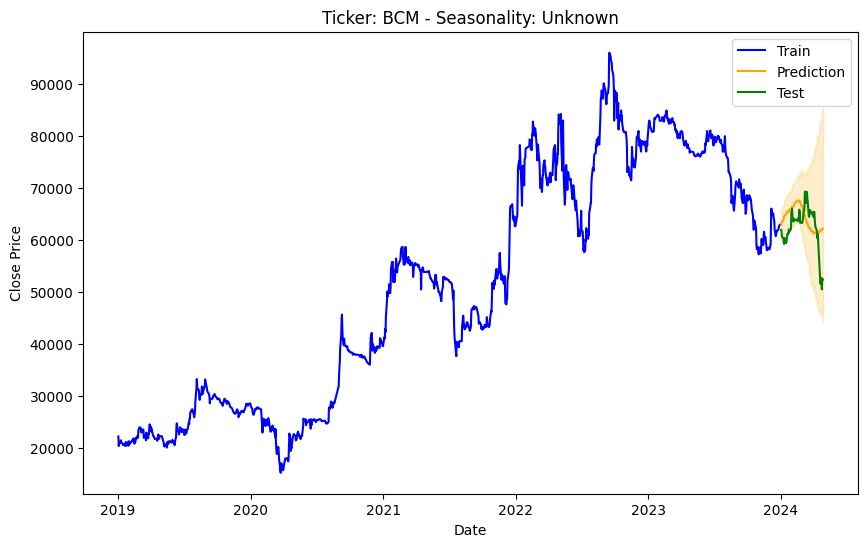

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/kfdsk9_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/mfhnw0fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94418', 'data', 'file=/tmp/tmp04_0b7s9/kfdsk9_2.json', 'init=/tmp/tmp04_0b7s9/mfhnw0fy.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3yrzuw2u/prophet_model-20240801132323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VHM


13:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1509.211715754831, RMSE: 1896.6616539704883


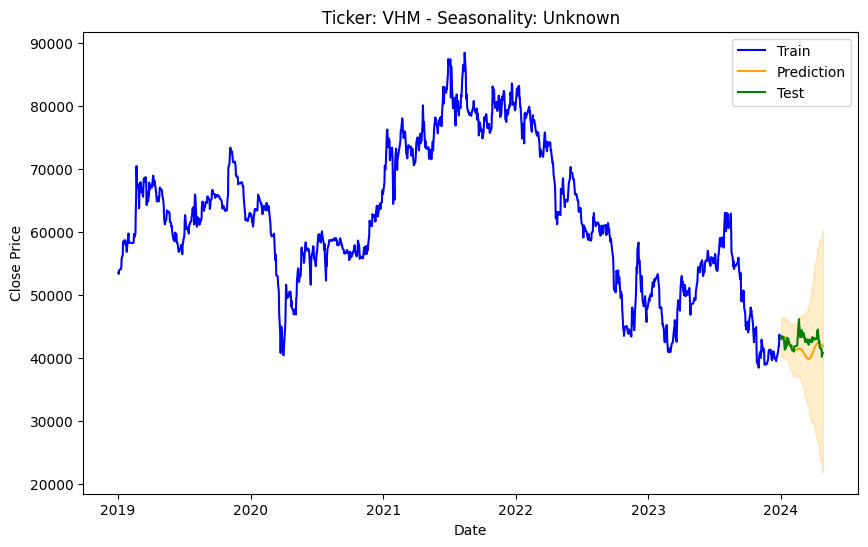

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/vbegeh73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/nlmxvx2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18506', 'data', 'file=/tmp/tmp04_0b7s9/vbegeh73.json', 'init=/tmp/tmp04_0b7s9/nlmxvx2h.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model0rd5137m/prophet_model-20240801132326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VIC


13:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 5364.877421041142, RMSE: 6616.434957519167


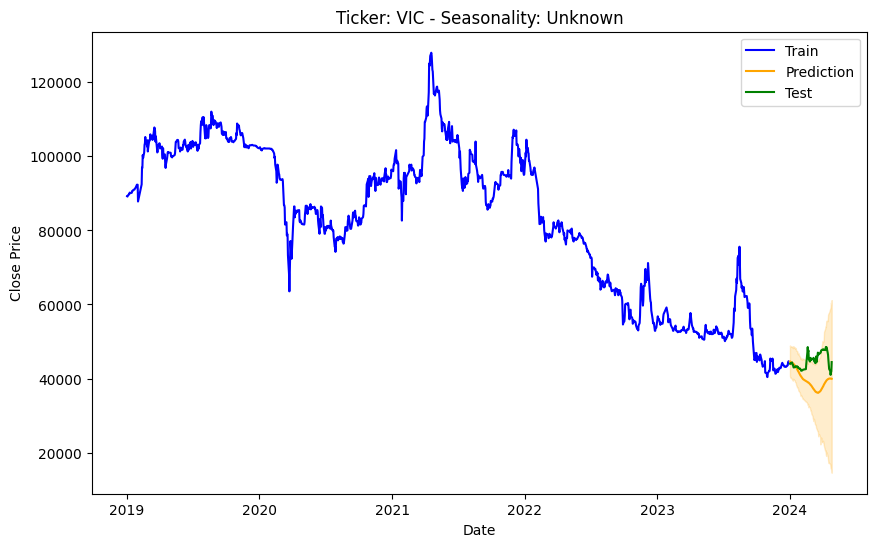

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/8jov45tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fdyd9ydh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91124', 'data', 'file=/tmp/tmp04_0b7s9/8jov45tf.json', 'init=/tmp/tmp04_0b7s9/fdyd9ydh.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeldjcuo07u/prophet_model-20240801132328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VRE


13:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1775.6630416421272, RMSE: 2194.0600351735443


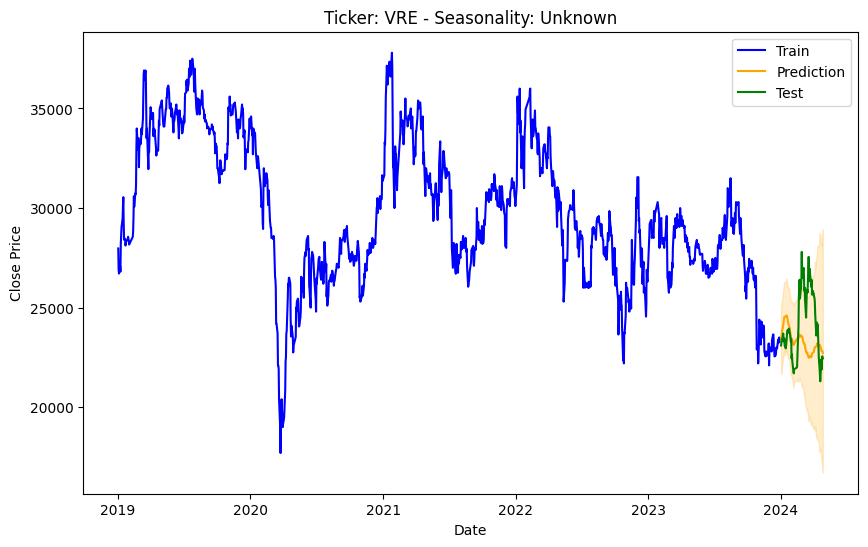

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/2jf9okk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/7oje6b39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28582', 'data', 'file=/tmp/tmp04_0b7s9/2jf9okk8.json', 'init=/tmp/tmp04_0b7s9/7oje6b39.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelktbie6h7/prophet_model-20240801132331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BVH


13:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3065.2015251742946, RMSE: 3692.339437576835


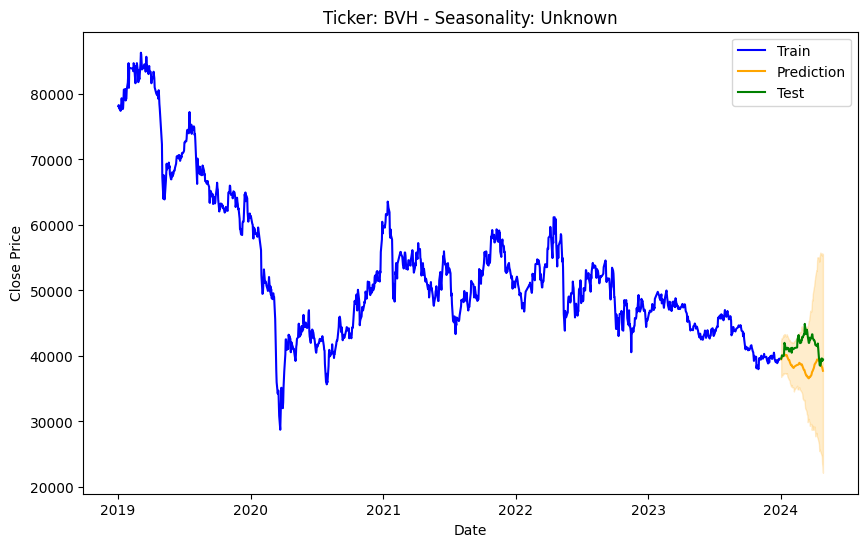

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/x0gwfmqs.json


Processing ticker (Multiplicative): POW


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/v3eqidua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81770', 'data', 'file=/tmp/tmp04_0b7s9/x0gwfmqs.json', 'init=/tmp/tmp04_0b7s9/v3eqidua.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model_n5bbn9p/prophet_model-20240801132335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 547.6976338556109, RMSE: 652.5322451138335


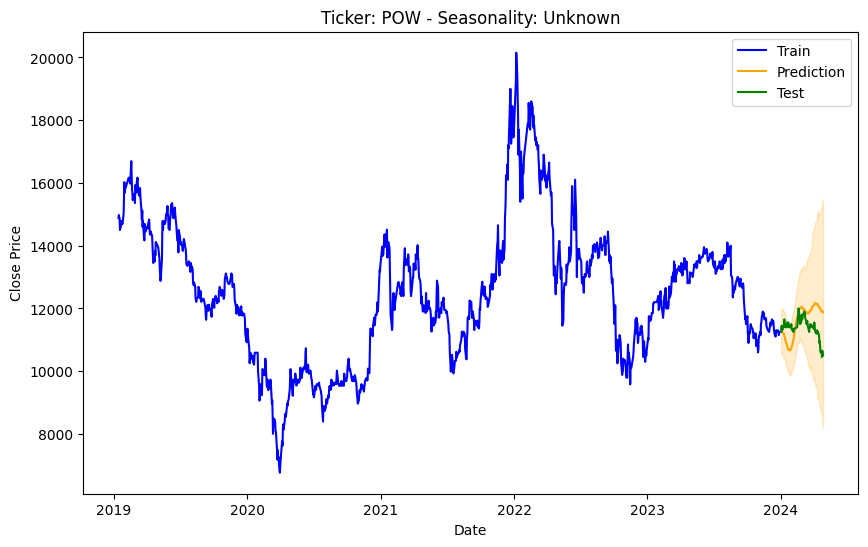

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/crldofow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/9m2woqbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36302', 'data', 'file=/tmp/tmp04_0b7s9/crldofow.json', 'init=/tmp/tmp04_0b7s9/9m2woqbi.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelrydiuakv/prophet_model-20240801132338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): GAS


13:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4265.032250203972, RMSE: 5712.687062300069


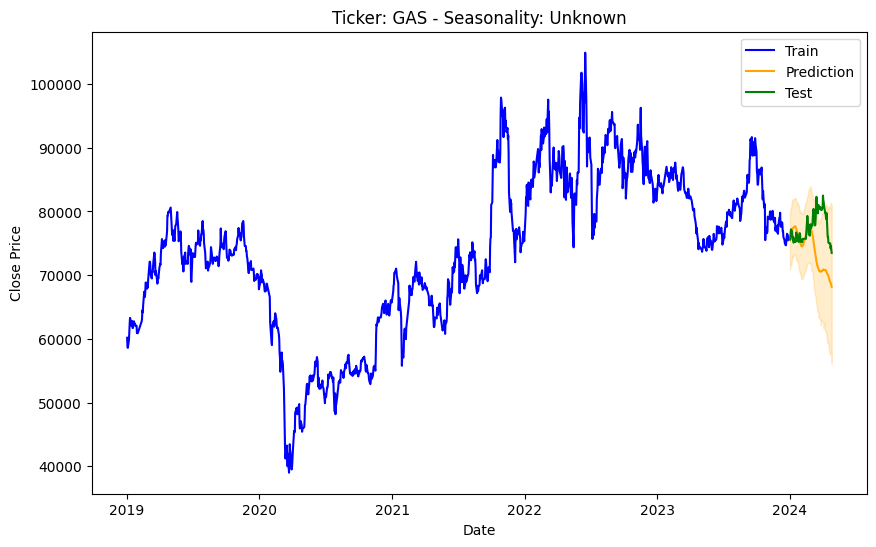

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/x5m9oecj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/kf5lf2y4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57407', 'data', 'file=/tmp/tmp04_0b7s9/x5m9oecj.json', 'init=/tmp/tmp04_0b7s9/kf5lf2y4.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelxvptr_bz/prophet_model-20240801132340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): ACB


13:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 1782.814684635864, RMSE: 1906.8894764517213


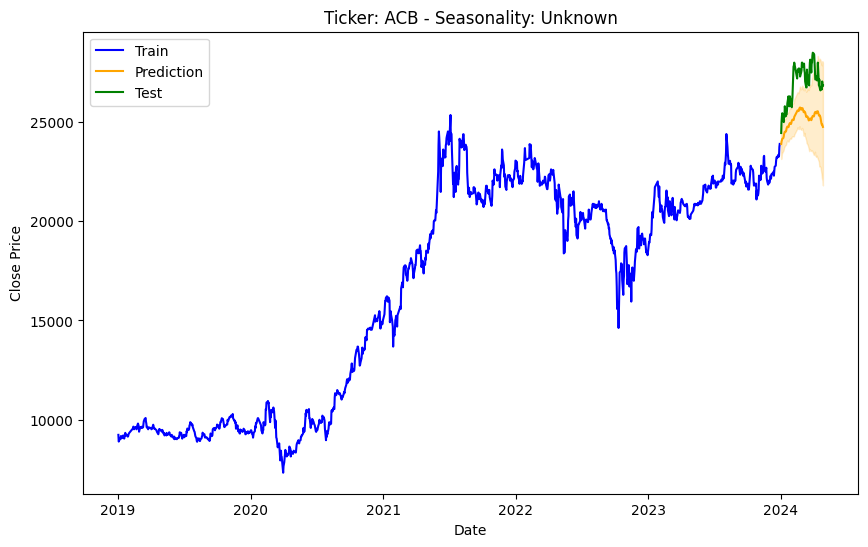

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/dv29g67d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/vpf7go_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40584', 'data', 'file=/tmp/tmp04_0b7s9/dv29g67d.json', 'init=/tmp/tmp04_0b7s9/vpf7go_y.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3wkep807/prophet_model-20240801132343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BID


13:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 3074.023861483015, RMSE: 3879.5210224907614


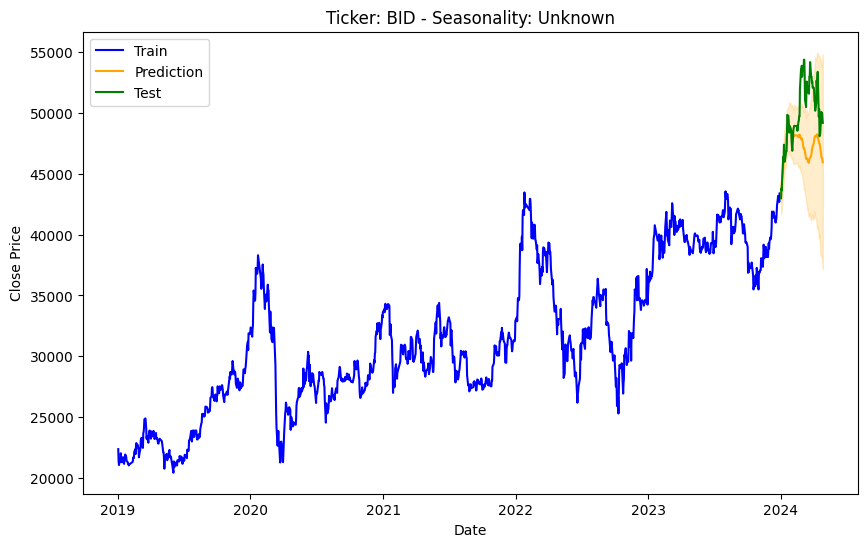

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/u7j3l718.json


Processing ticker (Multiplicative): CTG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/1roq7a5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92237', 'data', 'file=/tmp/tmp04_0b7s9/u7j3l718.json', 'init=/tmp/tmp04_0b7s9/1roq7a5f.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model9b9uthyr/prophet_model-20240801132346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5824.842860751898, RMSE: 6239.157938847959


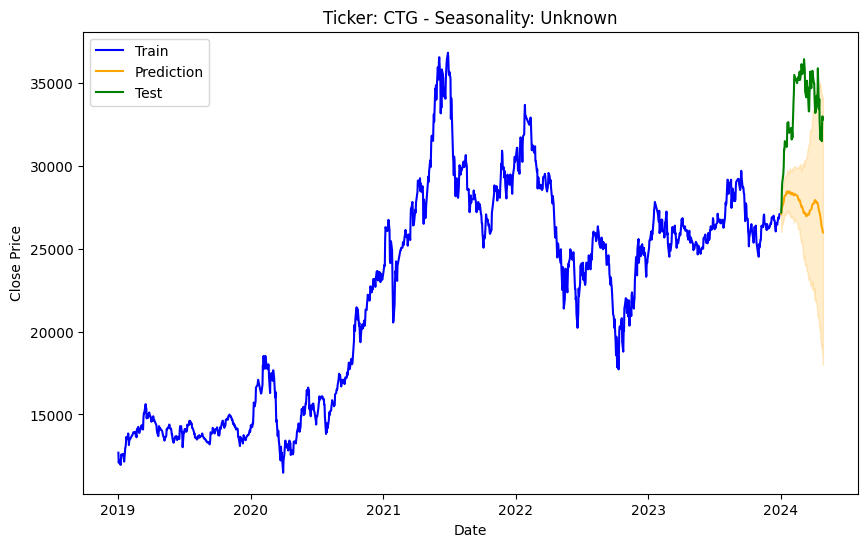

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/96zyyeof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/qy77se9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18199', 'data', 'file=/tmp/tmp04_0b7s9/96zyyeof.json', 'init=/tmp/tmp04_0b7s9/qy77se9q.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modellwr5d25b/prophet_model-20240801132351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HDB


13:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1109.7106051606445, RMSE: 1319.6485118640287


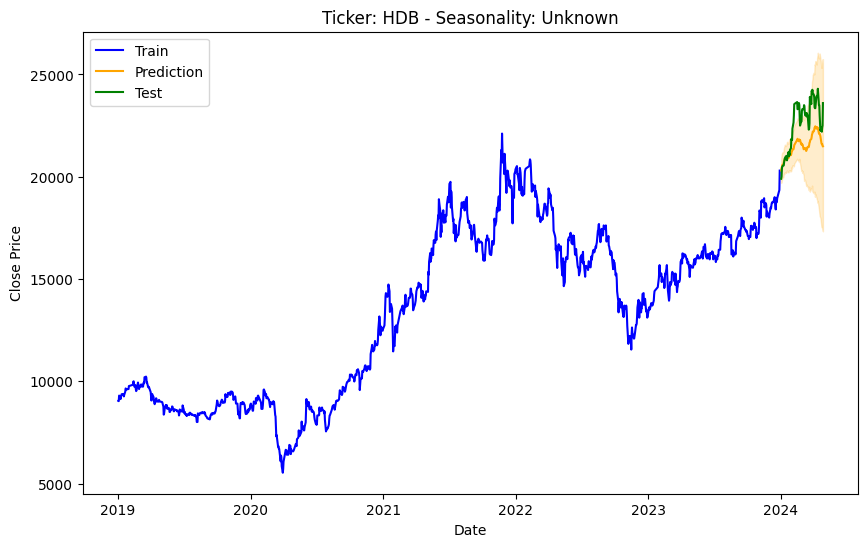

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/g_mbck2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/g89b3qmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63457', 'data', 'file=/tmp/tmp04_0b7s9/g_mbck2x.json', 'init=/tmp/tmp04_0b7s9/g89b3qmq.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model1d1oul8w/prophet_model-20240801132355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:23:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): MBB


13:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3944.281632790621, RMSE: 4276.596083319232


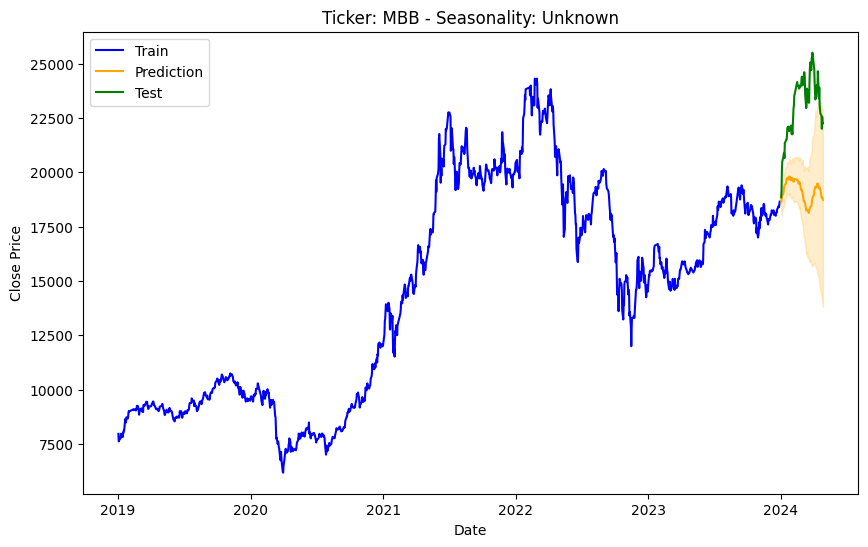

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fvkbcjui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/zvrcwk5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46493', 'data', 'file=/tmp/tmp04_0b7s9/fvkbcjui.json', 'init=/tmp/tmp04_0b7s9/zvrcwk5_.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeljs2z4ab3/prophet_model-20240801132401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSB


13:24:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1906.9456722900738, RMSE: 2186.147686520346


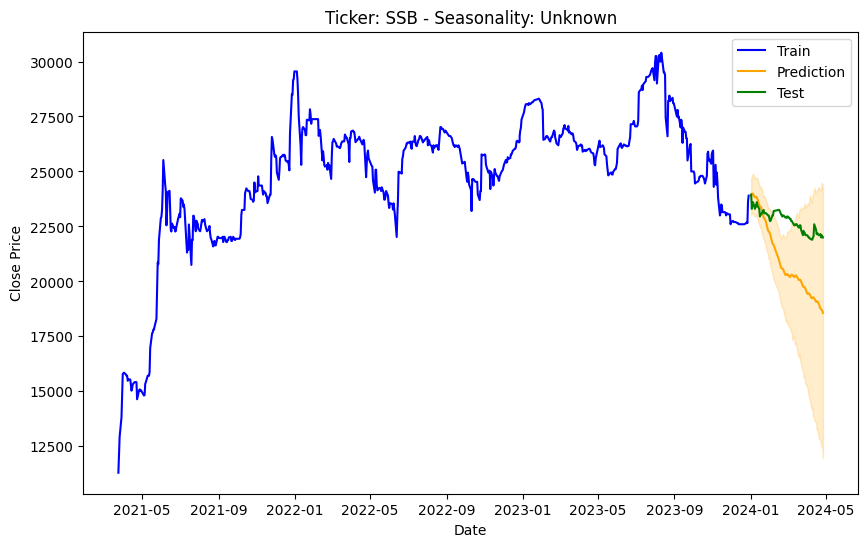

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fhsbtfjj.json


Processing ticker (Multiplicative): SHB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/foxb5tnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23791', 'data', 'file=/tmp/tmp04_0b7s9/fhsbtfjj.json', 'init=/tmp/tmp04_0b7s9/foxb5tnz.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modeldj42gwxs/prophet_model-20240801132403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1025.2315716164355, RMSE: 1126.93457297988


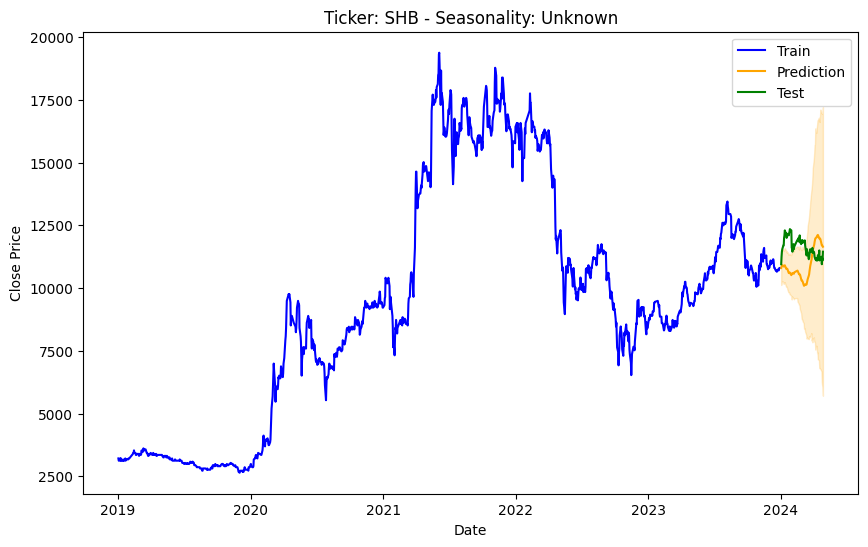

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/xlwyf5af.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/hpm76ot_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74894', 'data', 'file=/tmp/tmp04_0b7s9/xlwyf5af.json', 'init=/tmp/tmp04_0b7s9/hpm76ot_.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelw7h0o3gp/prophet_model-20240801132407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): STB


13:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 1599.4528869567187, RMSE: 1971.1614804130863


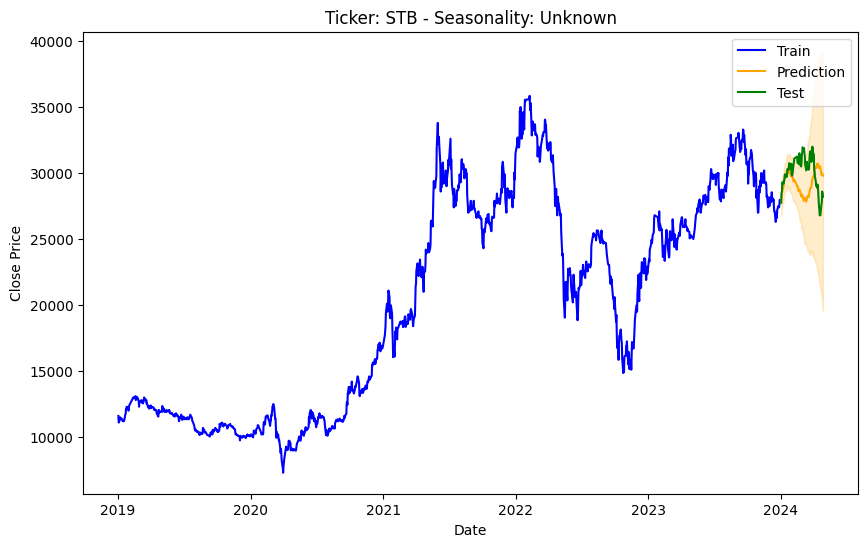

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/p8ho7kp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/q3do79jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60173', 'data', 'file=/tmp/tmp04_0b7s9/p8ho7kp_.json', 'init=/tmp/tmp04_0b7s9/q3do79jn.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelvxccif3v/prophet_model-20240801132410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): TCB


13:24:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 8218.532718812437, RMSE: 9538.052766873468


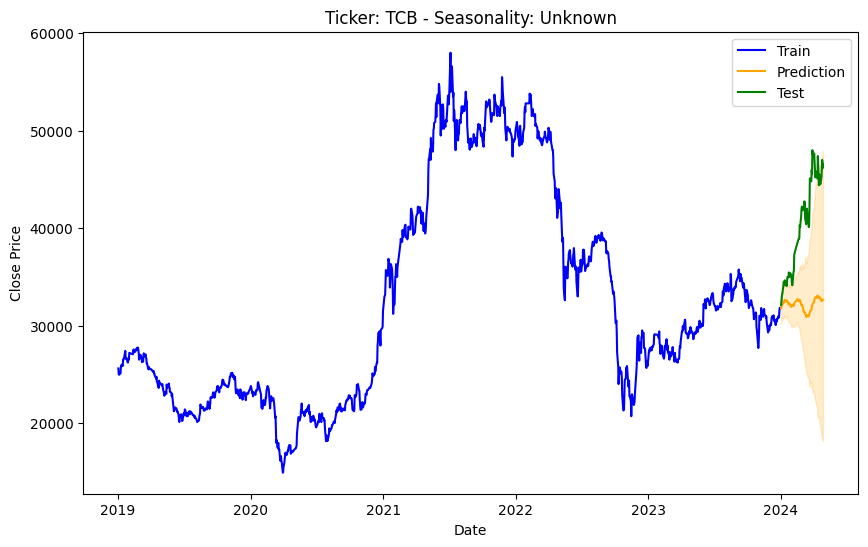

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/dm4fln05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/h69r0tue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81685', 'data', 'file=/tmp/tmp04_0b7s9/dm4fln05.json', 'init=/tmp/tmp04_0b7s9/h69r0tue.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelby01x2r2/prophet_model-20240801132413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): TPB


13:24:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 908.1820178907286, RMSE: 1056.1296818536684


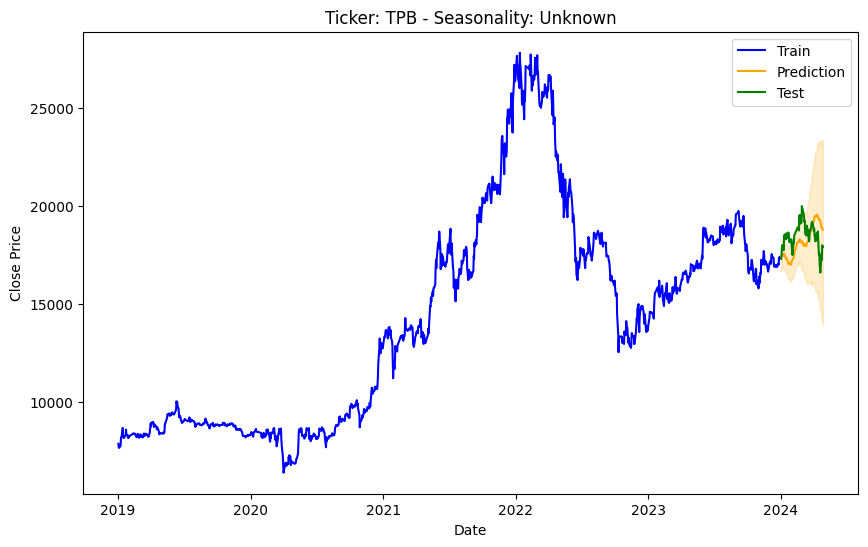

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/o8rcirg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ydp8wlvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3547', 'data', 'file=/tmp/tmp04_0b7s9/o8rcirg_.json', 'init=/tmp/tmp04_0b7s9/ydp8wlvm.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model8l59_k_s/prophet_model-20240801132416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VCB


13:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6213.08360770242, RMSE: 7196.419122470025


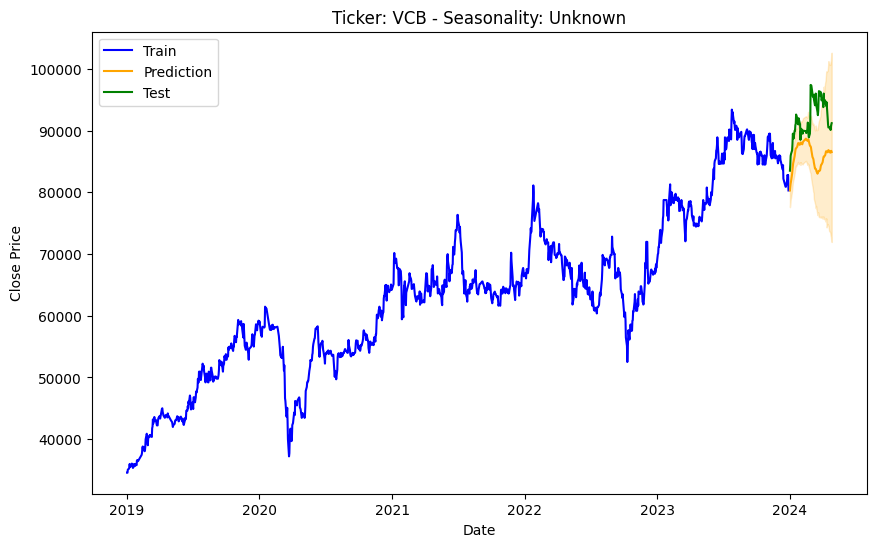

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/azd1ypun.json


Processing ticker (Multiplicative): VIB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/9eeymosl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79685', 'data', 'file=/tmp/tmp04_0b7s9/azd1ypun.json', 'init=/tmp/tmp04_0b7s9/9eeymosl.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model2jyf66p_/prophet_model-20240801132420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1775.3466822956752, RMSE: 2043.106745747272


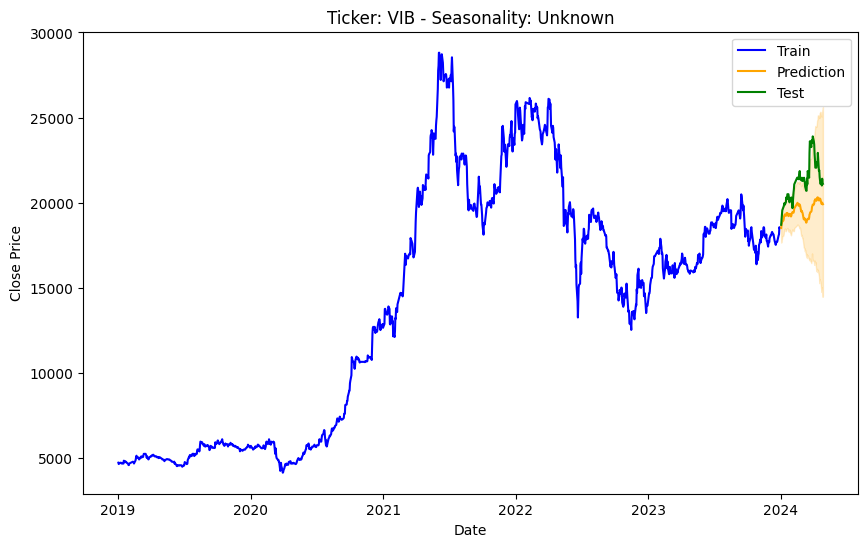

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/mrkiej4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ita_5rv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79408', 'data', 'file=/tmp/tmp04_0b7s9/mrkiej4n.json', 'init=/tmp/tmp04_0b7s9/ita_5rv3.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelvegw7npu/prophet_model-20240801132423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VPB


13:24:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1103.3655371979635, RMSE: 1493.9026445940262


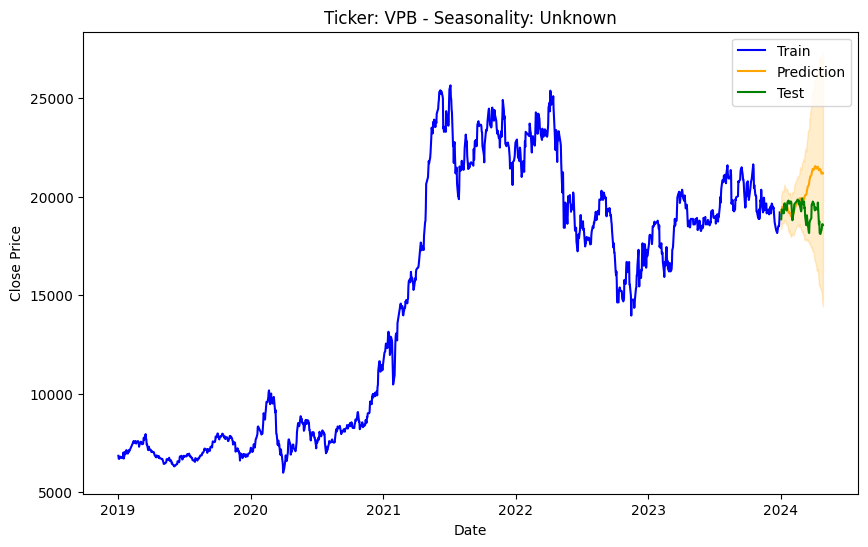

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/xuayeici.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/tz018hnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53664', 'data', 'file=/tmp/tmp04_0b7s9/xuayeici.json', 'init=/tmp/tmp04_0b7s9/tz018hnd.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelmuh1ybjm/prophet_model-20240801132426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HPG


13:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 1324.3061646367485, RMSE: 1608.9852880706394


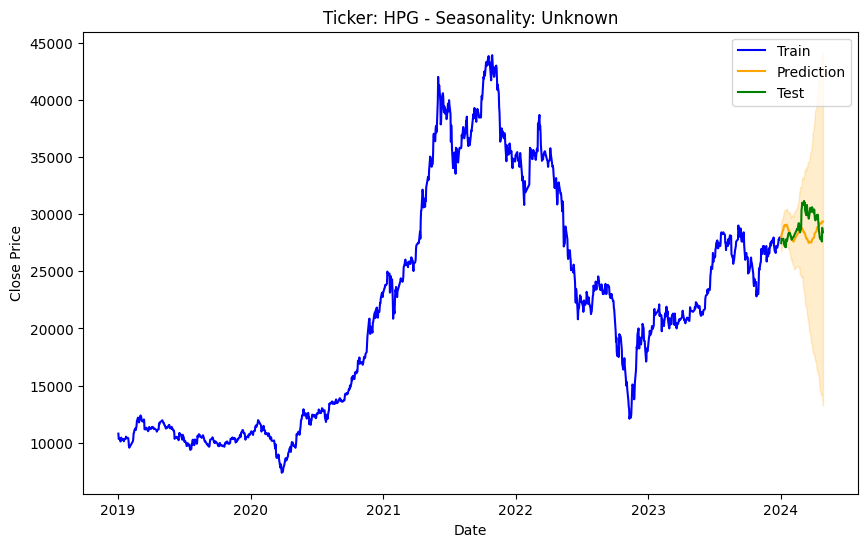

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/x7l75sob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/78fzf2u0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21948', 'data', 'file=/tmp/tmp04_0b7s9/x7l75sob.json', 'init=/tmp/tmp04_0b7s9/78fzf2u0.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelu8sg0tw0/prophet_model-20240801132429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): GVR


13:24:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 7335.5800793828275, RMSE: 8513.124614334216


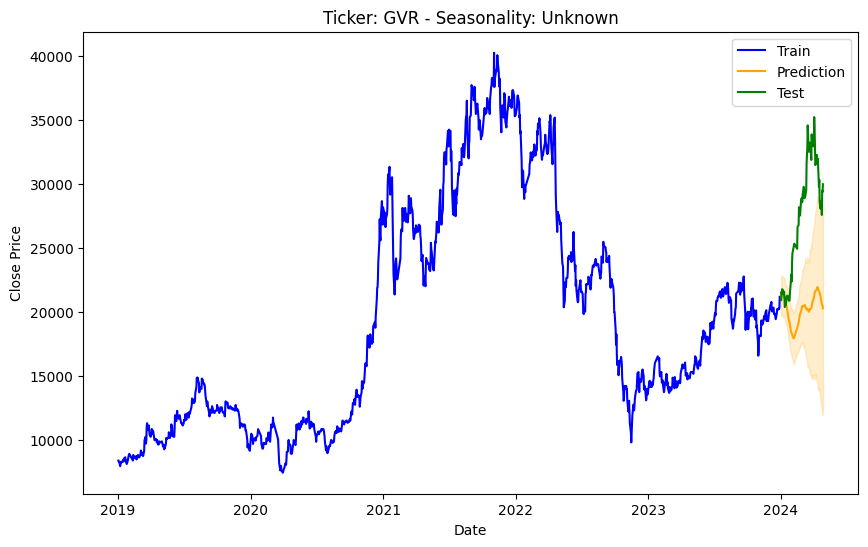

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/y0607ic4.json


Processing ticker (Multiplicative): MSN


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/ioogypy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90329', 'data', 'file=/tmp/tmp04_0b7s9/y0607ic4.json', 'init=/tmp/tmp04_0b7s9/ioogypy_.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelam0ne62h/prophet_model-20240801132433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 14124.14660355107, RMSE: 16737.980637989727


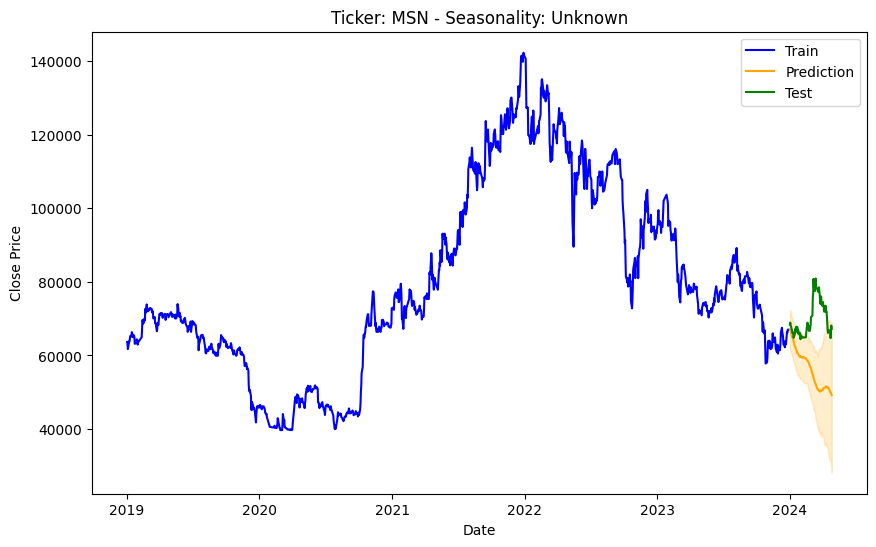

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/rzay8eak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/fzmq6d60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28091', 'data', 'file=/tmp/tmp04_0b7s9/rzay8eak.json', 'init=/tmp/tmp04_0b7s9/fzmq6d60.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model91qjd3q6/prophet_model-20240801132436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VNM


13:24:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 4702.998744374605, RMSE: 5547.661506359563


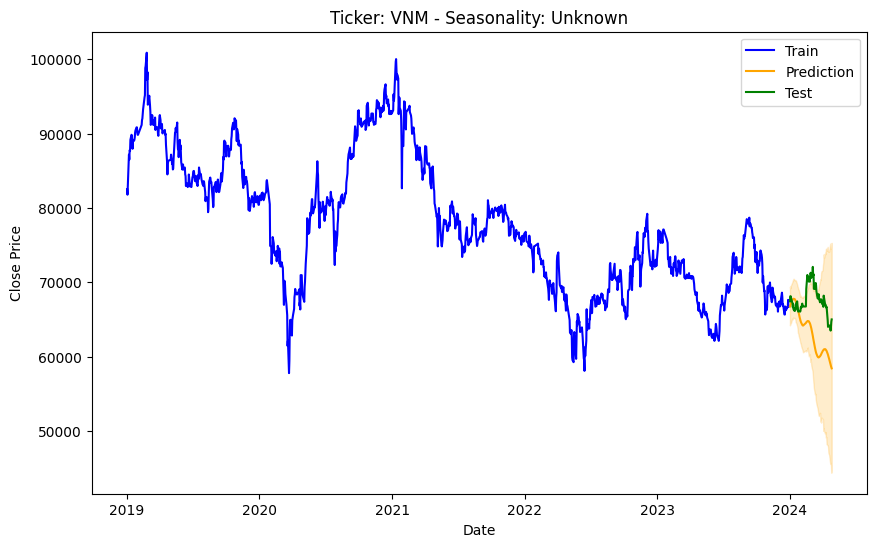

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/9lpea_d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/46dyhegx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30654', 'data', 'file=/tmp/tmp04_0b7s9/9lpea_d7.json', 'init=/tmp/tmp04_0b7s9/46dyhegx.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelttoh6s0u/prophet_model-20240801132439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SAB


13:24:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2184.516907192356, RMSE: 2769.060427626678


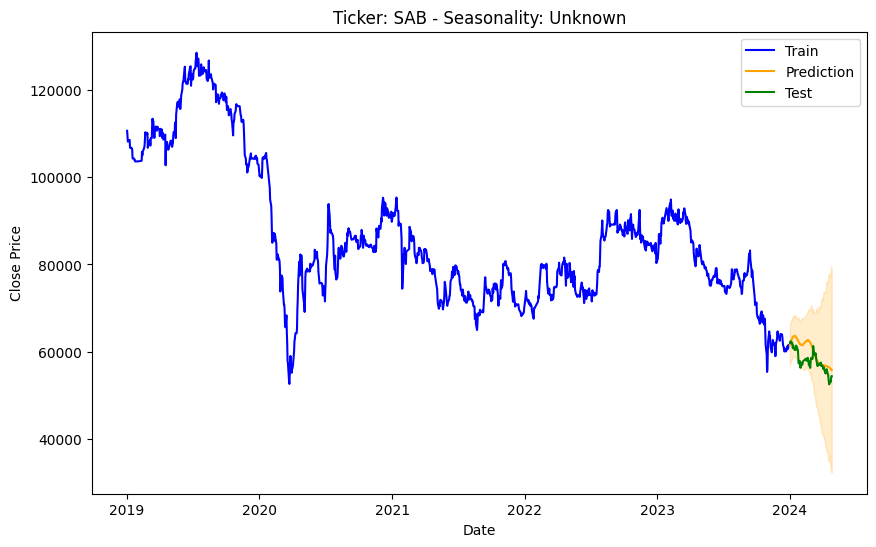

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/mt06nvlw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/oera8ixl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95929', 'data', 'file=/tmp/tmp04_0b7s9/mt06nvlw.json', 'init=/tmp/tmp04_0b7s9/oera8ixl.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model7oortjc5/prophet_model-20240801132442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VJC


13:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 3342.2700727085153, RMSE: 4027.083387401119


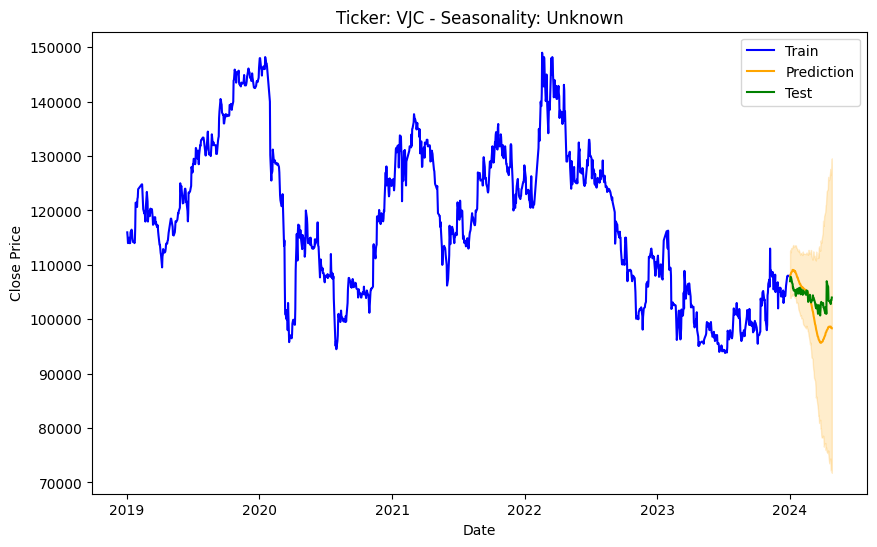

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/y9morqso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/8wi2rj2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65542', 'data', 'file=/tmp/tmp04_0b7s9/y9morqso.json', 'init=/tmp/tmp04_0b7s9/8wi2rj2y.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelwtyle8bx/prophet_model-20240801132445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): MWG


13:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6892.718713129378, RMSE: 8019.757283744389


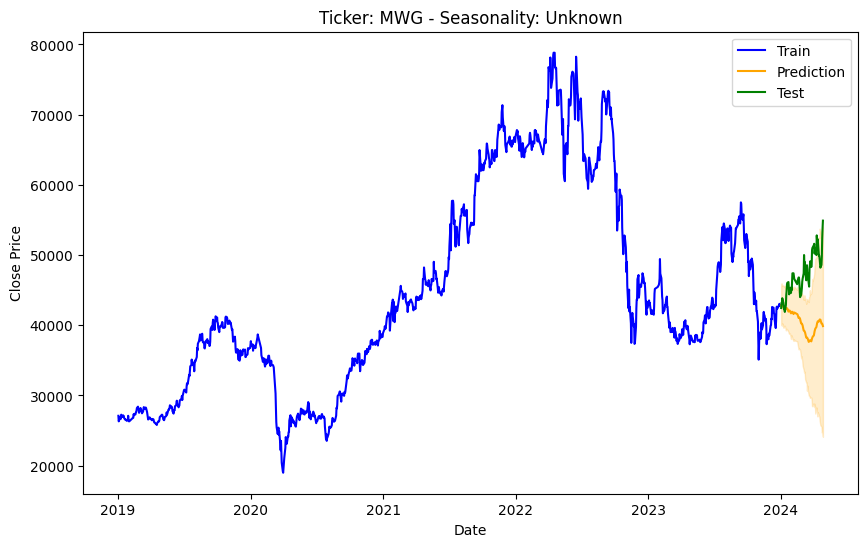

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/krtdvbc4.json


Processing ticker (Multiplicative): PLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/a3yew2gm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20359', 'data', 'file=/tmp/tmp04_0b7s9/krtdvbc4.json', 'init=/tmp/tmp04_0b7s9/a3yew2gm.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model3higoc2h/prophet_model-20240801132450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1415.7192930803237, RMSE: 1699.59640403365


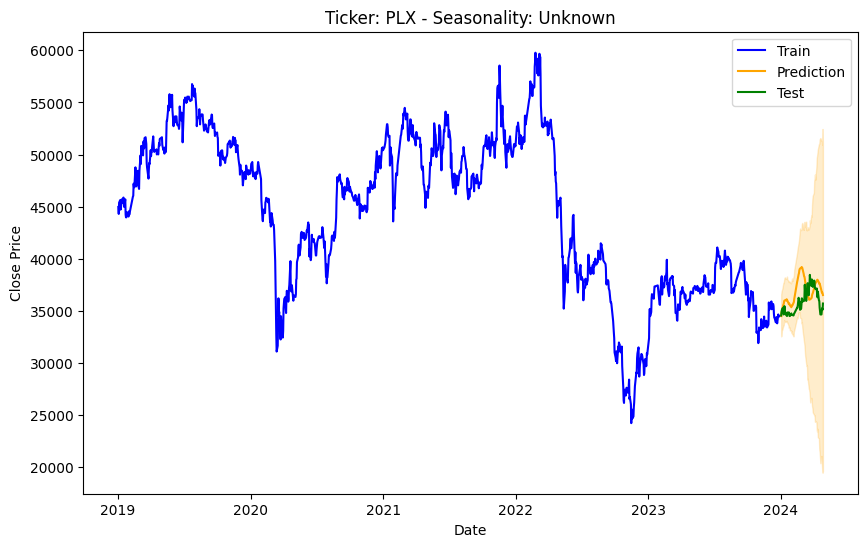

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/apa_k6l2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/o4vyl095.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14884', 'data', 'file=/tmp/tmp04_0b7s9/apa_k6l2.json', 'init=/tmp/tmp04_0b7s9/o4vyl095.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_modelyfuft_mf/prophet_model-20240801132453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): FPT


13:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 12505.94511980189, RMSE: 15363.962323883527


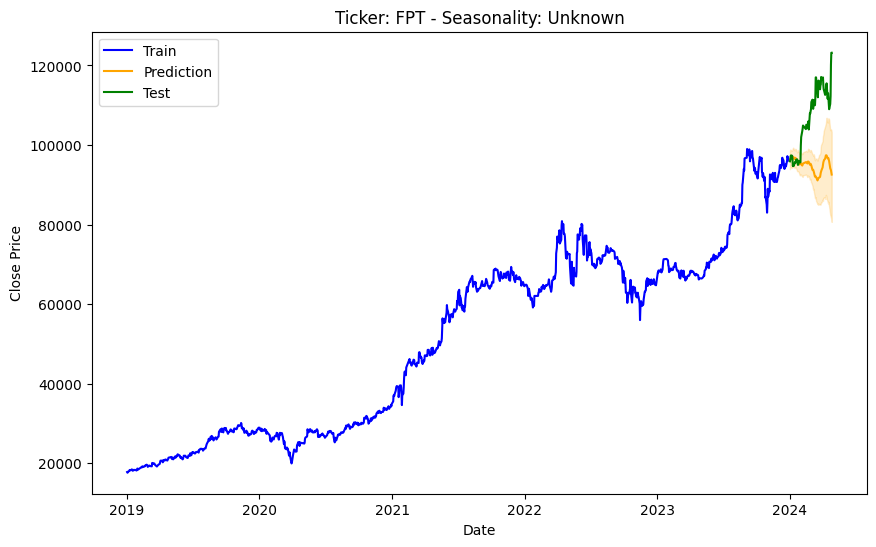

In [36]:
for ticker in tickers:
    print(f"Processing ticker (Multiplicative): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_multiplicative = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')

    # Huấn luyện mô hình và dự báo
    forecast_multiplicative, mae_multiplicative, rmse_multiplicative = evaluator_multiplicative.fit_and_predict(model_multiplicative, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_multiplicative.plot_forecast(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker)


In [37]:
results_df_additive = evaluator_additive.get_results()
results_df_multiplicative = evaluator_multiplicative.get_results()
print("Additive Results:")
print(results_df_additive)
print("Multiplicative Results:")
print(results_df_multiplicative)

Additive Results:
   ticker           mae          rmse seasonality_mode
0     SSI   1531.845126   1783.622404         additive
1     SSI   1531.845126   1783.622404         additive
2     BCM   3813.817486   4323.646052         additive
3     VHM   1301.490936   1651.365161         additive
4     VIC   3834.416732   4917.436417         additive
5     VRE   1686.073083   1976.674154         additive
6     BVH   3427.811291   3956.365841         additive
7     POW    189.978760    244.239268         additive
8     GAS   4600.381570   6024.802086         additive
9     ACB   2142.070144   2259.260095         additive
10    BID   4879.126247   5675.993039         additive
11    CTG   5226.090120   5538.126896         additive
12    HDB   1587.301322   1850.210765         additive
13    MBB   3432.734230   3652.414275         additive
14    SSB   1081.332705   1199.970395         additive
15    SHB   1062.760838   1257.869624         additive
16    STB    938.671173   1505.468905         a

In [38]:
# Lấy và hiển thị kết quả
results_df_additive = evaluator_additive.get_results()
results_df_multiplicative = evaluator_multiplicative.get_results()

# Tạo bảng kết quả
results_df = pd.merge(results_df_additive, results_df_multiplicative, on='ticker', suffixes=('_additive', '_multiplicative'))
print(results_df)

   ticker  mae_additive  rmse_additive seasonality_mode_additive  \
0     SSI   1531.845126    1783.622404                  additive   
1     SSI   1531.845126    1783.622404                  additive   
2     BCM   3813.817486    4323.646052                  additive   
3     VHM   1301.490936    1651.365161                  additive   
4     VIC   3834.416732    4917.436417                  additive   
5     VRE   1686.073083    1976.674154                  additive   
6     BVH   3427.811291    3956.365841                  additive   
7     POW    189.978760     244.239268                  additive   
8     GAS   4600.381570    6024.802086                  additive   
9     ACB   2142.070144    2259.260095                  additive   
10    BID   4879.126247    5675.993039                  additive   
11    CTG   5226.090120    5538.126896                  additive   
12    HDB   1587.301322    1850.210765                  additive   
13    MBB   3432.734230    3652.414275          

# Holt-Winters

## Holt-Winters additive

Processing ticker (Holt-Winters Additive): SSI
Ticker: SSI, MAE: 2874.348028271471, RMSE: 3336.463777951138


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


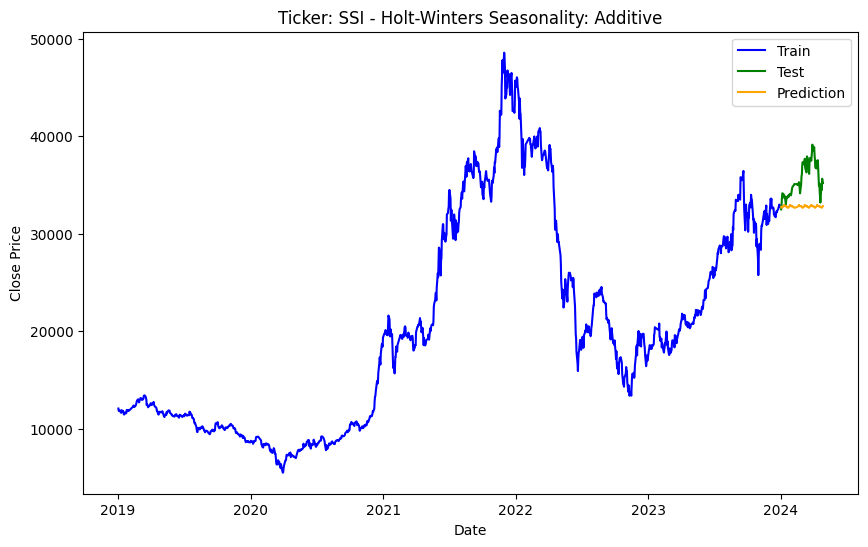

Processing ticker (Holt-Winters Additive): BCM
Ticker: BCM, MAE: 3033.051110261986, RMSE: 4123.949398925106


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


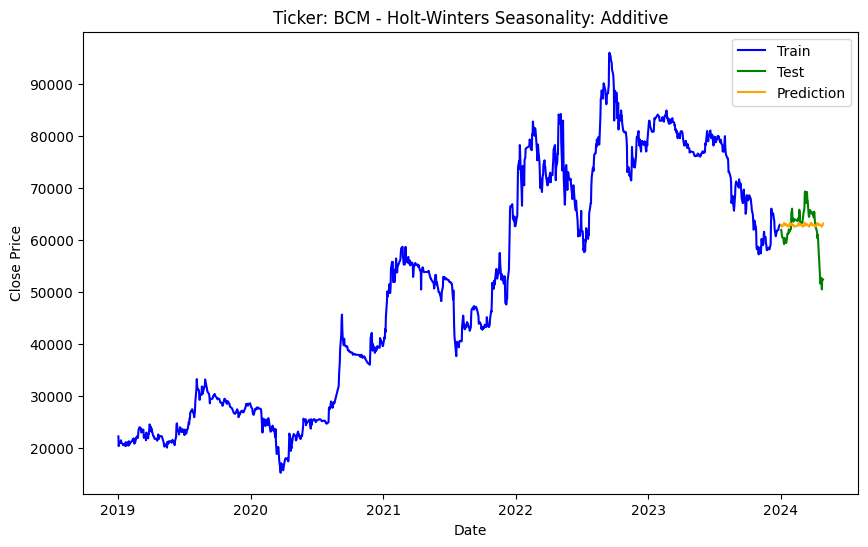

Processing ticker (Holt-Winters Additive): VHM
Ticker: VHM, MAE: 943.8901426302798, RMSE: 1215.05681534727


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


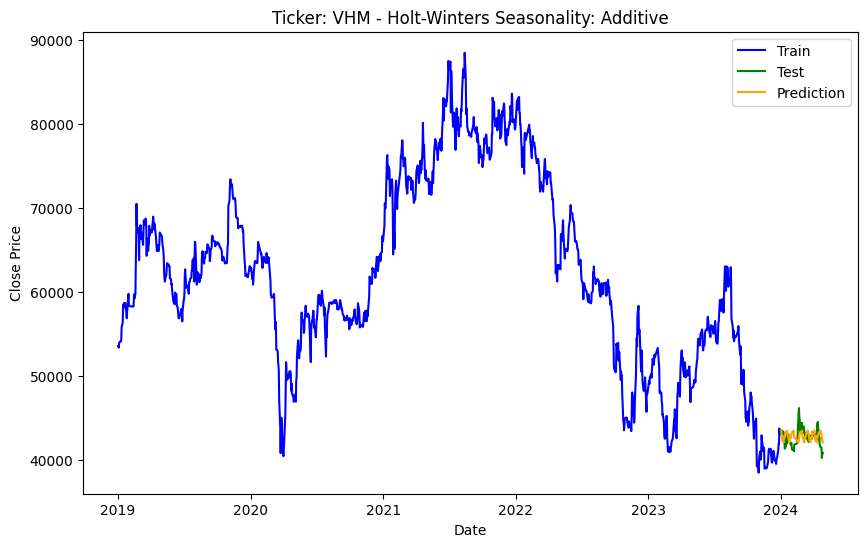

Processing ticker (Holt-Winters Additive): VIC
Ticker: VIC, MAE: 1824.4960550896726, RMSE: 2098.5516293428423


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


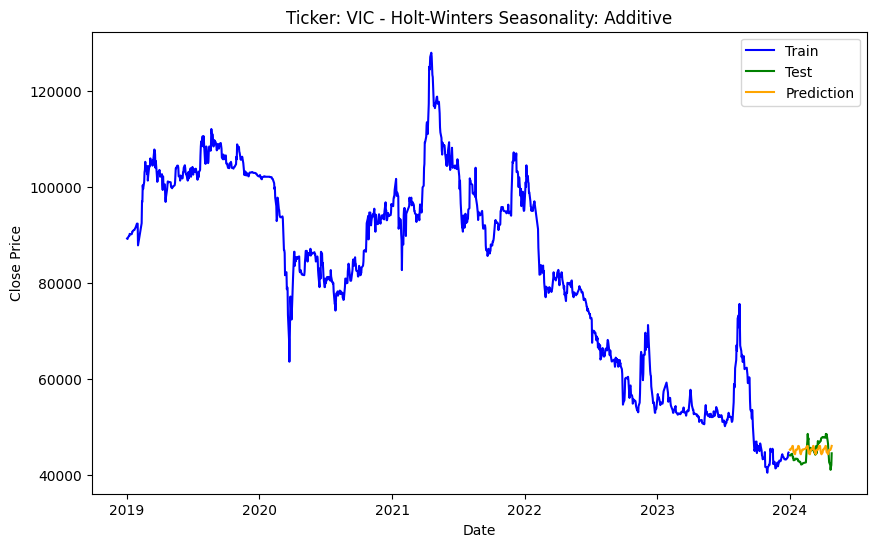

Processing ticker (Holt-Winters Additive): VRE
Ticker: VRE, MAE: 1566.7165590363645, RMSE: 1978.9635260106347


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


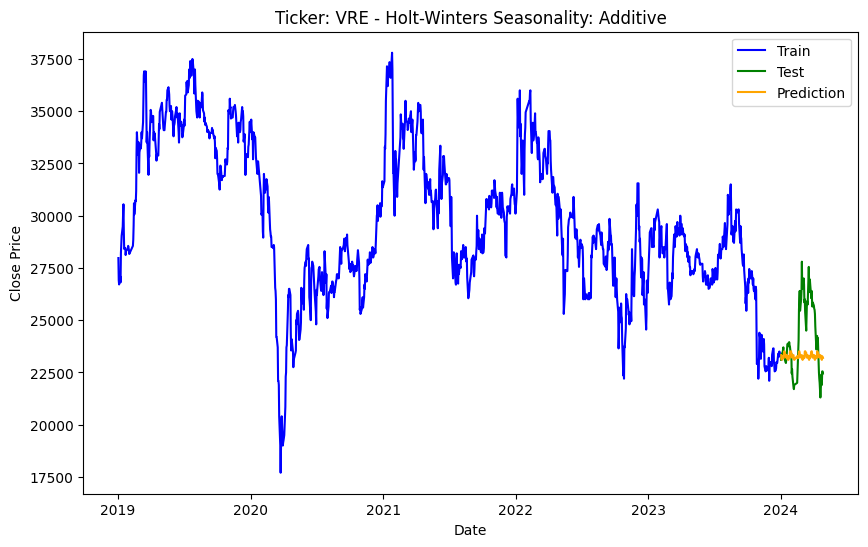

Processing ticker (Holt-Winters Additive): BVH
Ticker: BVH, MAE: 2121.327882586048, RMSE: 2471.237875904575


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


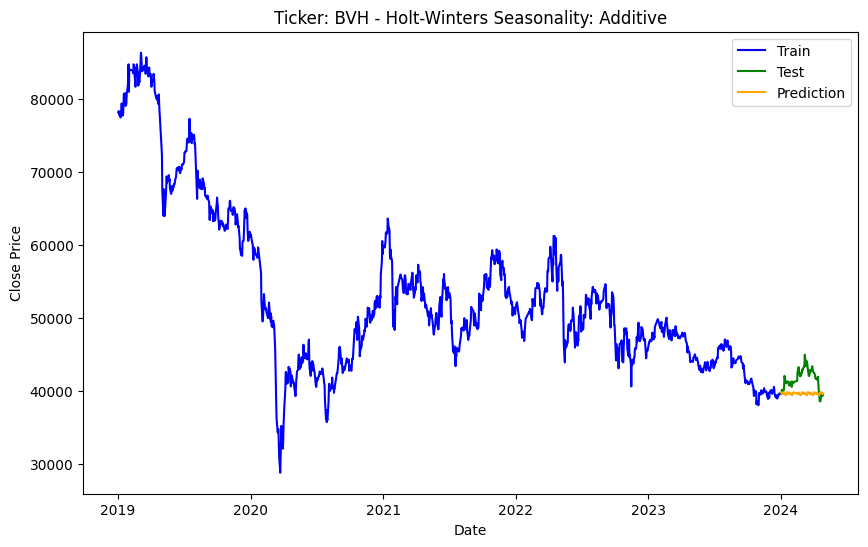

Processing ticker (Holt-Winters Additive): POW
Ticker: POW, MAE: 282.37615918037346, RMSE: 350.7081440078054


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


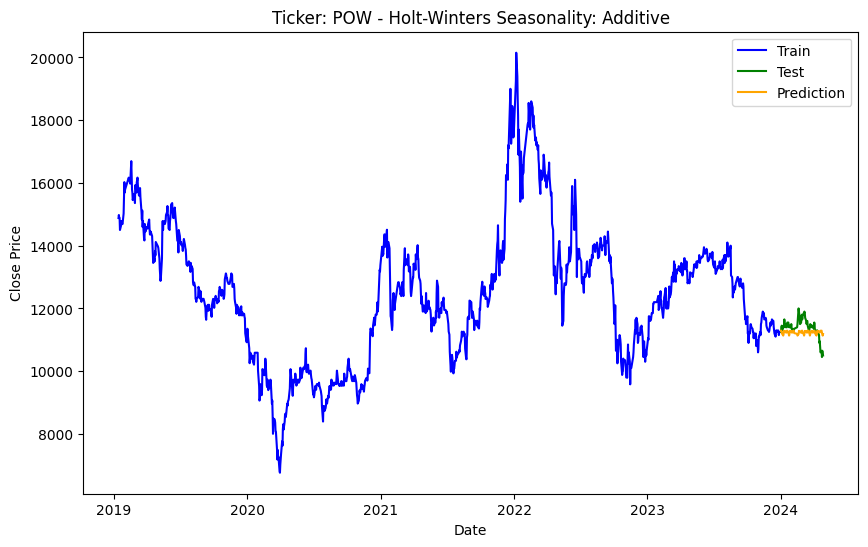

Processing ticker (Holt-Winters Additive): GAS
Ticker: GAS, MAE: 2502.3620667167716, RMSE: 3217.5324789472234


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


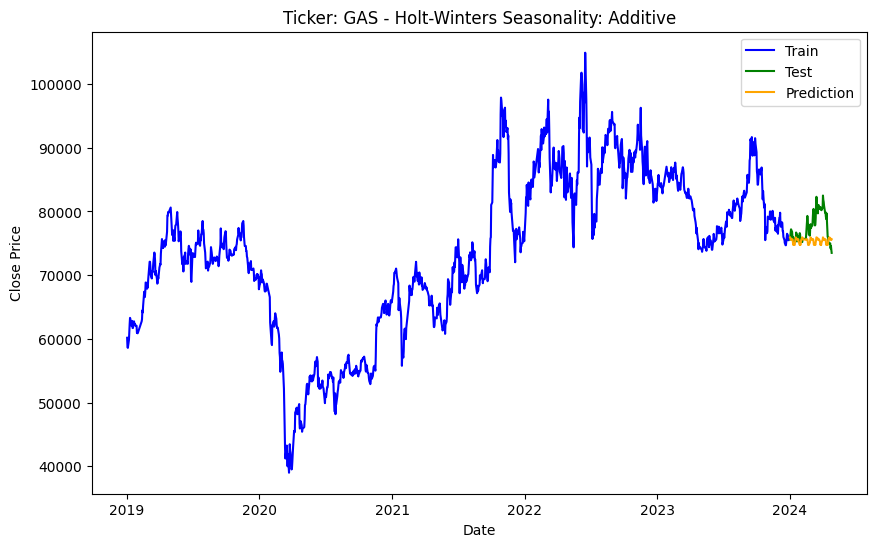

Processing ticker (Holt-Winters Additive): ACB
Ticker: ACB, MAE: 3021.6418107739864, RMSE: 3181.231295828967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


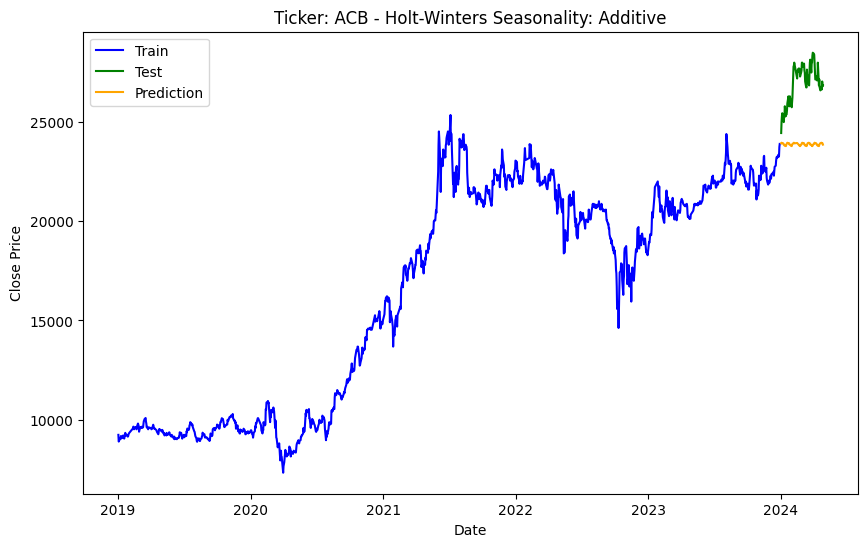

Processing ticker (Holt-Winters Additive): BID
Ticker: BID, MAE: 6735.974457480288, RMSE: 7249.291567850419


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


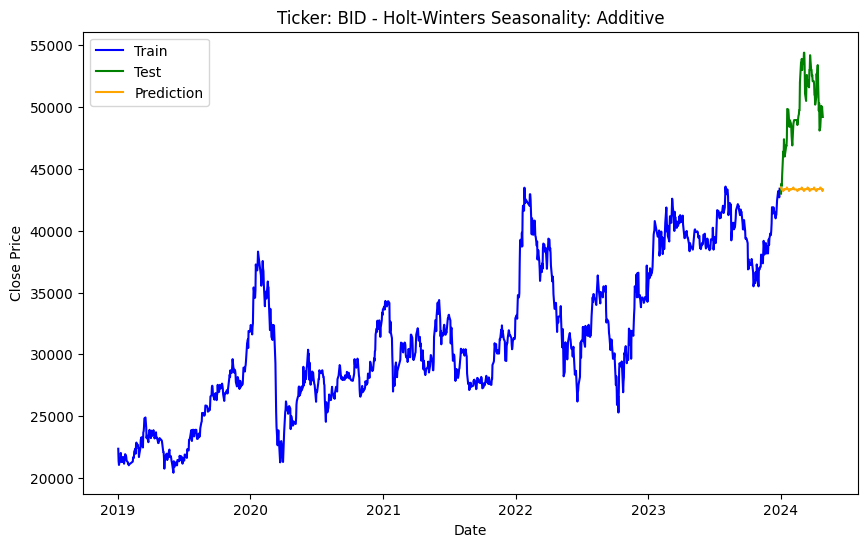

Processing ticker (Holt-Winters Additive): CTG
Ticker: CTG, MAE: 6367.39896254725, RMSE: 6701.865934488488


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


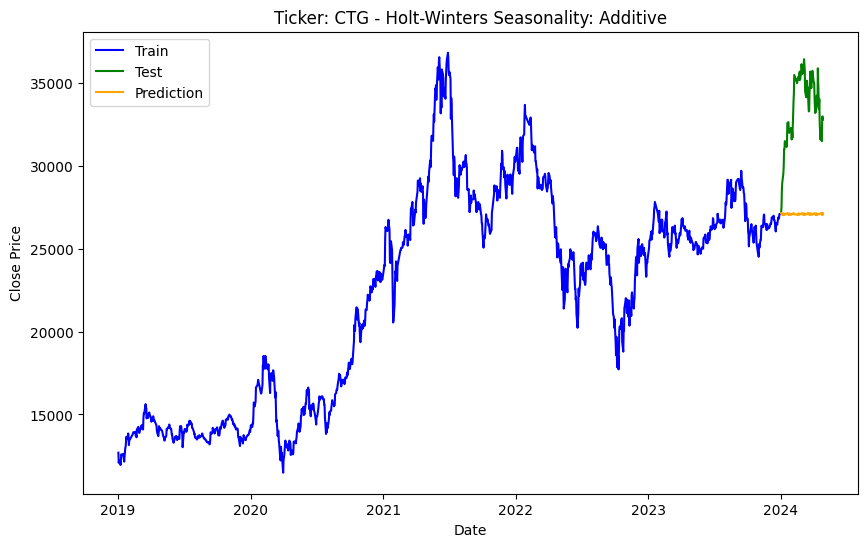

Processing ticker (Holt-Winters Additive): HDB
Ticker: HDB, MAE: 2371.9926734764545, RMSE: 2644.901062754805


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


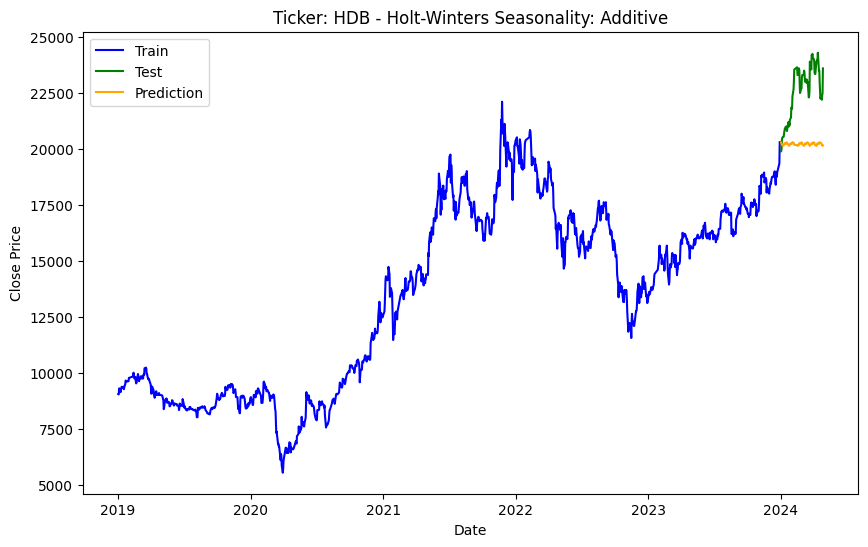

Processing ticker (Holt-Winters Additive): MBB
Ticker: MBB, MAE: 4428.766604892237, RMSE: 4662.854301993853


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


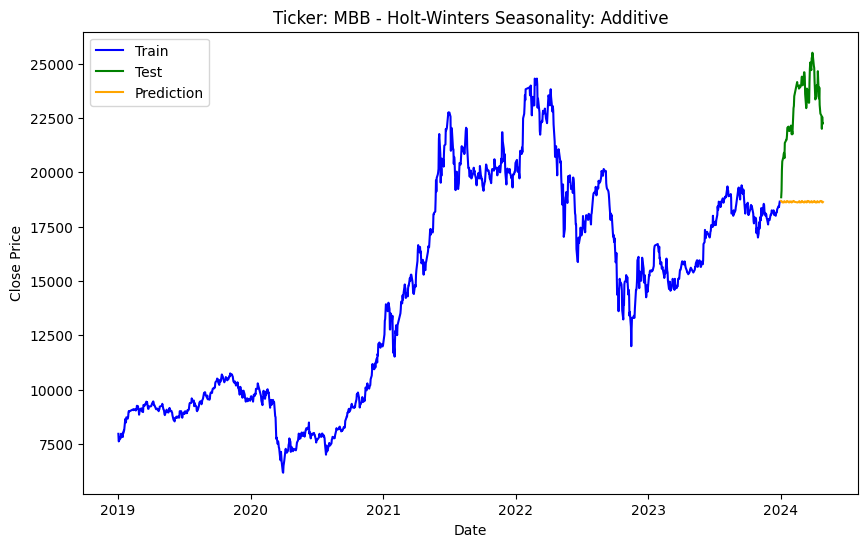

Processing ticker (Holt-Winters Additive): SSB
Ticker: SSB, MAE: 1195.9582929958342, RMSE: 1296.3309733362987


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


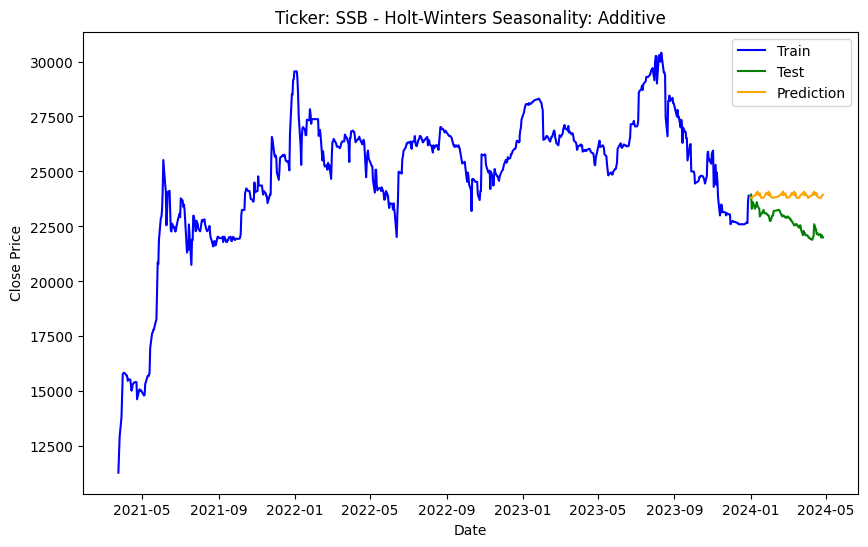

Processing ticker (Holt-Winters Additive): SHB
Ticker: SHB, MAE: 847.1045910654831, RMSE: 927.6556527676075


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


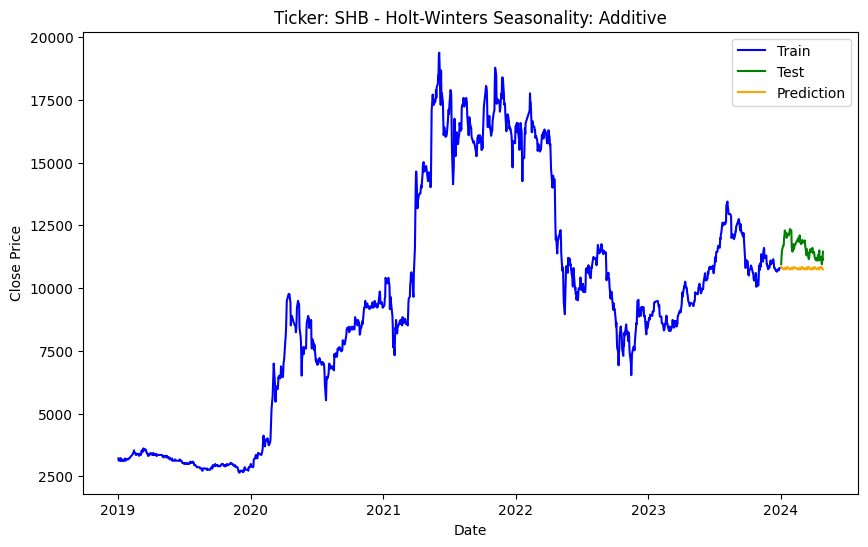

Processing ticker (Holt-Winters Additive): STB
Ticker: STB, MAE: 2277.784356256379, RMSE: 2506.599475361791


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


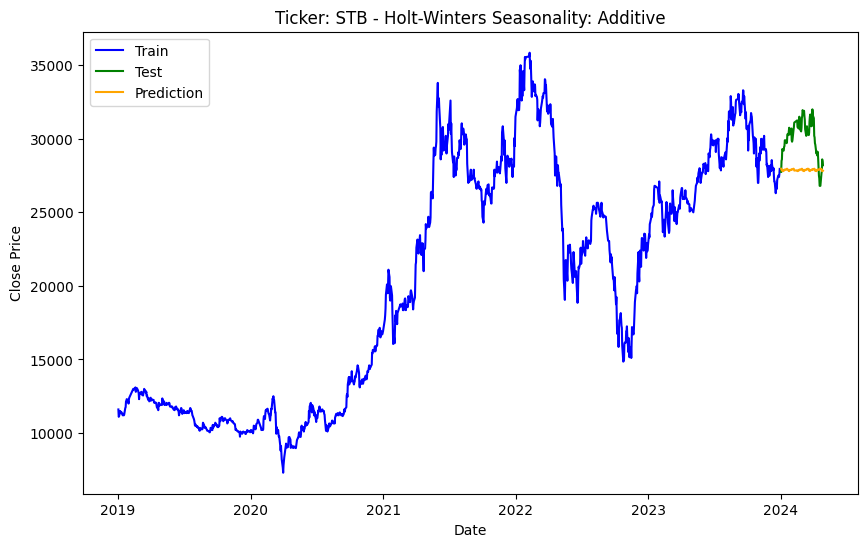

Processing ticker (Holt-Winters Additive): TCB
Ticker: TCB, MAE: 8646.457247800321, RMSE: 9916.646309623226


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


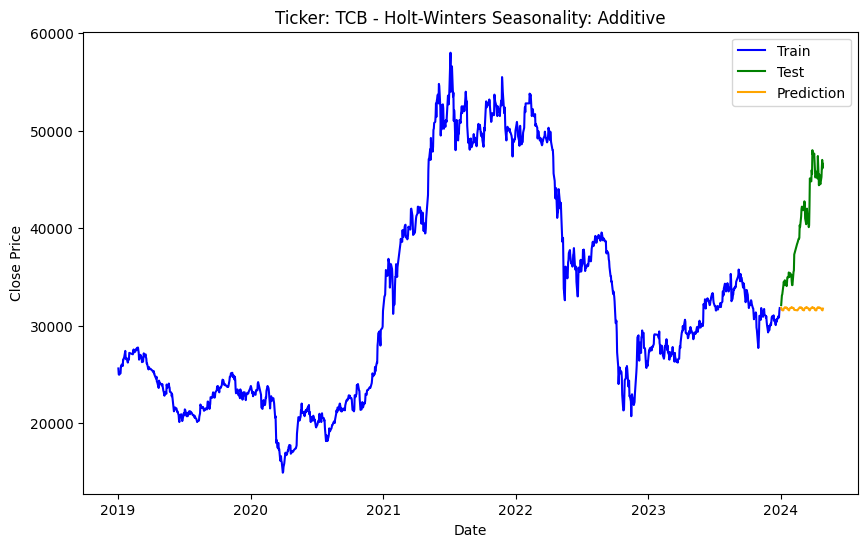

Processing ticker (Holt-Winters Additive): TPB
Ticker: TPB, MAE: 1153.8138765932788, RMSE: 1296.9132264810012


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


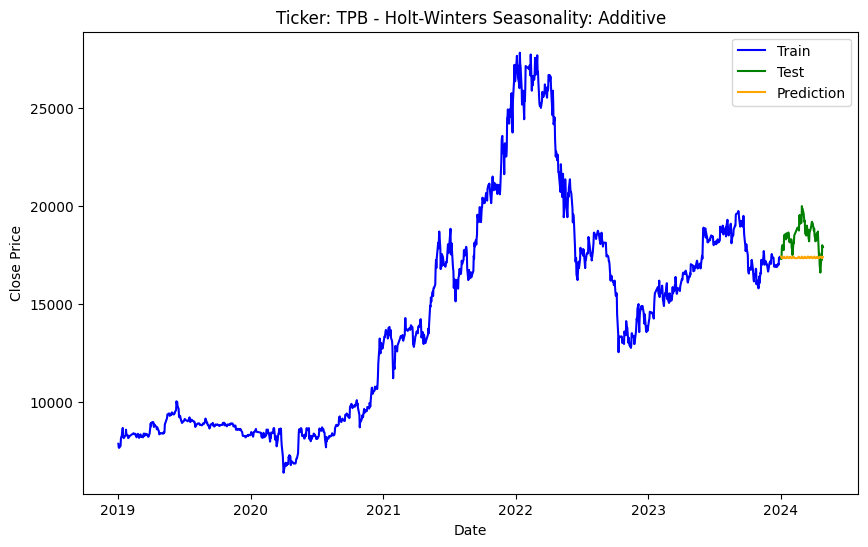

Processing ticker (Holt-Winters Additive): VCB
Ticker: VCB, MAE: 11846.451653745631, RMSE: 12238.647240047458


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


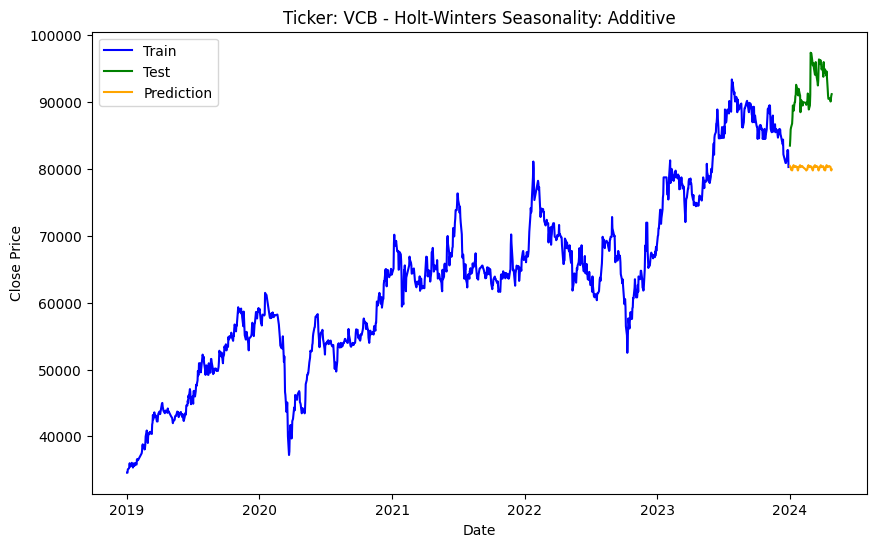

Processing ticker (Holt-Winters Additive): VIB
Ticker: VIB, MAE: 2756.130549417829, RMSE: 3005.364979940208


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


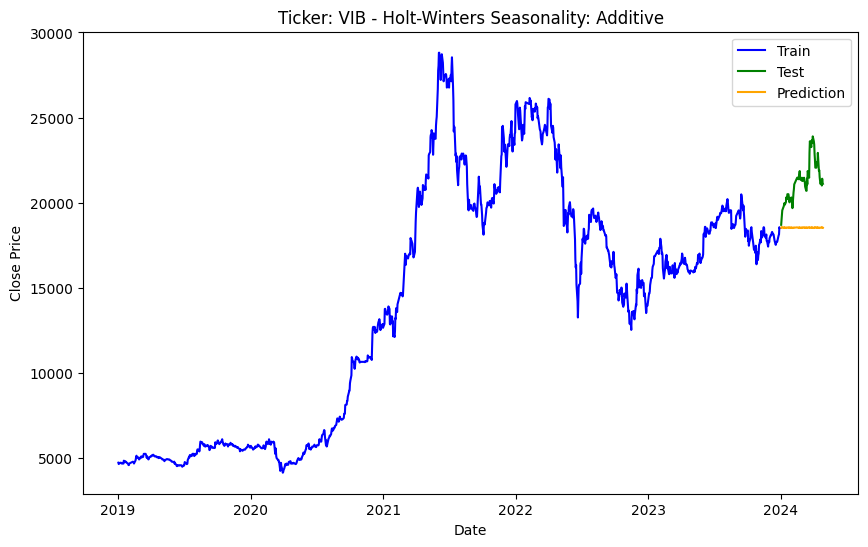

Processing ticker (Holt-Winters Additive): VPB
Ticker: VPB, MAE: 442.9263808795065, RMSE: 503.70067128555866


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


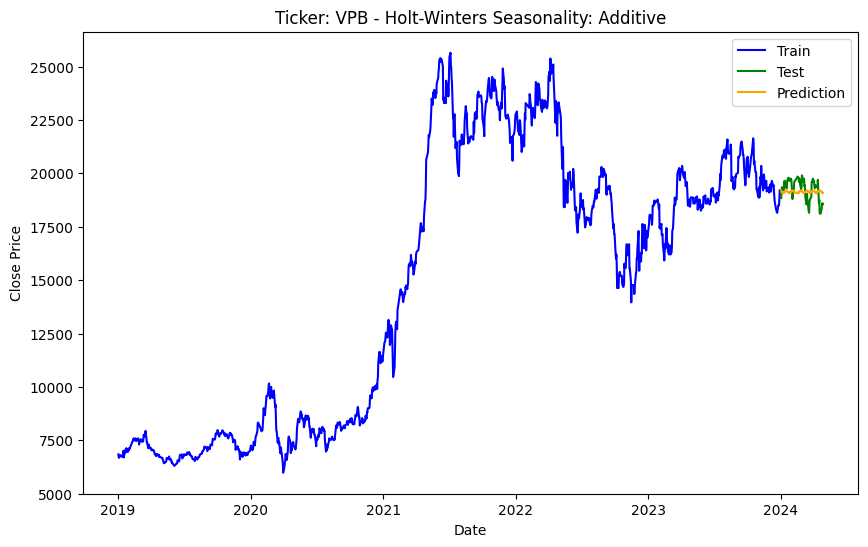

Processing ticker (Holt-Winters Additive): HPG
Ticker: HPG, MAE: 1251.5224956226186, RMSE: 1618.7480880680653


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


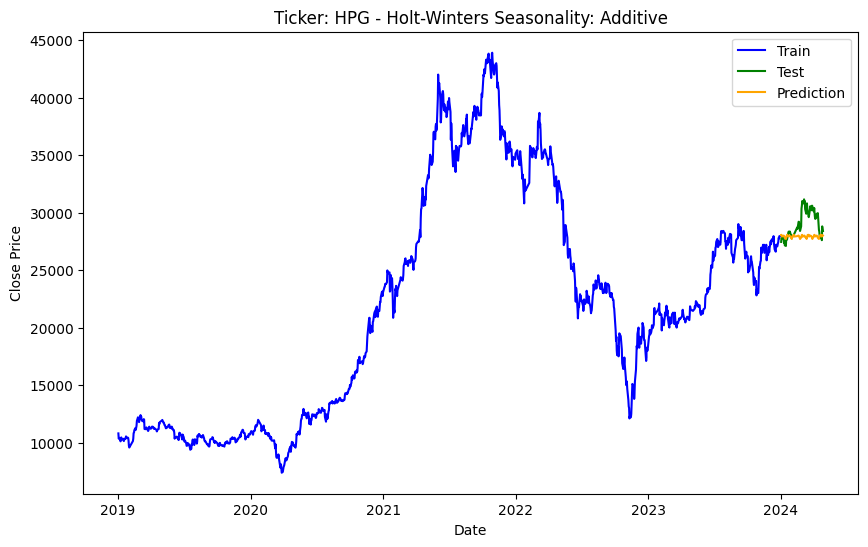

Processing ticker (Holt-Winters Additive): GVR
Ticker: GVR, MAE: 6473.786737833966, RMSE: 7861.97447083811


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


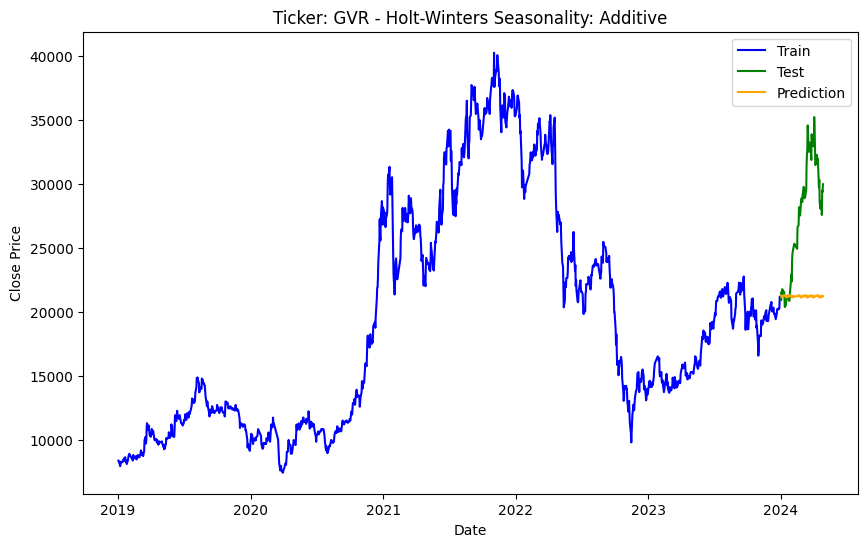

Processing ticker (Holt-Winters Additive): MSN
Ticker: MSN, MAE: 4099.916718723463, RMSE: 5819.8433976941515


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


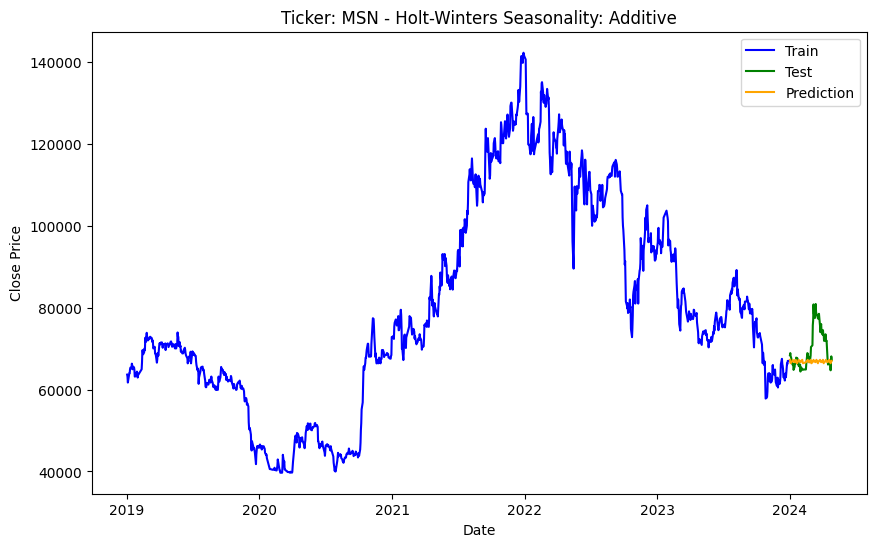

Processing ticker (Holt-Winters Additive): VNM
Ticker: VNM, MAE: 1617.175748671718, RMSE: 2135.875639845248


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


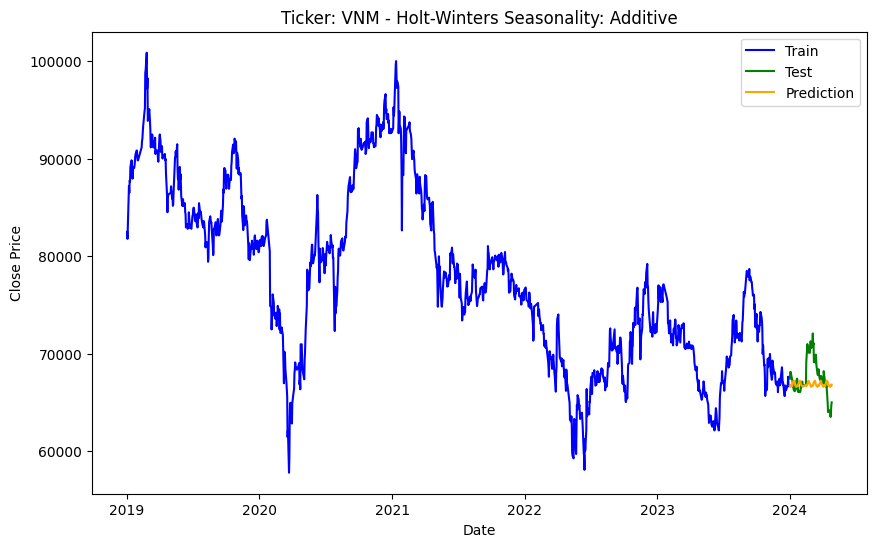

Processing ticker (Holt-Winters Additive): SAB
Ticker: SAB, MAE: 3732.8823993970313, RMSE: 4316.4942836210685


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


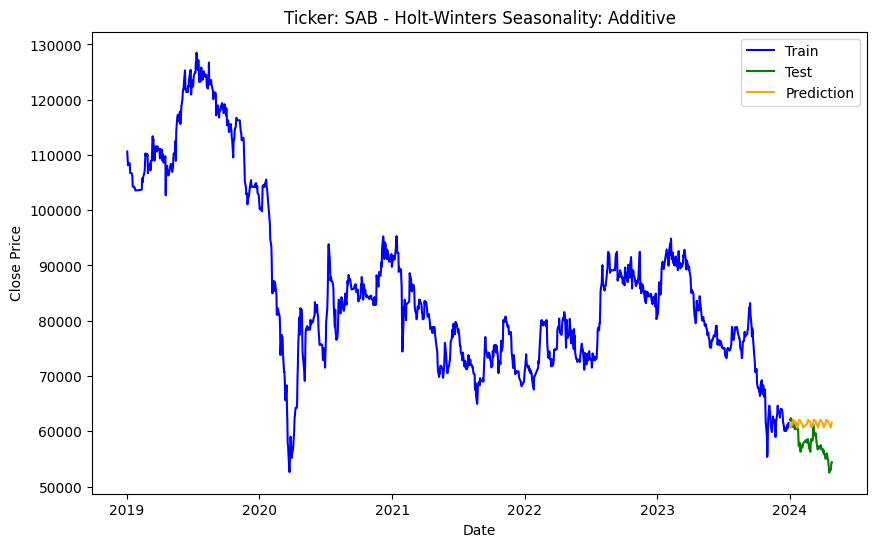

Processing ticker (Holt-Winters Additive): VJC
Ticker: VJC, MAE: 4170.496910627678, RMSE: 4499.707982164241


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


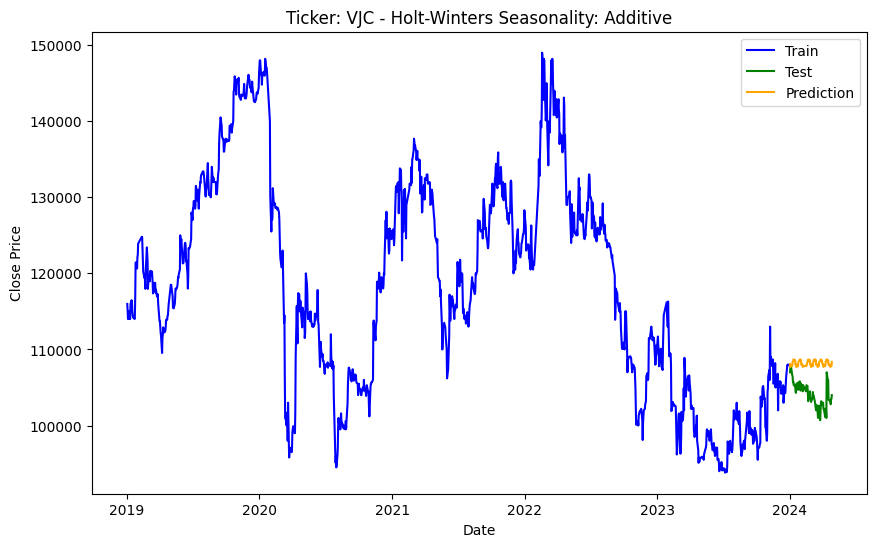

Processing ticker (Holt-Winters Additive): MWG
Ticker: MWG, MAE: 4664.510434549183, RMSE: 5499.395709148171


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


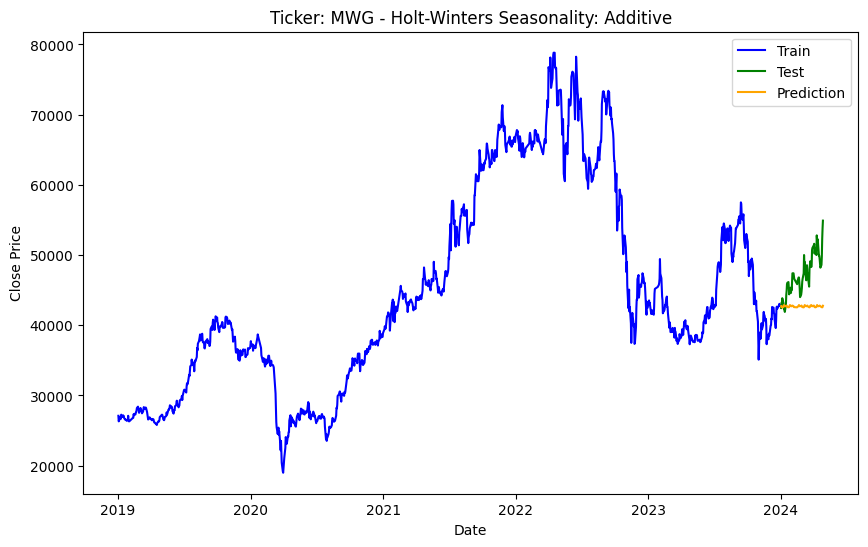

Processing ticker (Holt-Winters Additive): PLX
Ticker: PLX, MAE: 1505.5009659860634, RMSE: 1895.0437085648864


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


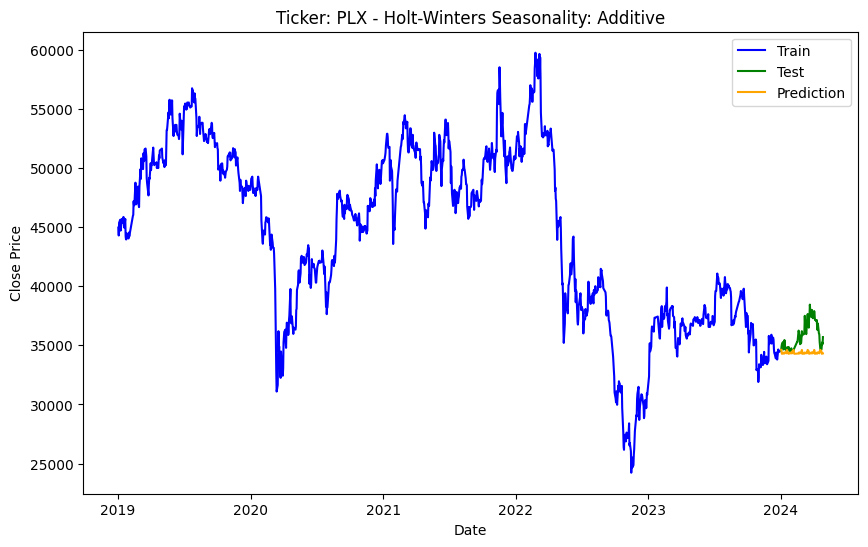

Processing ticker (Holt-Winters Additive): FPT
Ticker: FPT, MAE: 11252.169613174454, RMSE: 13739.796142450718


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


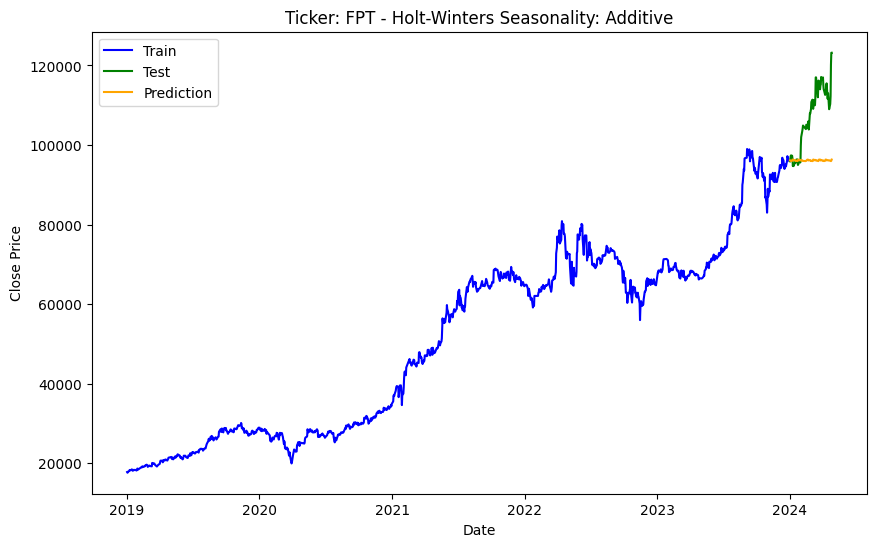

In [45]:

# Vòng lặp qua từng mã chứng khoán với Holt-Winters additive seasonality
for ticker in tickers:
    print(f"Processing ticker (Holt-Winters Additive): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Holt-Winters
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Huấn luyện mô hình và dự báo
    forecast_additive, mae_additive, rmse_additive = evaluator_holt_winters.fit_and_predict_holt_winters(train_df_ticker, test_df_ticker, ticker, seasonal='add')

    # Vẽ biểu đồ dự báo
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_additive, test_df_ticker, ticker, 'Additive')


## Holt-Winters multiplicative

Processing ticker (Holt-Winters Multiplicative): SSI
Ticker: SSI, MAE: 2987.26513311166, RMSE: 3439.1630287107546


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


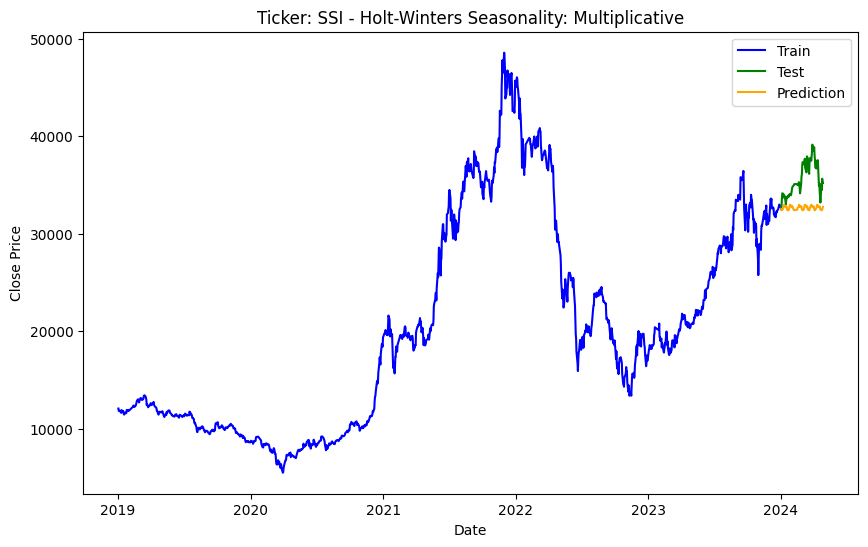

Processing ticker (Holt-Winters Multiplicative): BCM
Ticker: BCM, MAE: 3745.859117582862, RMSE: 4621.290733463309


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


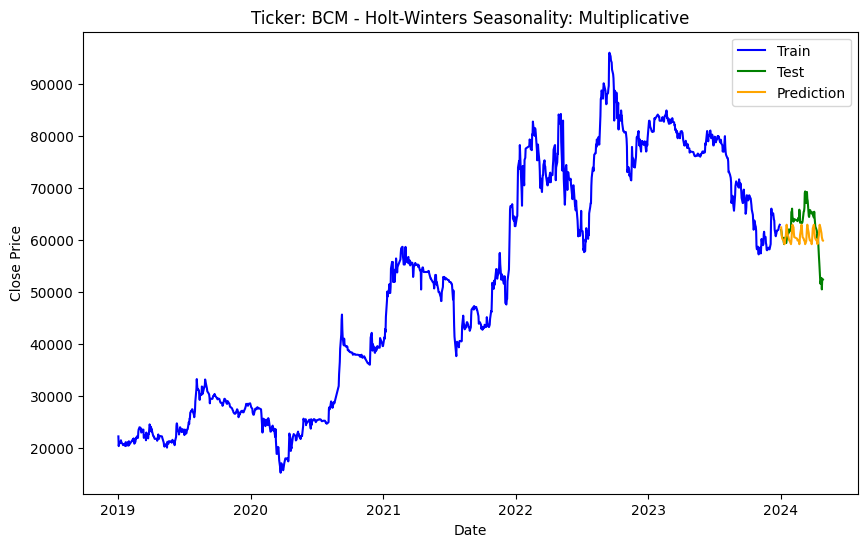

Processing ticker (Holt-Winters Multiplicative): VHM
Ticker: VHM, MAE: 903.5618676002026, RMSE: 1176.8143402236894


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


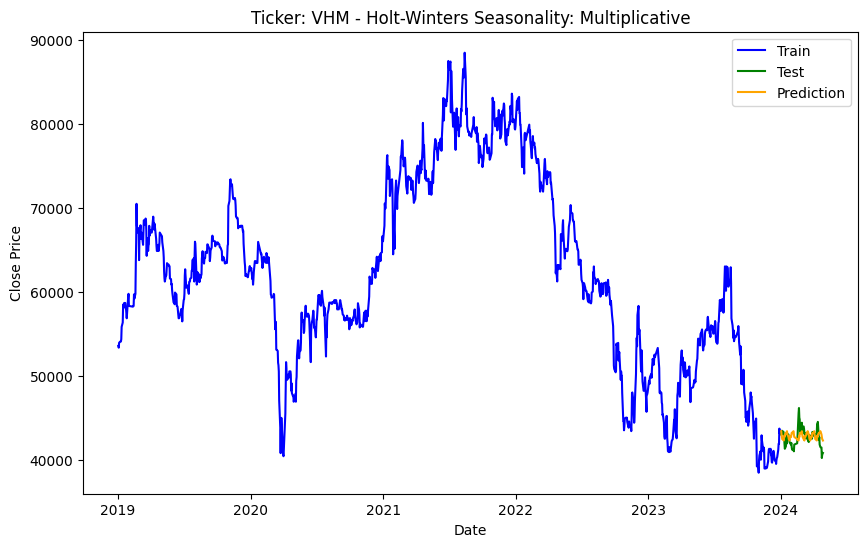

Processing ticker (Holt-Winters Multiplicative): VIC
Ticker: VIC, MAE: 1749.0410057687845, RMSE: 2011.1180545524437


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


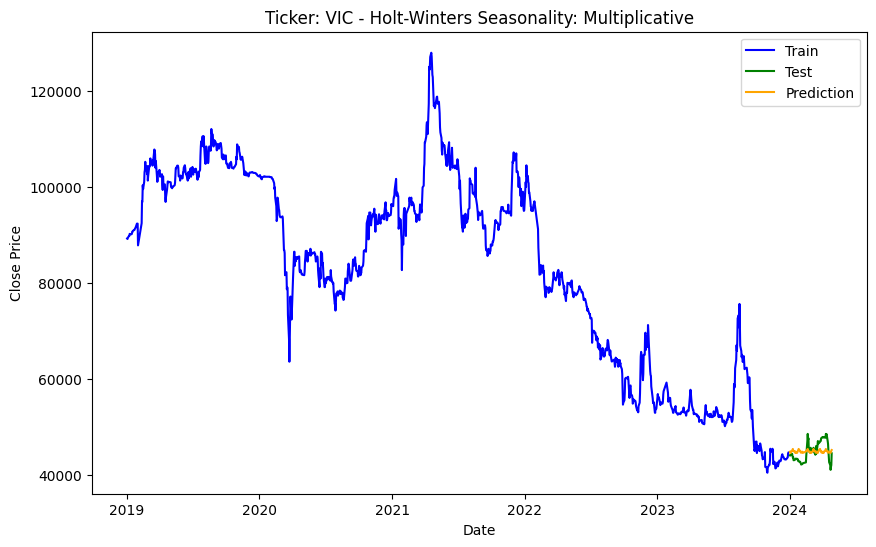

Processing ticker (Holt-Winters Multiplicative): VRE
Ticker: VRE, MAE: 1703.8859577467963, RMSE: 2130.7063716456764


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


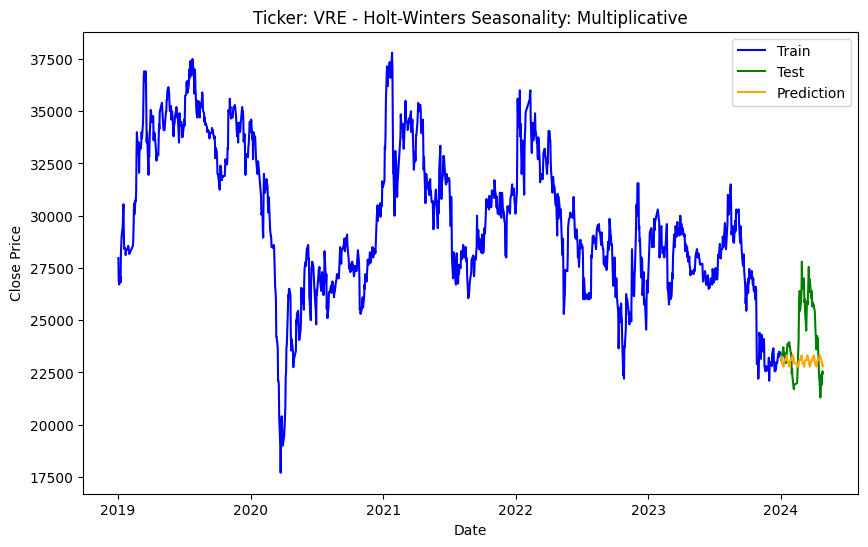

Processing ticker (Holt-Winters Multiplicative): BVH
Ticker: BVH, MAE: 1743.7868175822846, RMSE: 2110.3752191460544


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


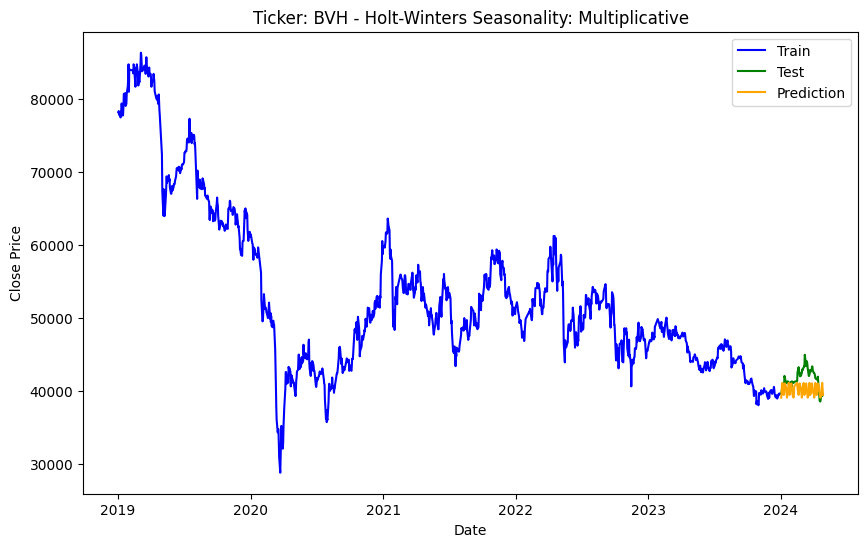

Processing ticker (Holt-Winters Multiplicative): POW
Ticker: POW, MAE: 289.3729952269816, RMSE: 354.4250912228122


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


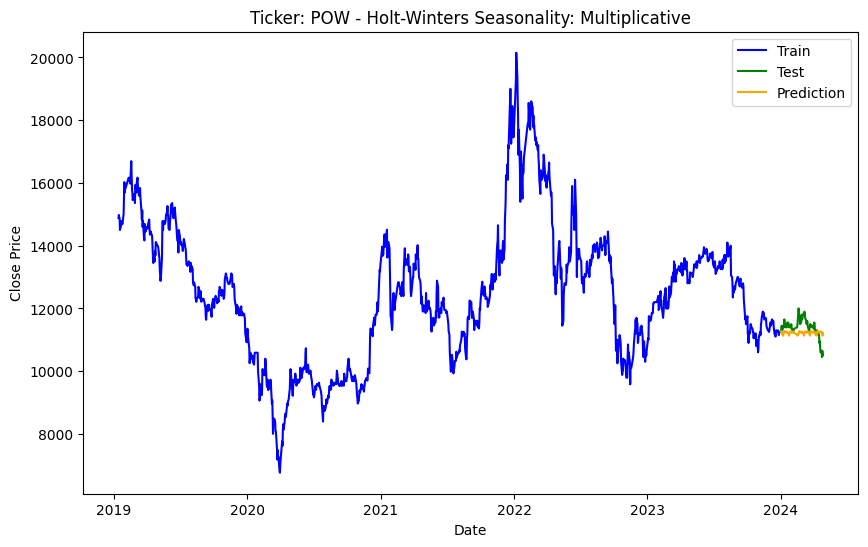

Processing ticker (Holt-Winters Multiplicative): GAS
Ticker: GAS, MAE: 2520.9321662747743, RMSE: 3236.9654549399497


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


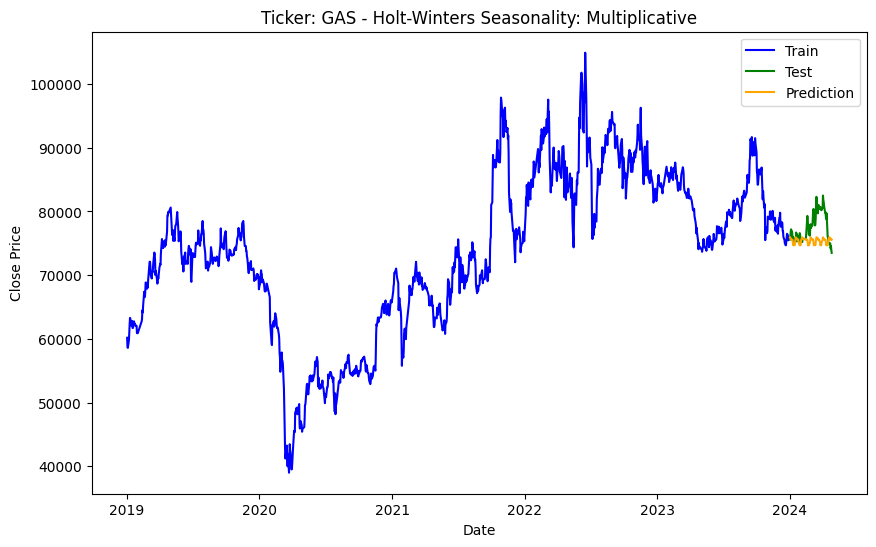

Processing ticker (Holt-Winters Multiplicative): ACB
Ticker: ACB, MAE: 2926.5853318021677, RMSE: 3092.971647736252


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


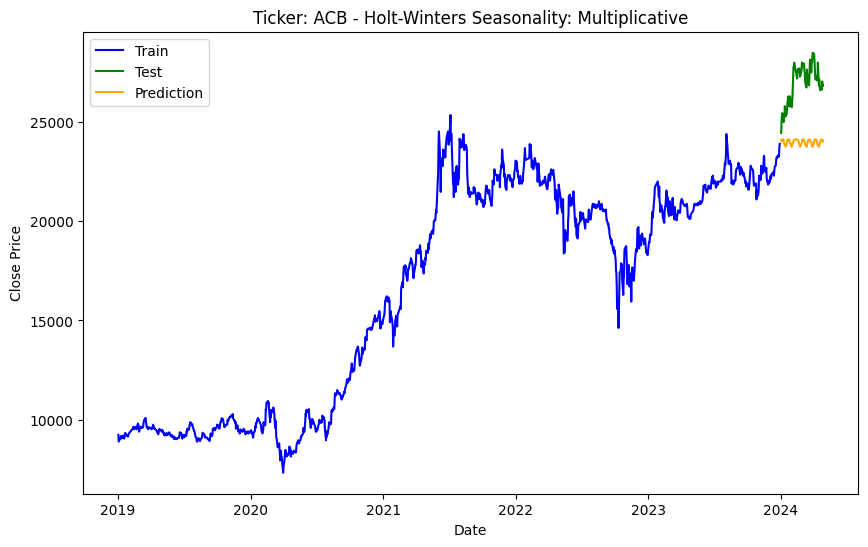

Processing ticker (Holt-Winters Multiplicative): BID
Ticker: BID, MAE: 6781.064438391274, RMSE: 7293.814184348939


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


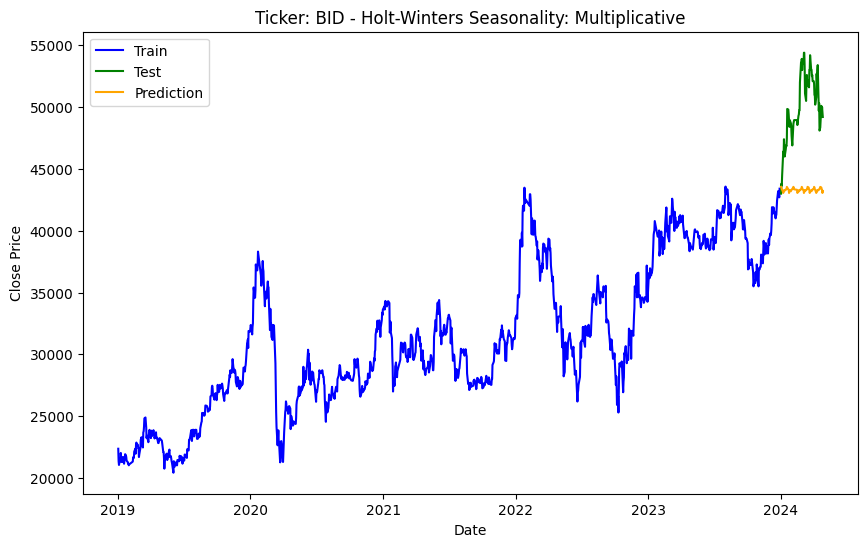

Processing ticker (Holt-Winters Multiplicative): CTG
Ticker: CTG, MAE: 6426.417779409244, RMSE: 6760.433098042856


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


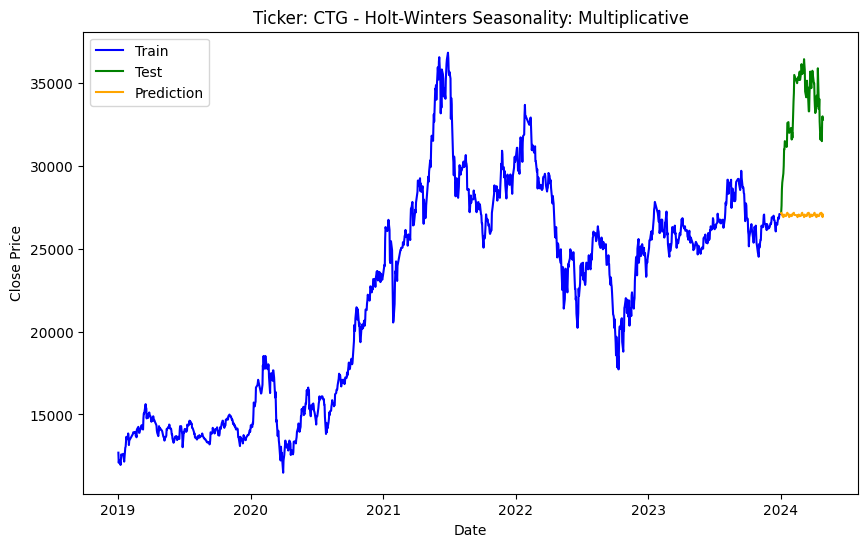

Processing ticker (Holt-Winters Multiplicative): HDB
Ticker: HDB, MAE: 2486.0558578582945, RMSE: 2753.6349586274378


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


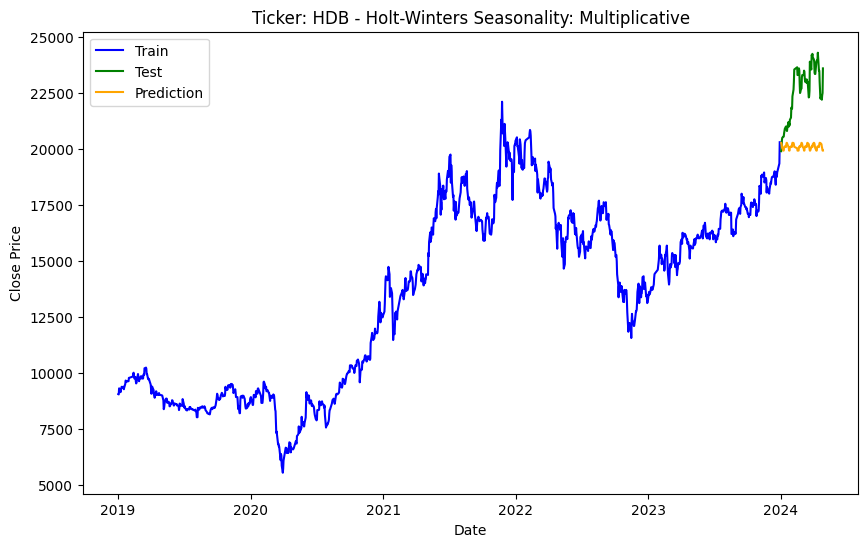

Processing ticker (Holt-Winters Multiplicative): MBB
Ticker: MBB, MAE: 4418.034076454576, RMSE: 4654.296006616936


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


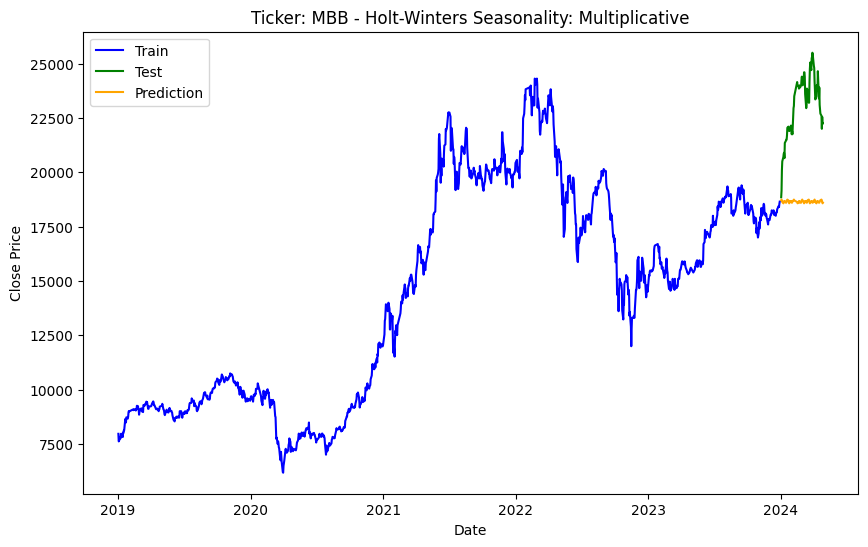

Processing ticker (Holt-Winters Multiplicative): SSB
Ticker: SSB, MAE: 1185.019209093533, RMSE: 1285.2890933903295


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


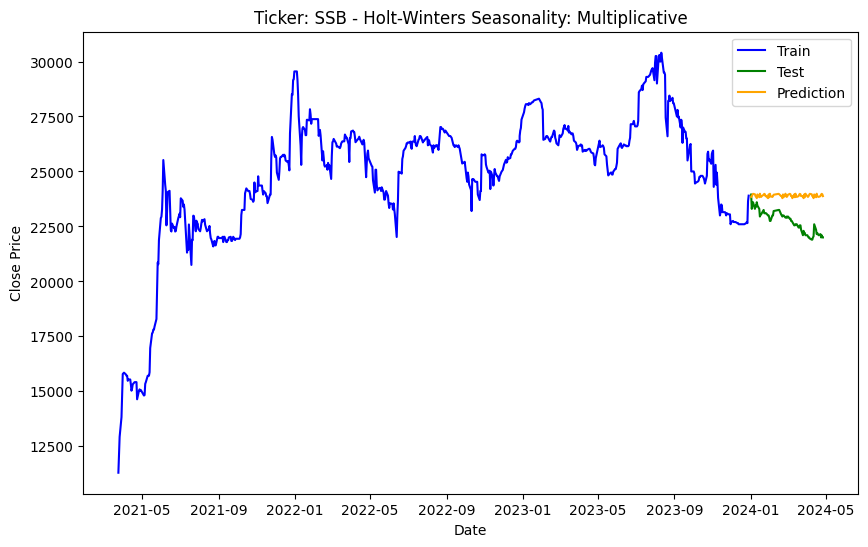

Processing ticker (Holt-Winters Multiplicative): SHB
Ticker: SHB, MAE: 883.7584429562802, RMSE: 967.2159204867072


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


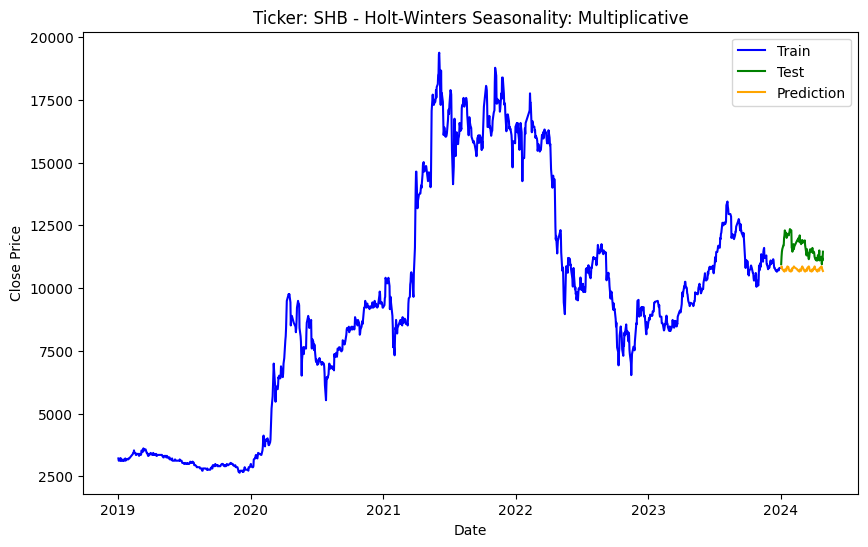

Processing ticker (Holt-Winters Multiplicative): STB
Ticker: STB, MAE: 2318.2283468422393, RMSE: 2547.289433500782


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


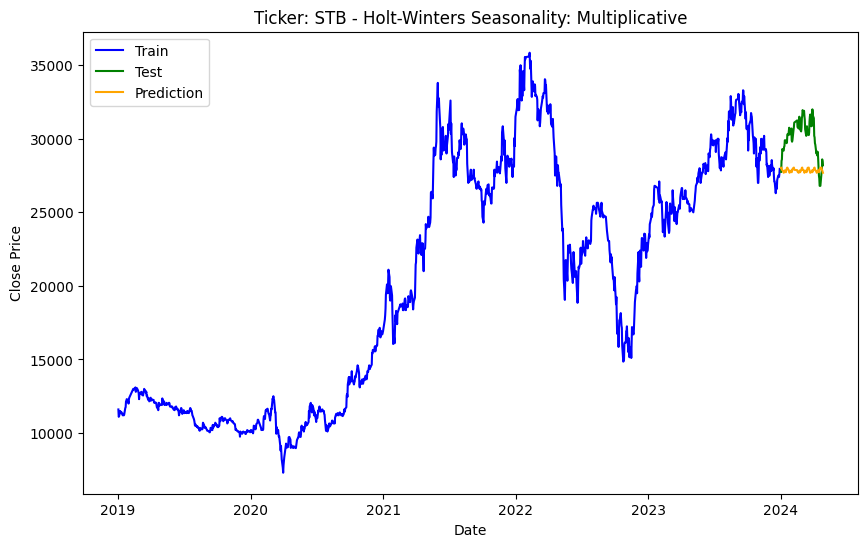

Processing ticker (Holt-Winters Multiplicative): TCB
Ticker: TCB, MAE: 8739.051909751213, RMSE: 9997.874385391102


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


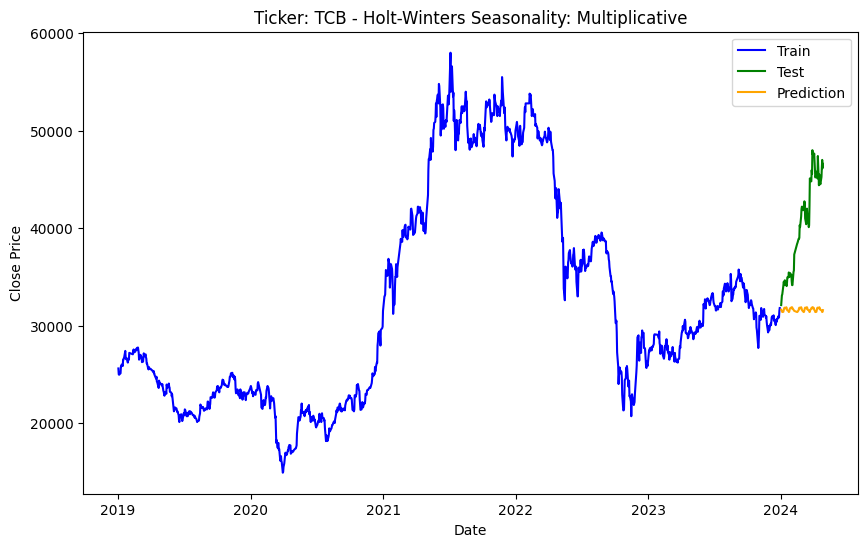

Processing ticker (Holt-Winters Multiplicative): TPB
Ticker: TPB, MAE: 1134.9829195842751, RMSE: 1278.6452495853775


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


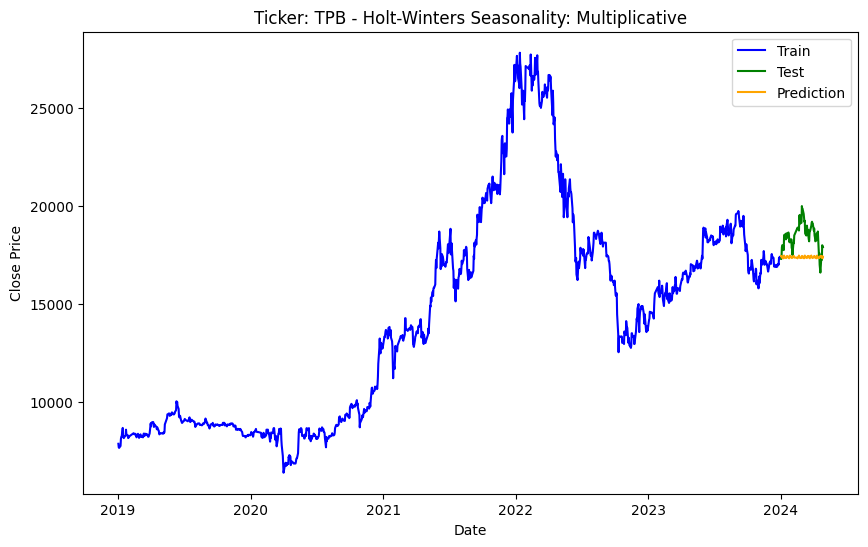

Processing ticker (Holt-Winters Multiplicative): VCB
Ticker: VCB, MAE: 11800.22438494662, RMSE: 12201.45032930552


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


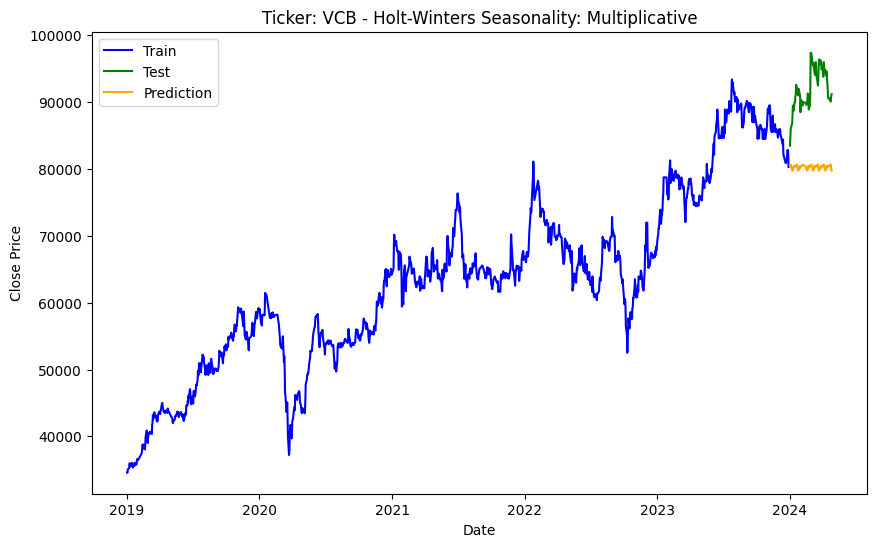

Processing ticker (Holt-Winters Multiplicative): VIB
Ticker: VIB, MAE: 2716.5466929102304, RMSE: 2968.4394791531795


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


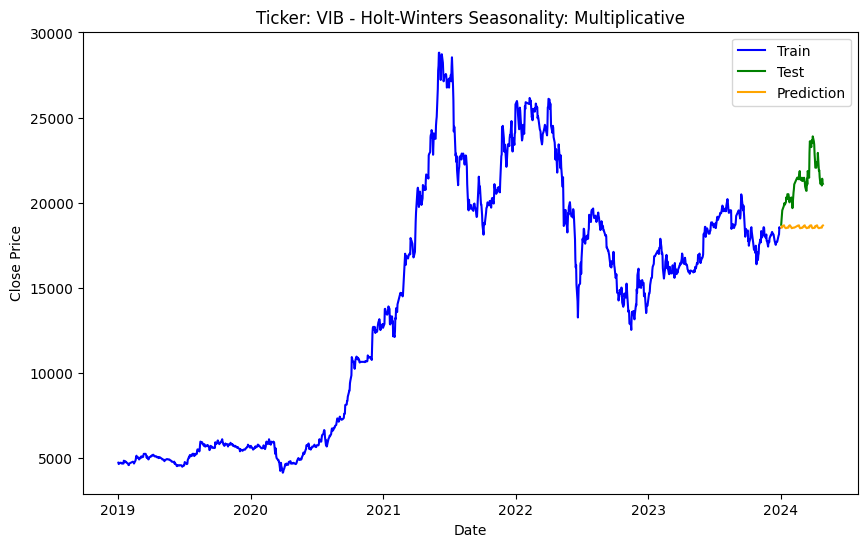

Processing ticker (Holt-Winters Multiplicative): VPB
Ticker: VPB, MAE: 506.4111682584762, RMSE: 575.3257993897573


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


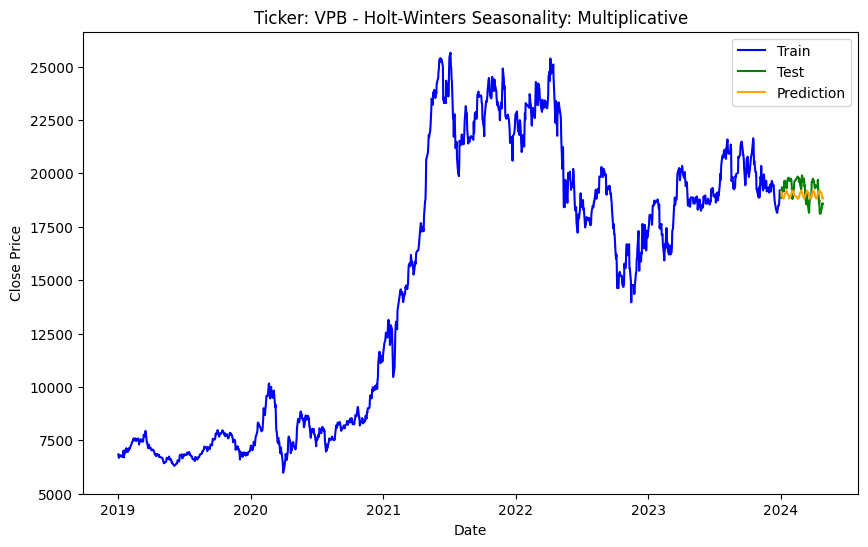

Processing ticker (Holt-Winters Multiplicative): HPG
Ticker: HPG, MAE: 1088.763882734077, RMSE: 1367.5044808849486


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


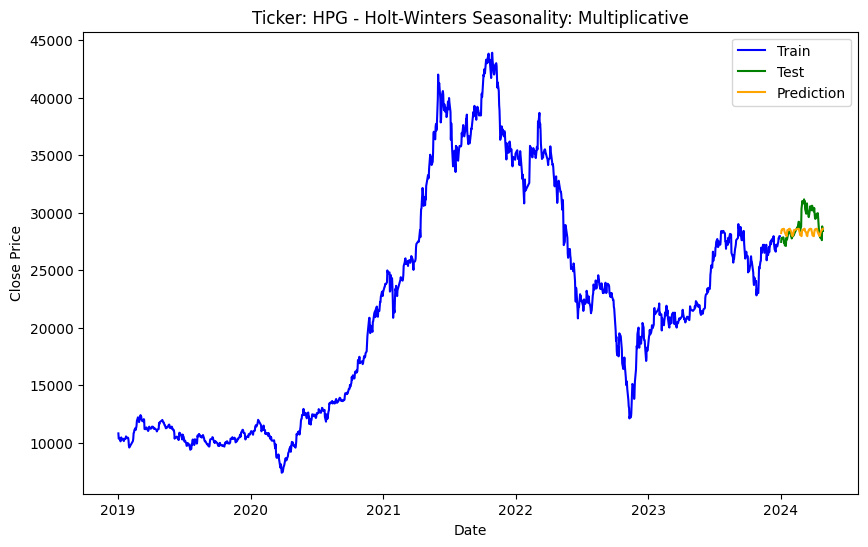

Processing ticker (Holt-Winters Multiplicative): GVR
Ticker: GVR, MAE: 6472.320840113765, RMSE: 7860.785769170706


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


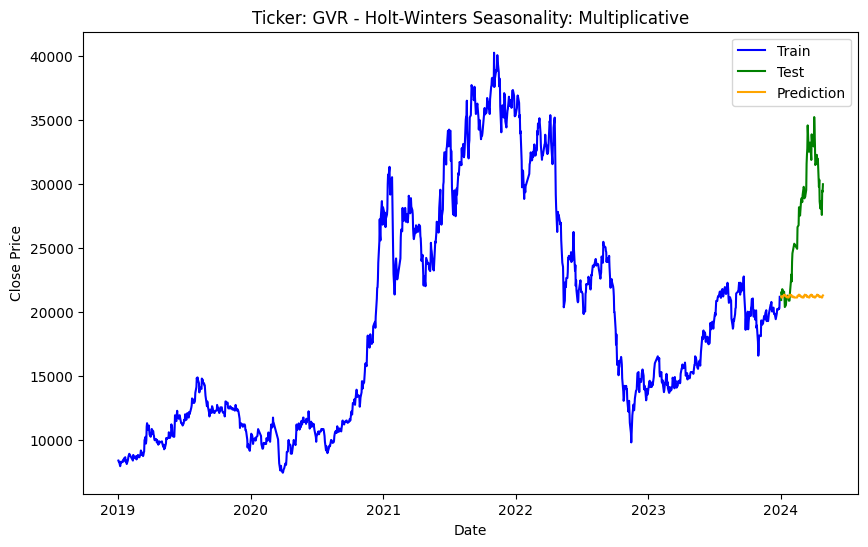

Processing ticker (Holt-Winters Multiplicative): MSN
Ticker: MSN, MAE: 4084.6894145275032, RMSE: 5802.936759782943


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


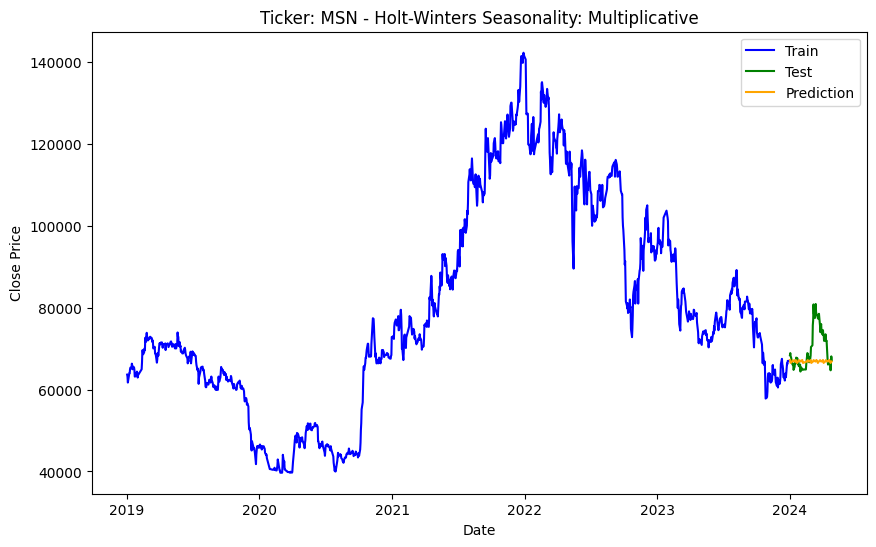

Processing ticker (Holt-Winters Multiplicative): VNM
Ticker: VNM, MAE: 1587.8309378194597, RMSE: 2077.752245590361


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


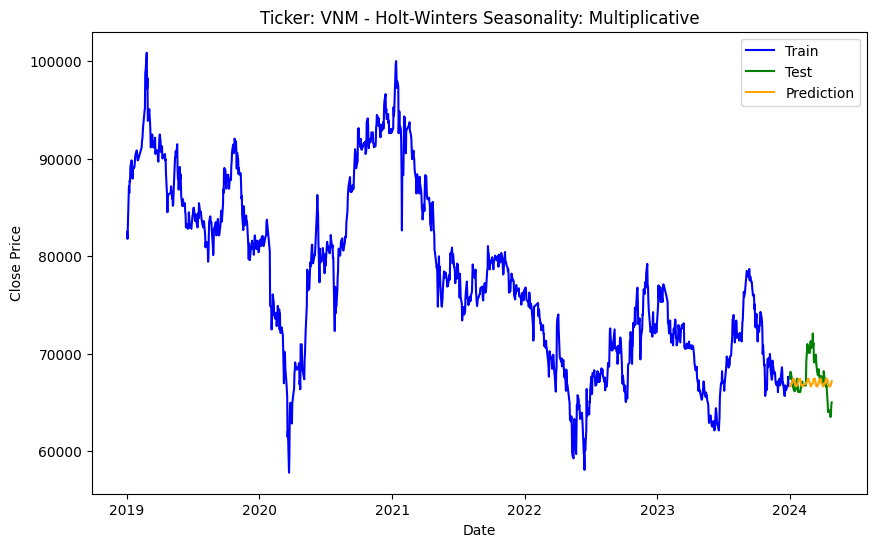

Processing ticker (Holt-Winters Multiplicative): SAB
Ticker: SAB, MAE: 3847.6788754123795, RMSE: 4444.187136069621


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


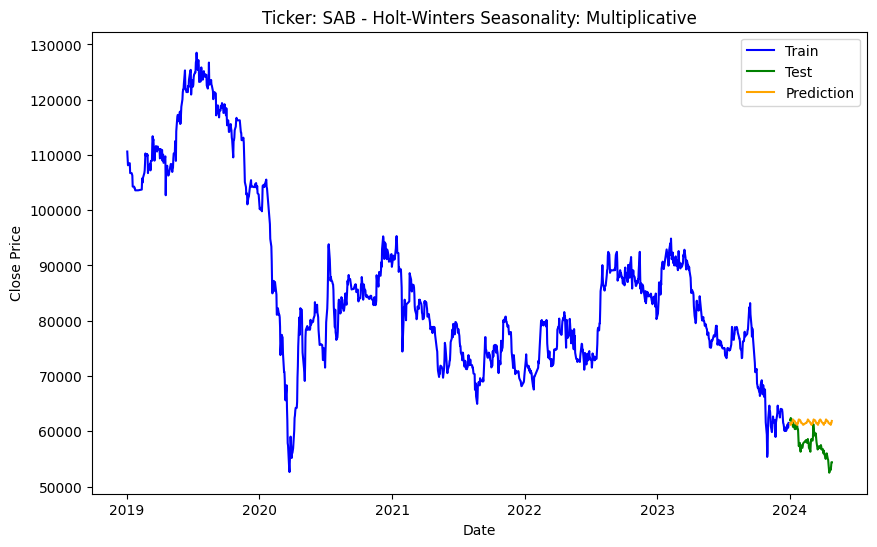

Processing ticker (Holt-Winters Multiplicative): VJC
Ticker: VJC, MAE: 4063.813858014518, RMSE: 4394.786721376929


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


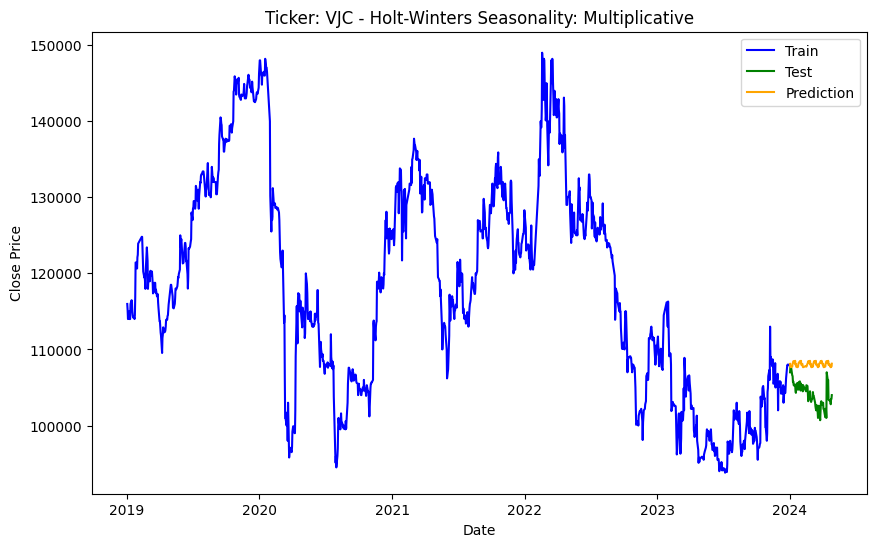

Processing ticker (Holt-Winters Multiplicative): MWG
Ticker: MWG, MAE: 4702.5070858855925, RMSE: 5530.839975127374


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


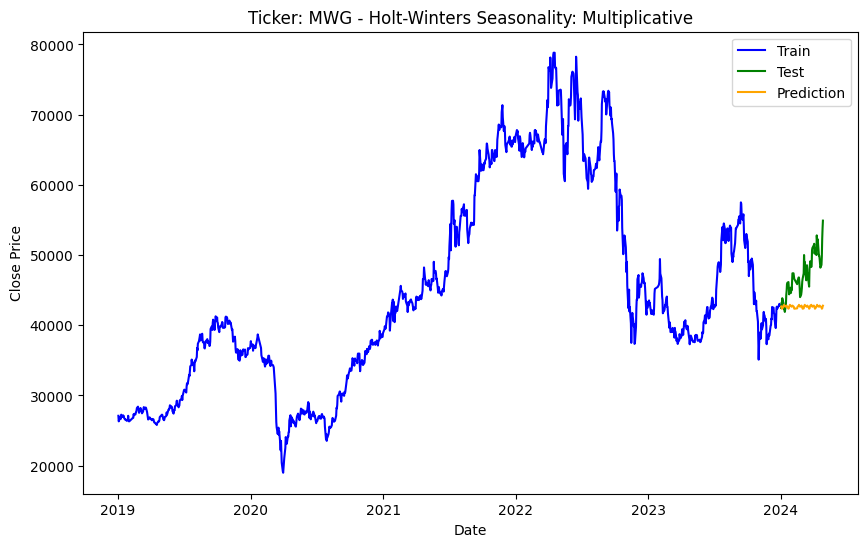

Processing ticker (Holt-Winters Multiplicative): PLX
Ticker: PLX, MAE: 1491.477052443958, RMSE: 1884.4479513725087


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


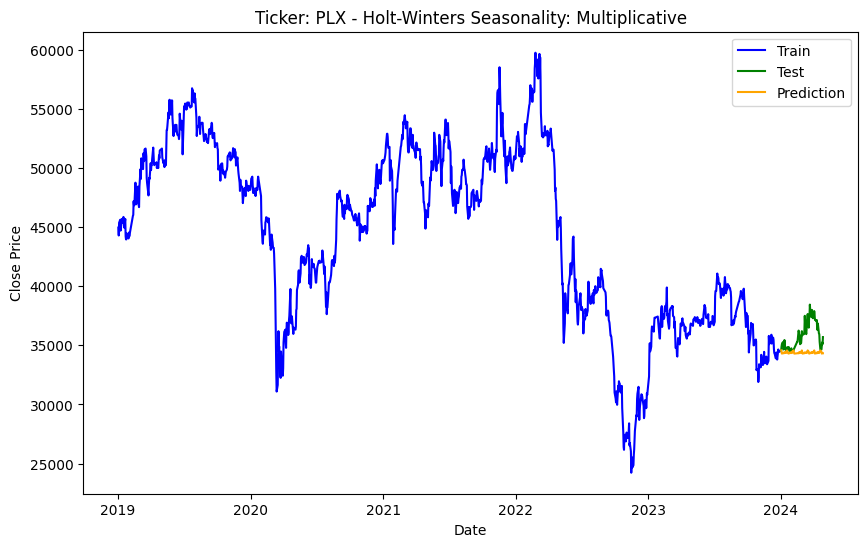

Processing ticker (Holt-Winters Multiplicative): FPT
Ticker: FPT, MAE: 11421.853794716368, RMSE: 13910.313949266601


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


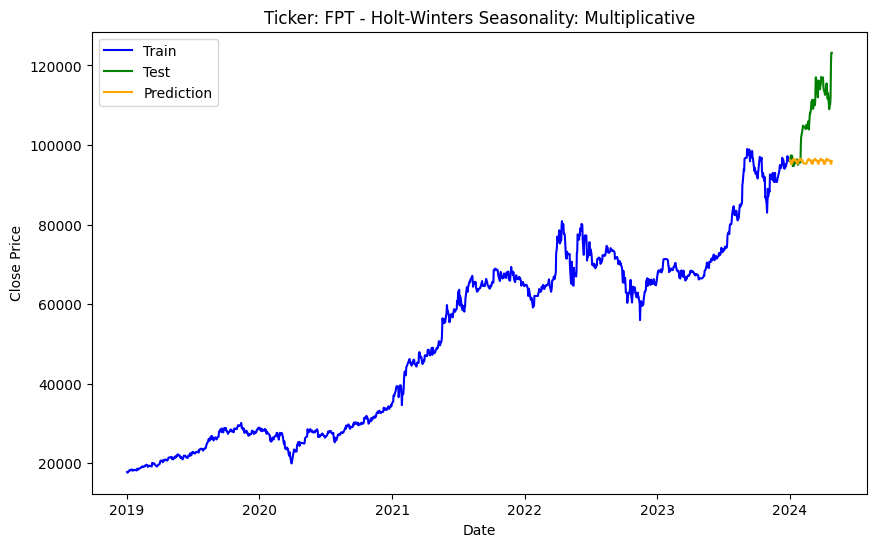

In [46]:
# Vòng lặp qua từng mã chứng khoán với Holt-Winters multiplicative seasonality
for ticker in tickers:
    print(f"Processing ticker (Holt-Winters Multiplicative): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Holt-Winters
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Huấn luyện mô hình và dự báo
    forecast_multiplicative, mae_multiplicative, rmse_multiplicative = evaluator_holt_winters.fit_and_predict_holt_winters(train_df_ticker, test_df_ticker, ticker, seasonal='mul')

    # Vẽ biểu đồ dự báo
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker, 'Multiplicative')


In [47]:
# Lấy và hiển thị kết quả
results_df_holt_winters_additive = evaluator_holt_winters.get_results()
results_df_holt_winters_multiplicative = evaluator_holt_winters.get_results()

# Tạo bảng kết quả
results_df = pd.merge(results_df_holt_winters_additive, results_df_holt_winters_multiplicative, on='ticker', suffixes=('_additive', '_multiplicative'))
print(results_df)

    ticker  mae_additive  rmse_additive seasonality_mode_additive  \
0      SSI   2874.348028    3336.463778                       add   
1      SSI   2874.348028    3336.463778                       add   
2      SSI   2987.265133    3439.163029                       mul   
3      SSI   2987.265133    3439.163029                       mul   
4      BCM   3033.051110    4123.949399                       add   
..     ...           ...            ...                       ...   
115    PLX   1491.477052    1884.447951                       mul   
116    FPT  11252.169613   13739.796142                       add   
117    FPT  11252.169613   13739.796142                       add   
118    FPT  11421.853795   13910.313949                       mul   
119    FPT  11421.853795   13910.313949                       mul   

     mae_multiplicative  rmse_multiplicative seasonality_mode_multiplicative  
0           2874.348028          3336.463778                             add  
1           2

DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/_q_100uz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04_0b7s9/sd6w_yvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63388', 'data', 'file=/tmp/tmp04_0b7s9/_q_100uz.json', 'init=/tmp/tmp04_0b7s9/sd6w_yvj.json', 'output', 'file=/tmp/tmp04_0b7s9/prophet_model5gogg1q6/prophet_model-20240801115709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

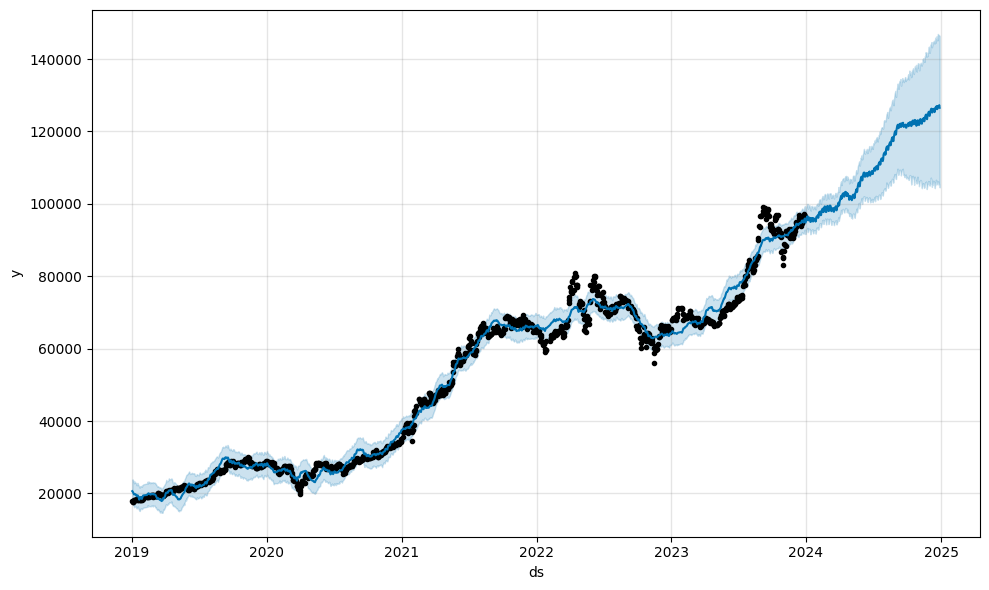

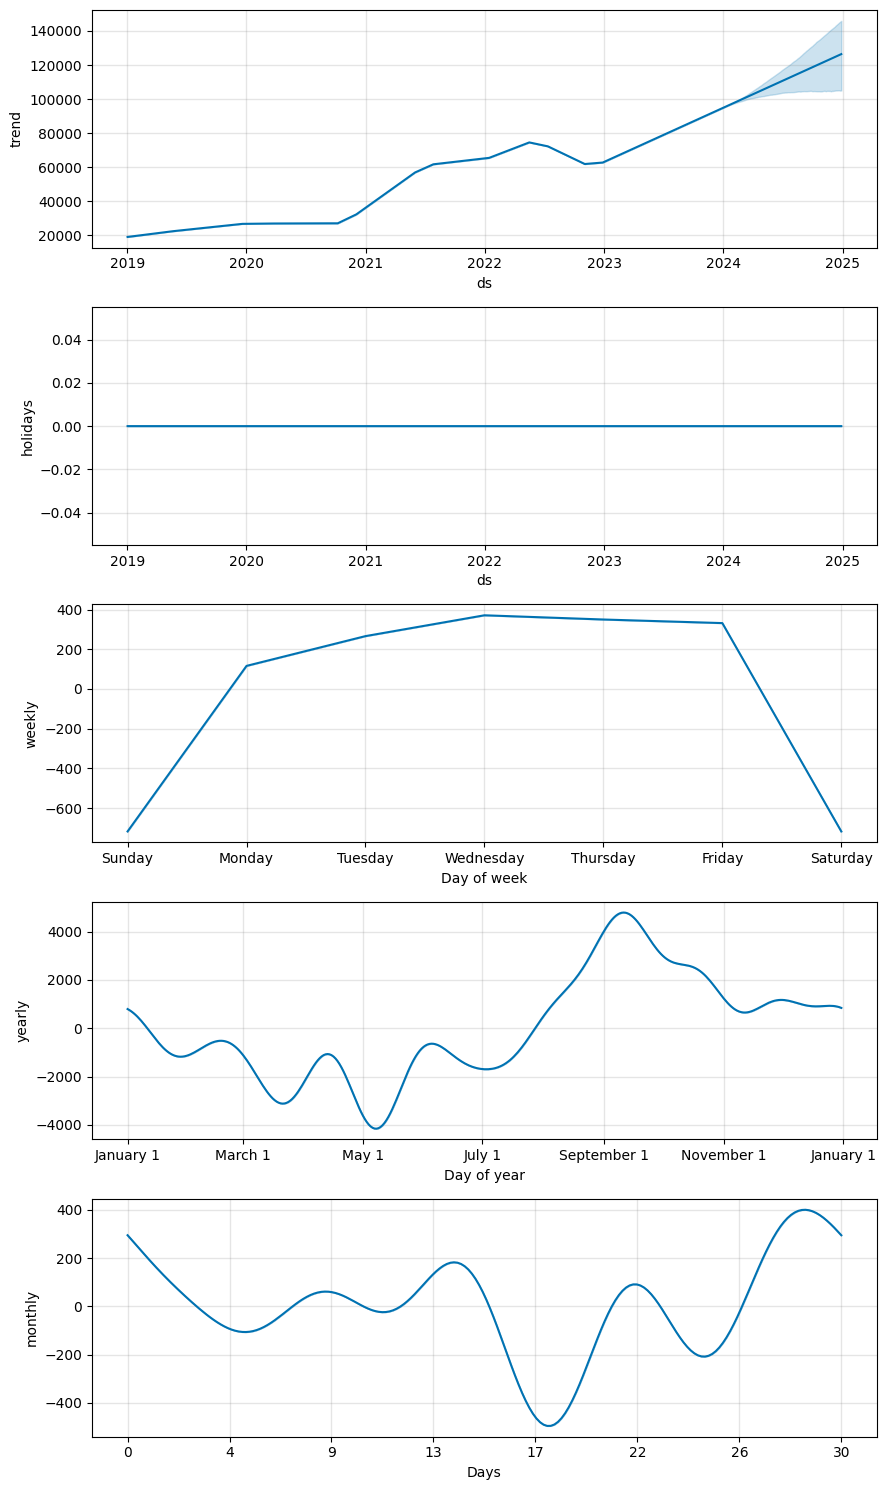

In [ ]:
# Tạo và huấn luyện mô hình
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='VN')
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train_df_ticker)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)